In [2]:
%reload_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from ImportanceImputer import ImportanceImputer
from sklearn.impute import KNNImputer

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

# Load data

In [3]:
# Load the dataset
auto = pd.read_csv('adverts.csv')

# Price

In [4]:
# 9999999 prices are erroneous and should be removed
auto.loc[auto["price"].apply(lambda x: str(x).count('9') > 5), "price"] = np.nan
len(auto.loc[auto["price"].isna()])

9

Outliers for 208:
           price  outlier
260185  67249.0     True


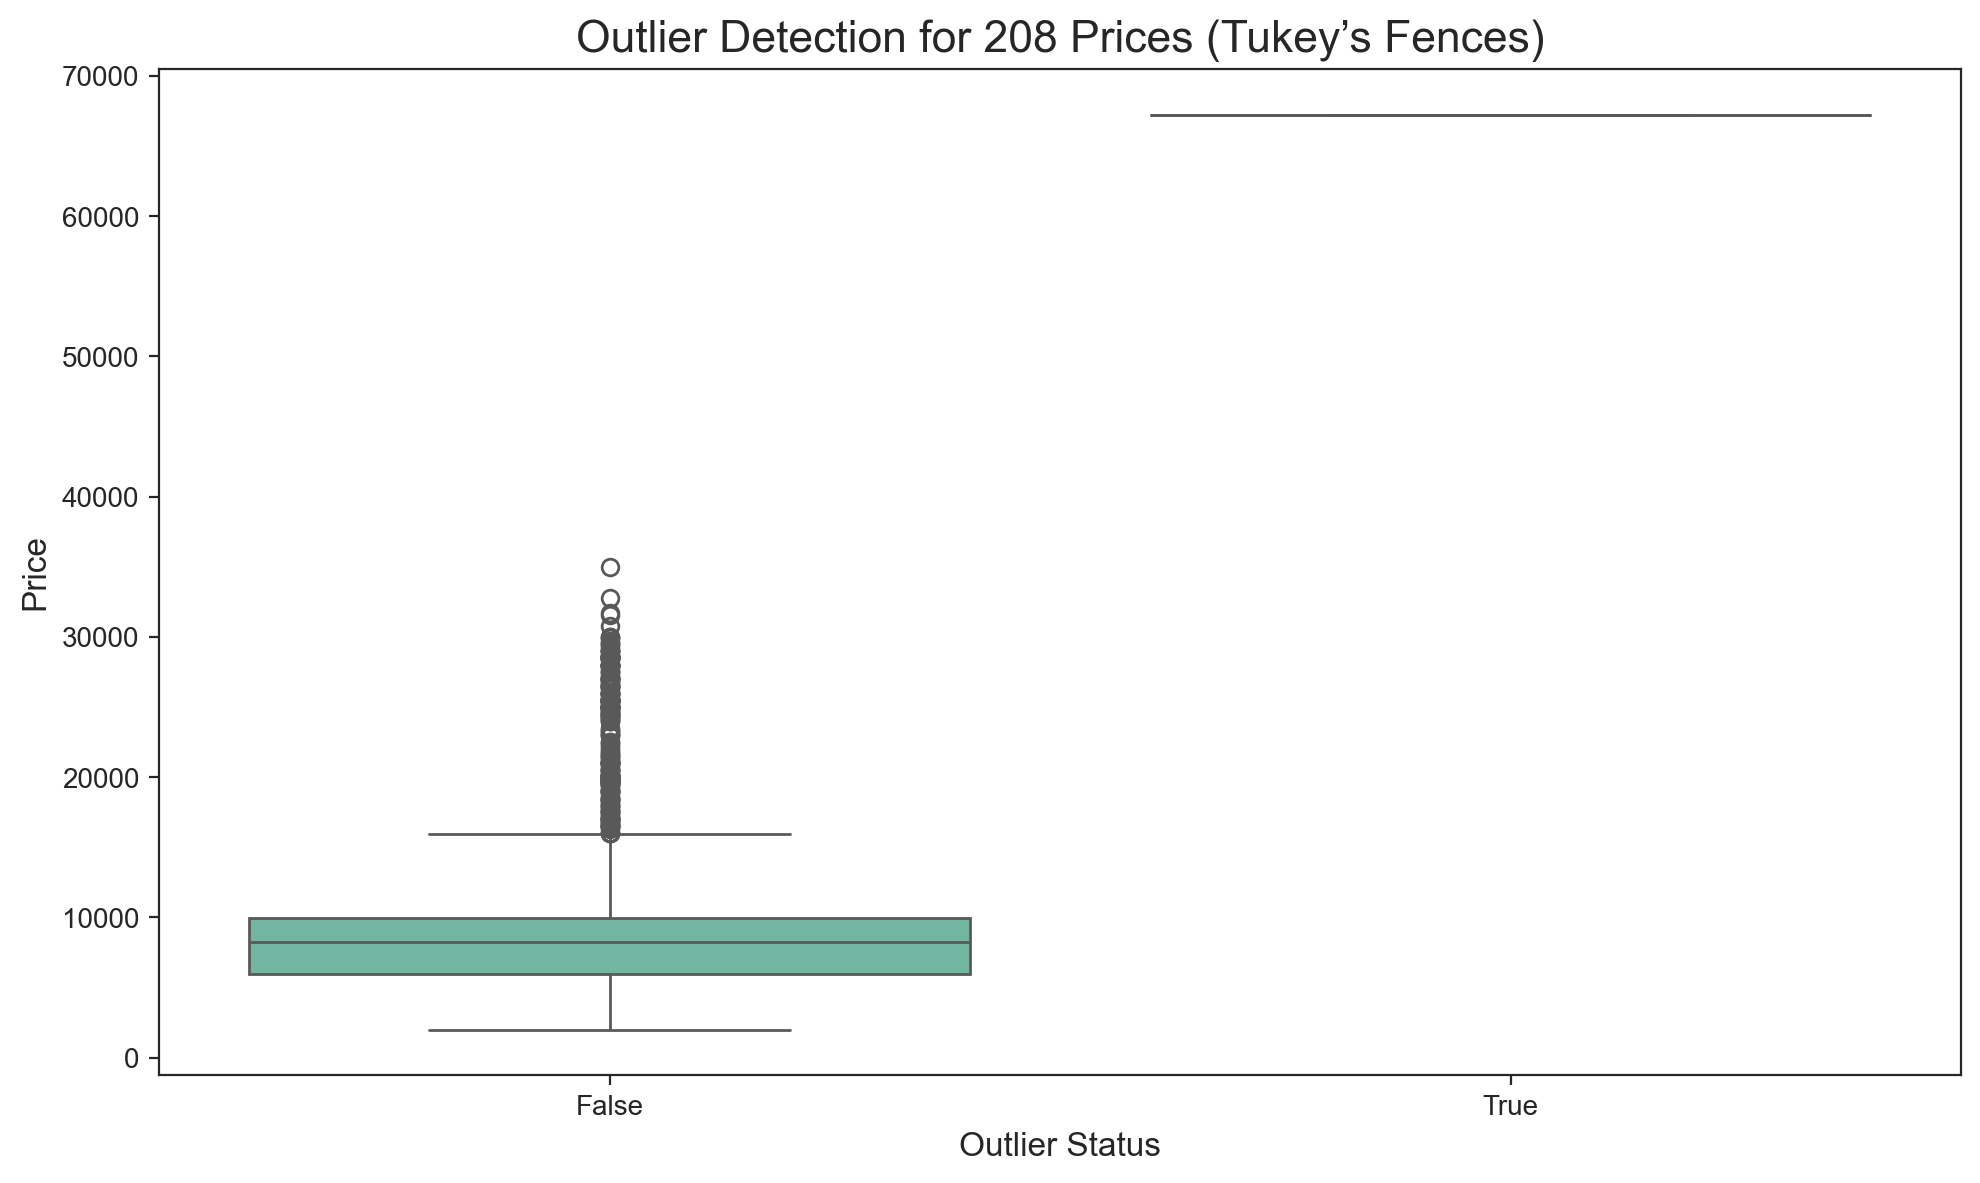

Outliers for 308:
           price  outlier
31566  124830.0     True


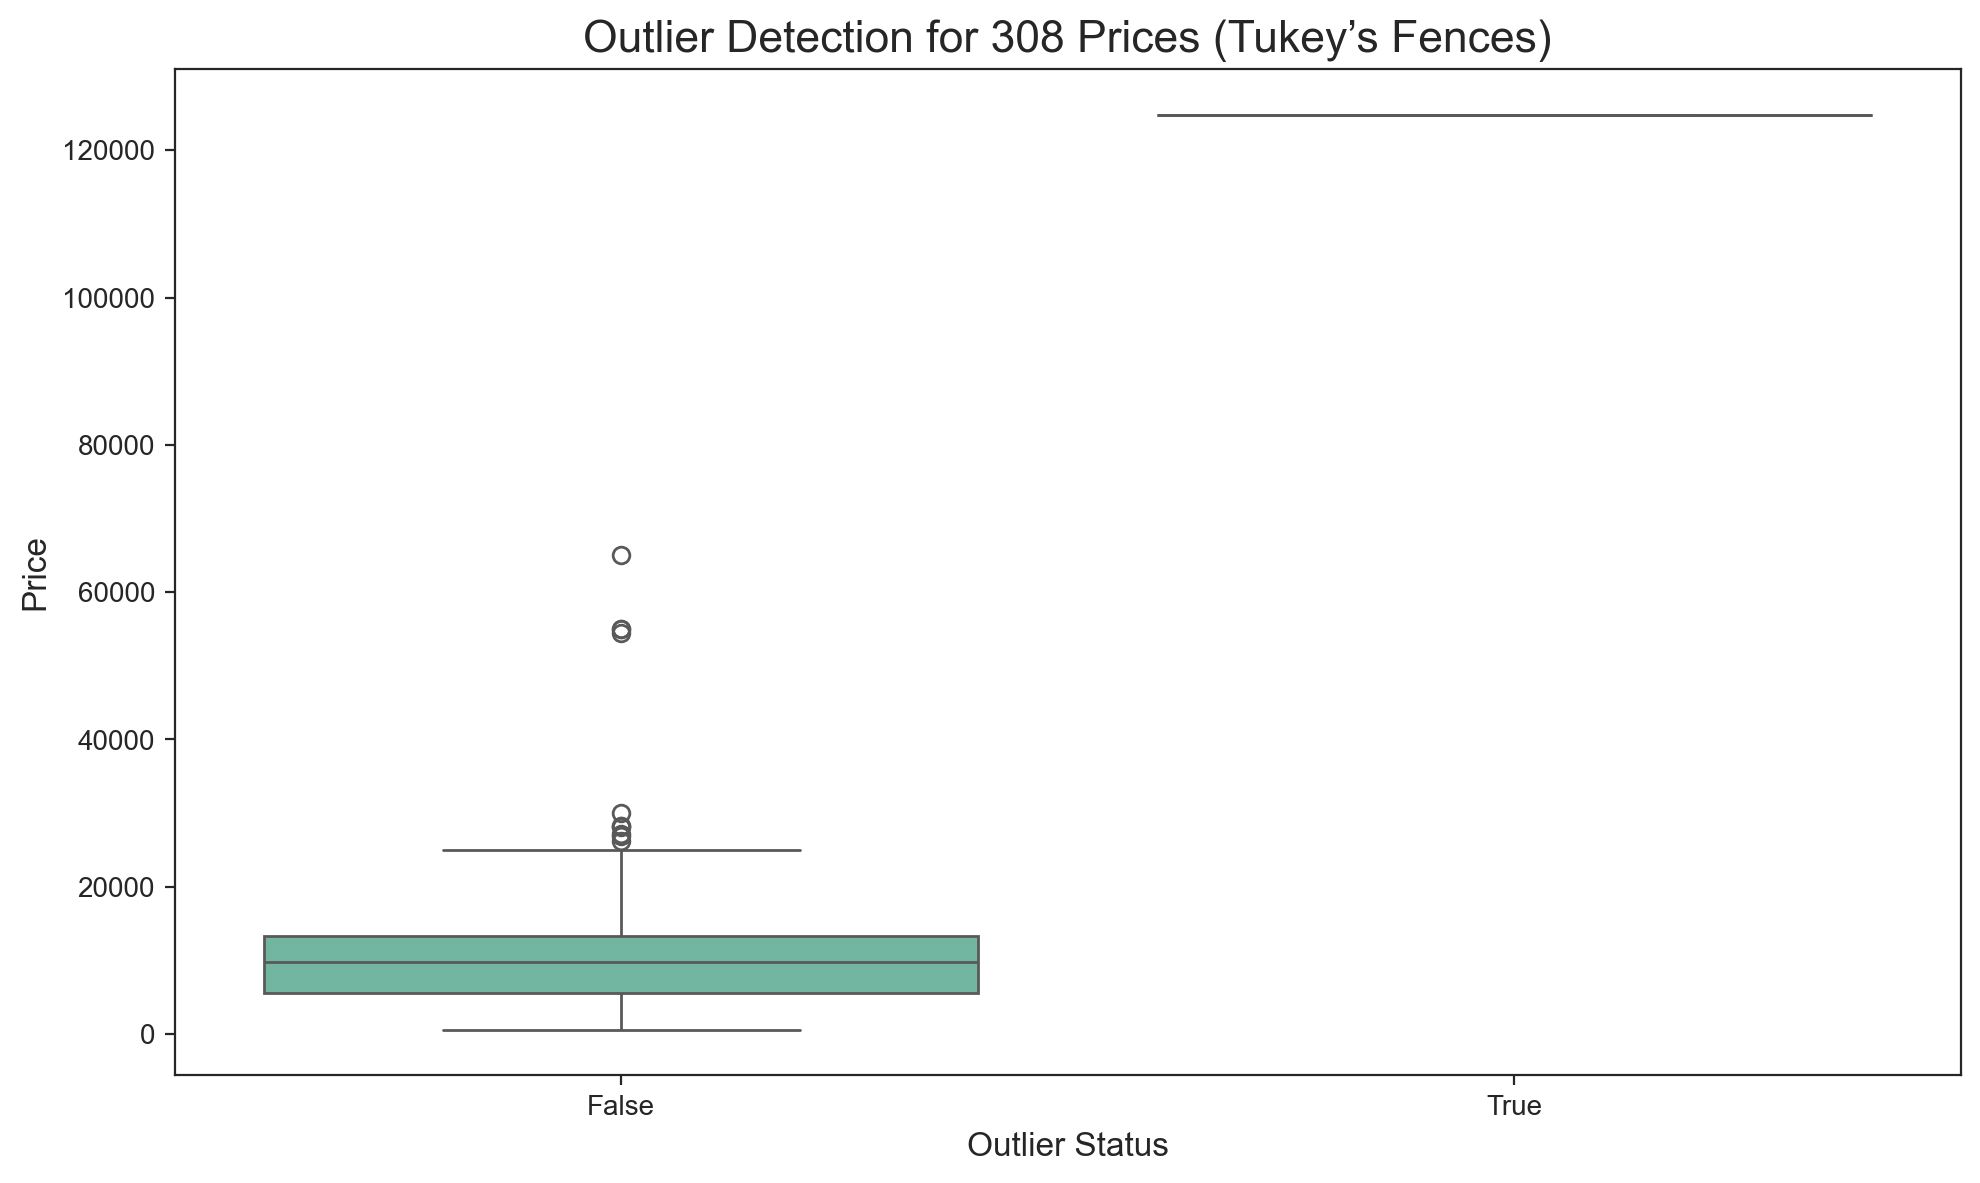

Outliers for Yaris:
            price  outlier
150807  232504.0     True


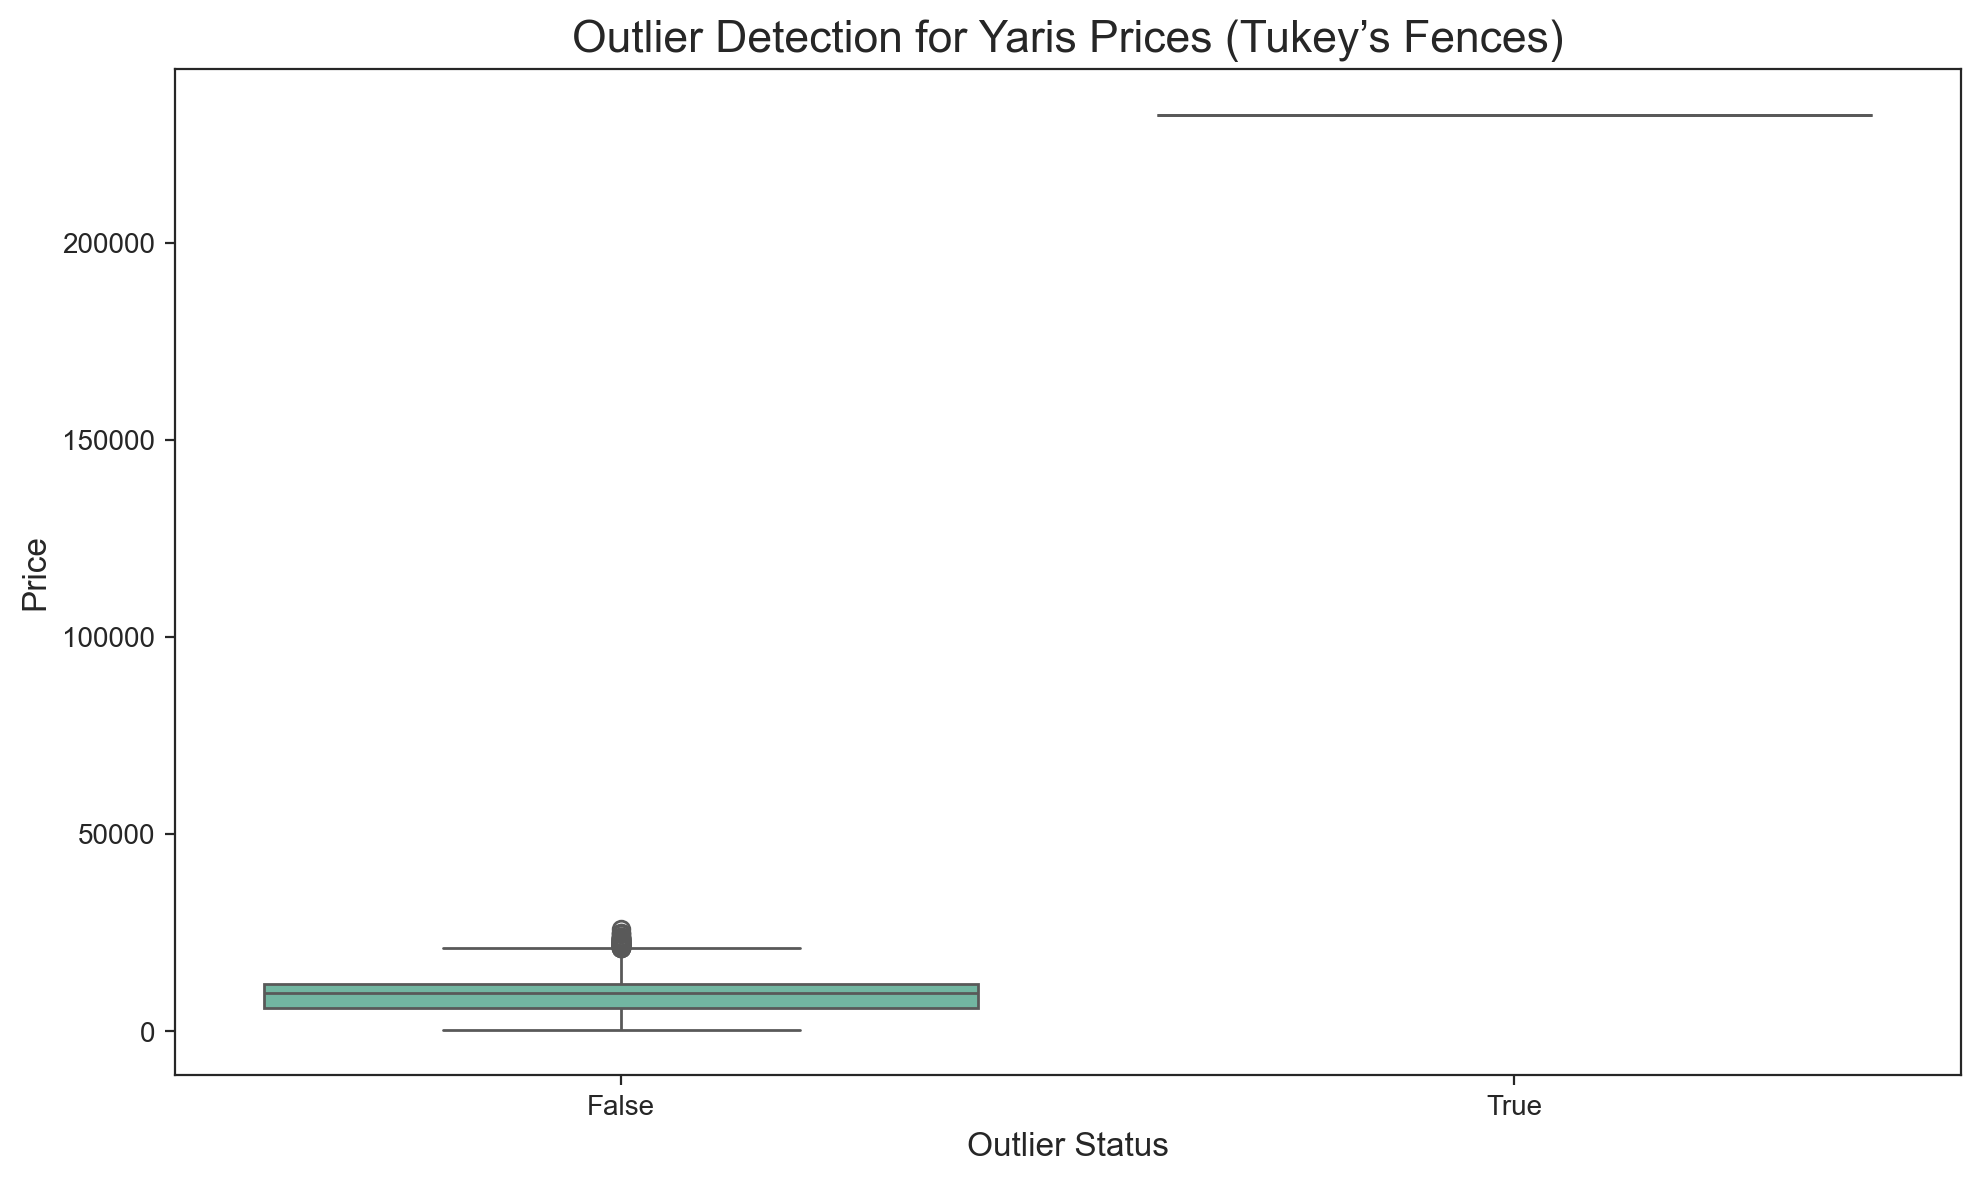

Outliers for A3:
            price  outlier
163919  293635.0     True


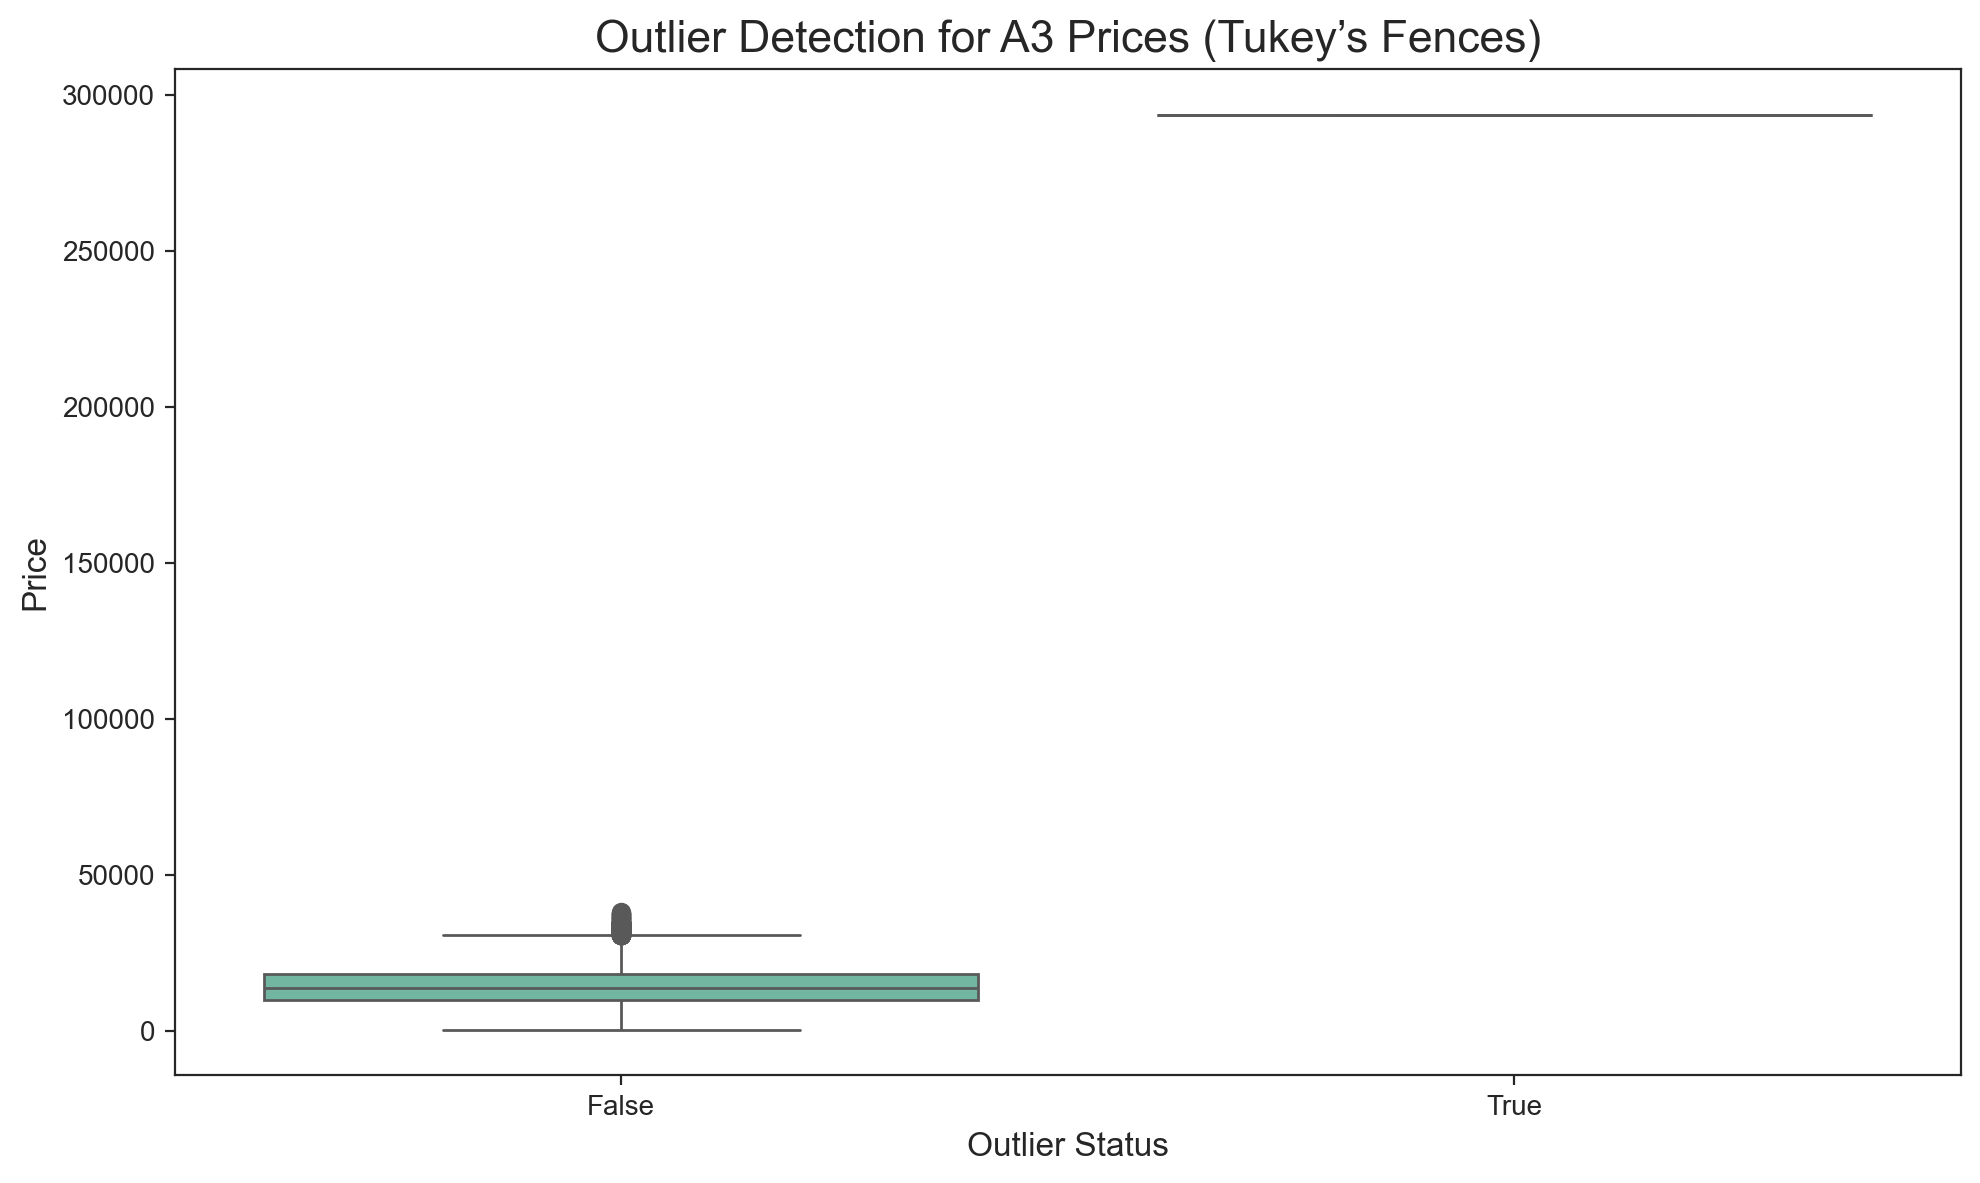

Outliers for 3 Series:
            price  outlier
297244  158500.0     True


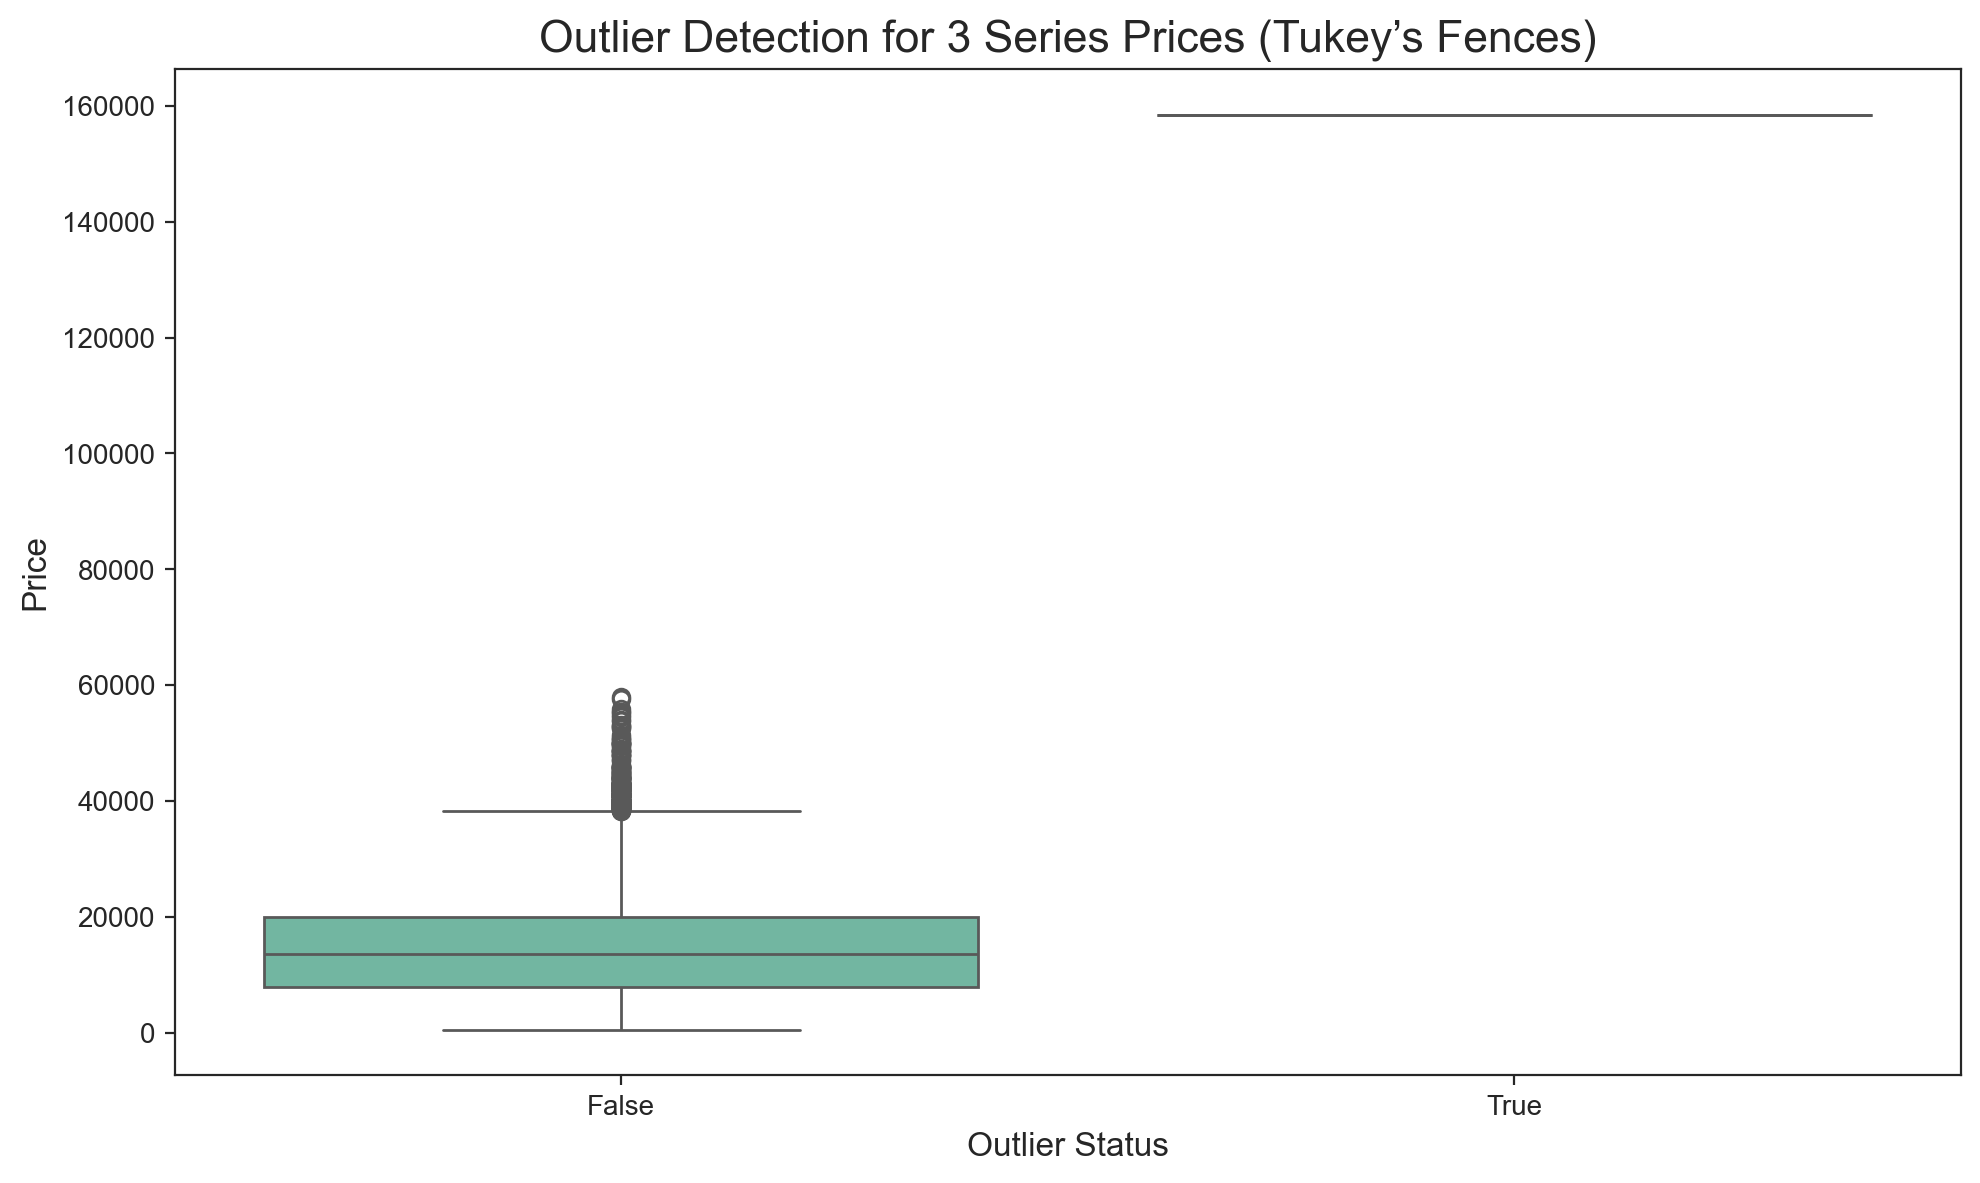

Outliers for Vantage:
           price  outlier
29262  750000.0     True


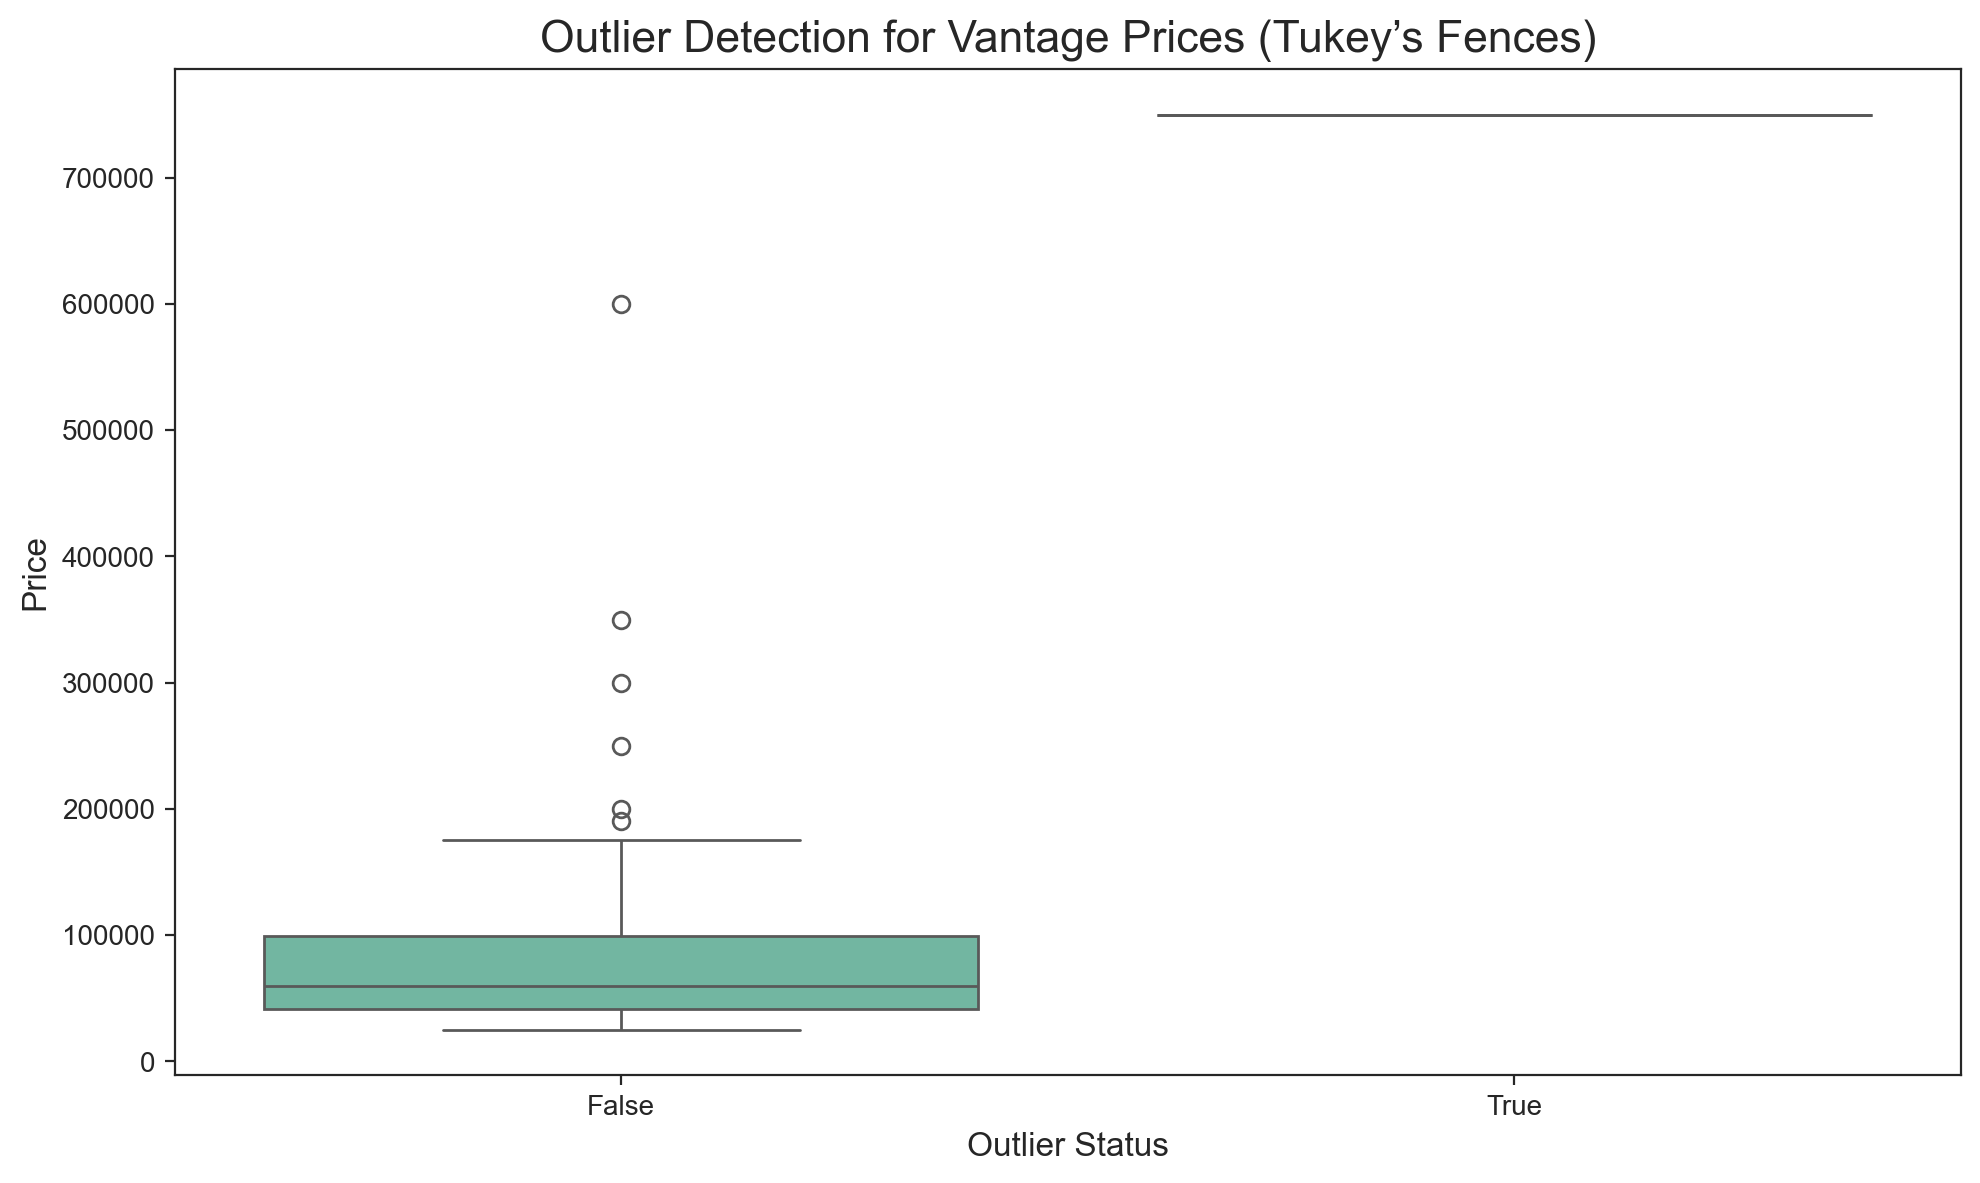

Outliers for Freelander 2:
           price  outlier
132599  87500.0     True


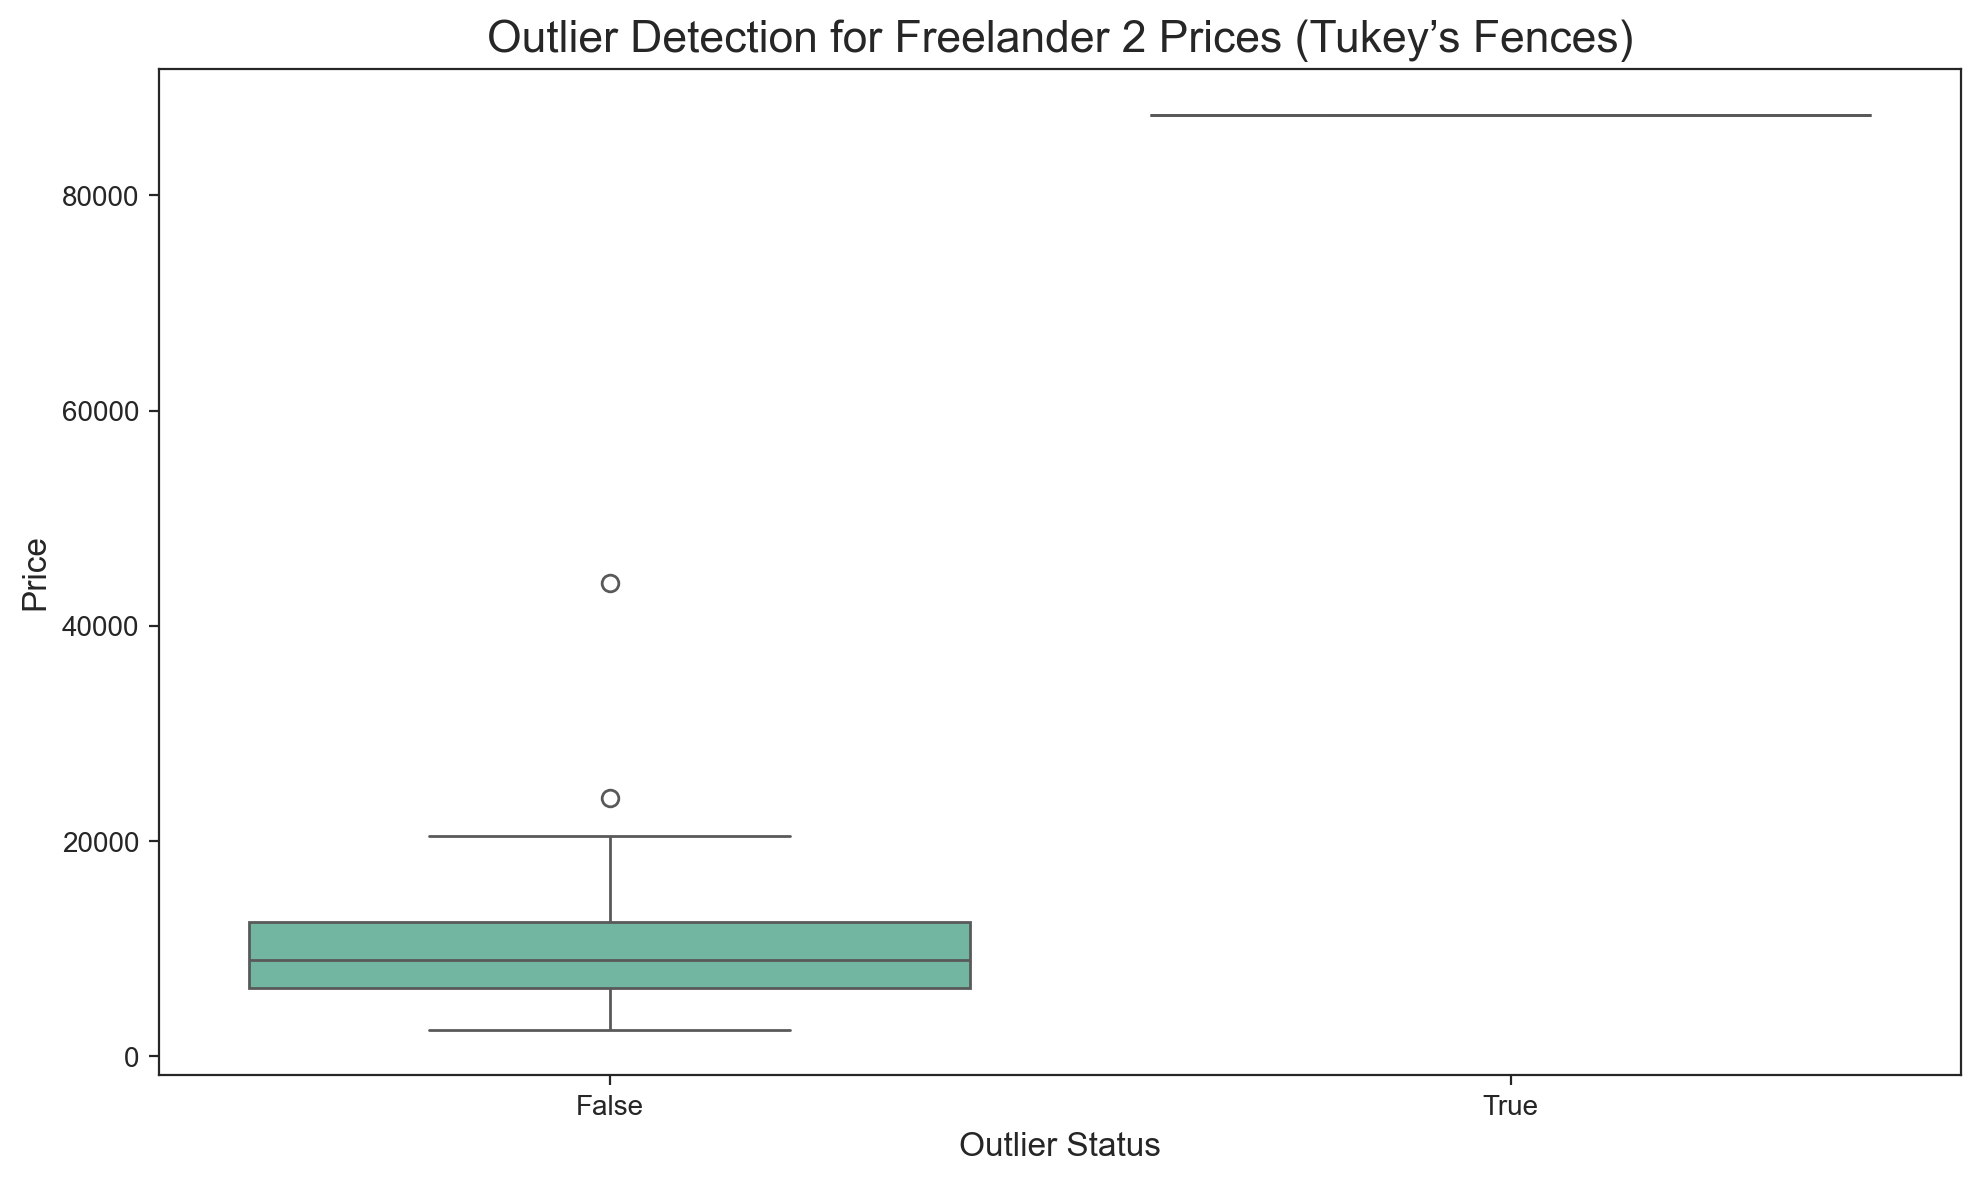

Outliers for 911:
             price  outlier
177165  1395000.0     True
255484  1395000.0     True
348950   895000.0     True


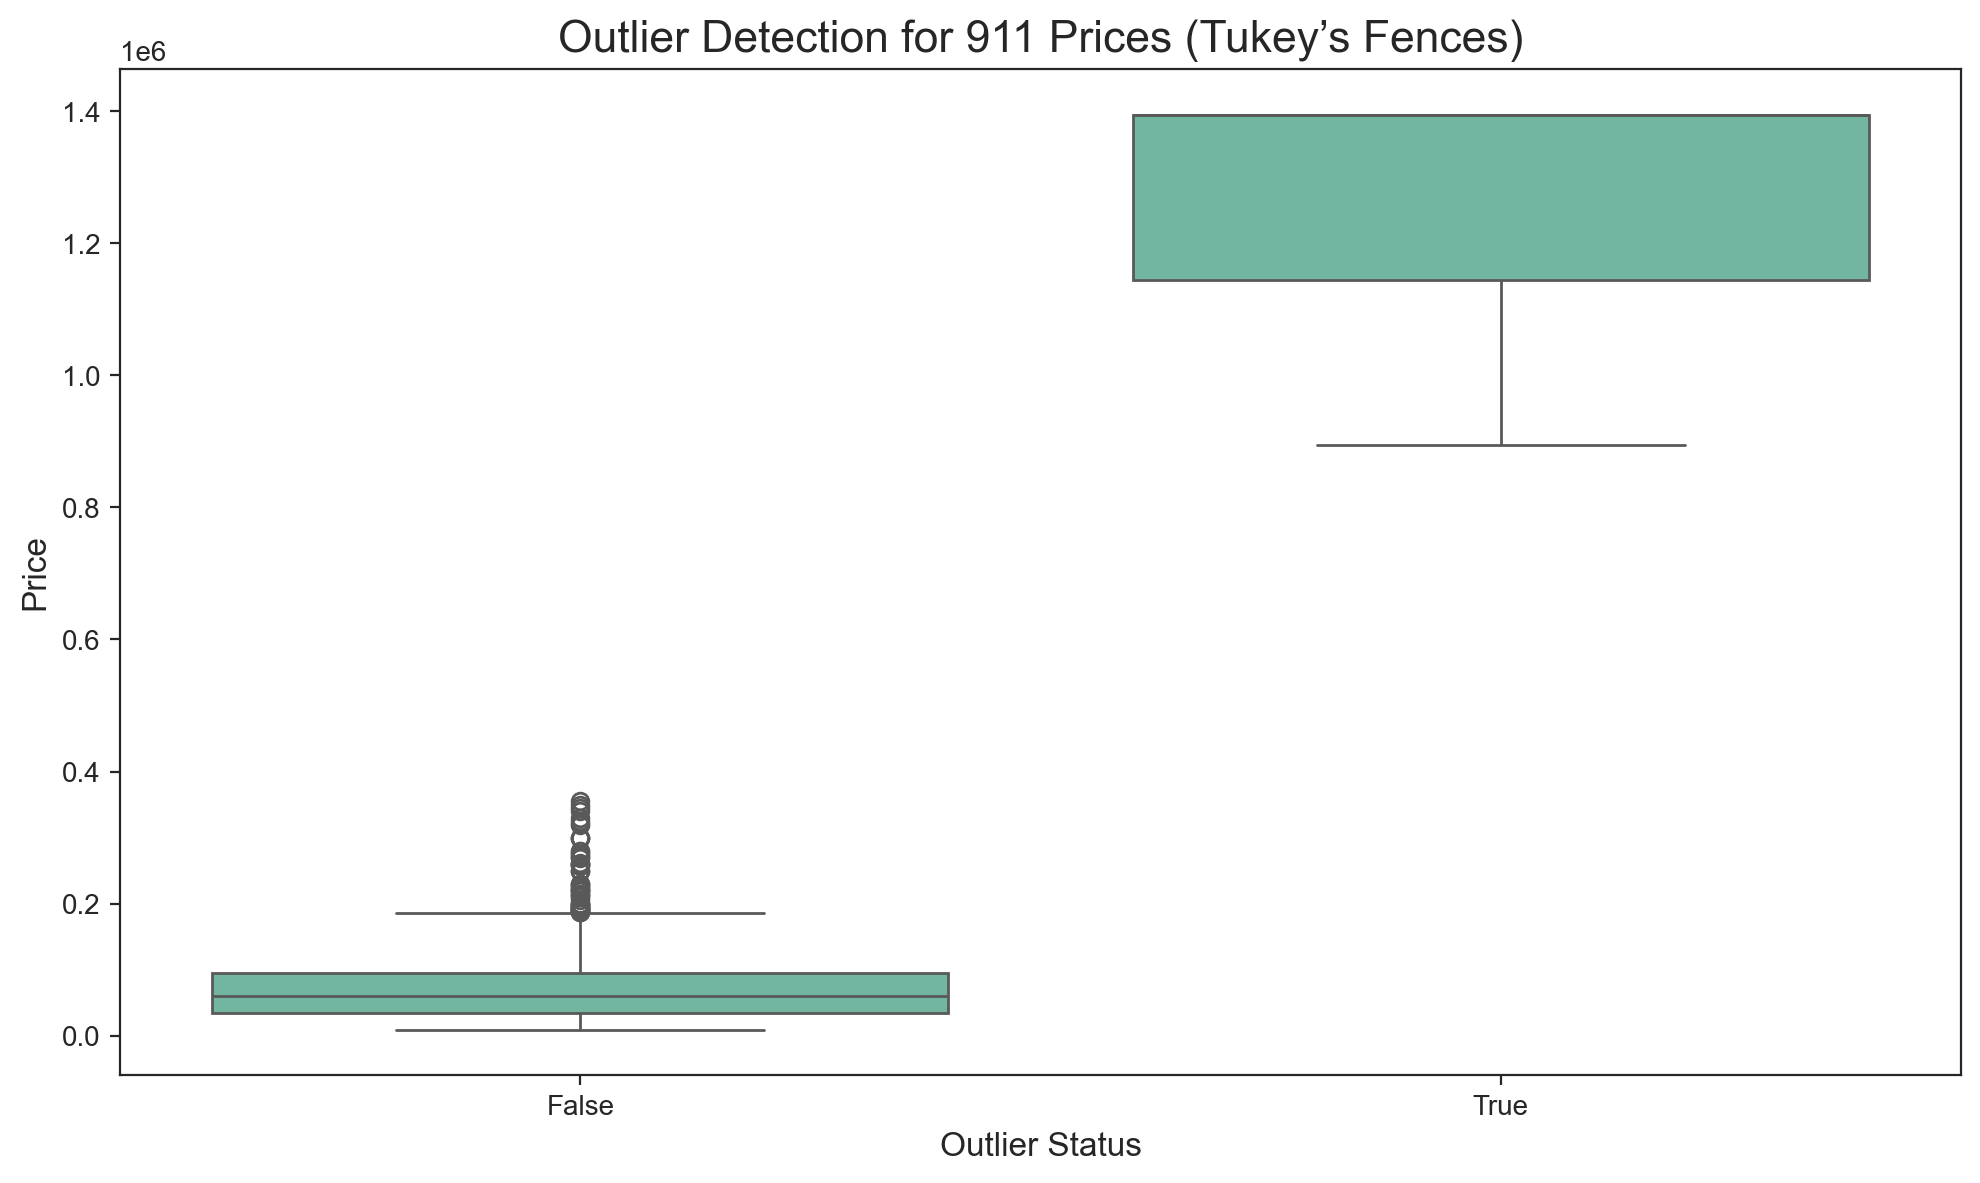

Outliers for 458:
            price  outlier
142495  499995.0     True
143203  549850.0     True
204501  544995.0     True
319163  565000.0     True


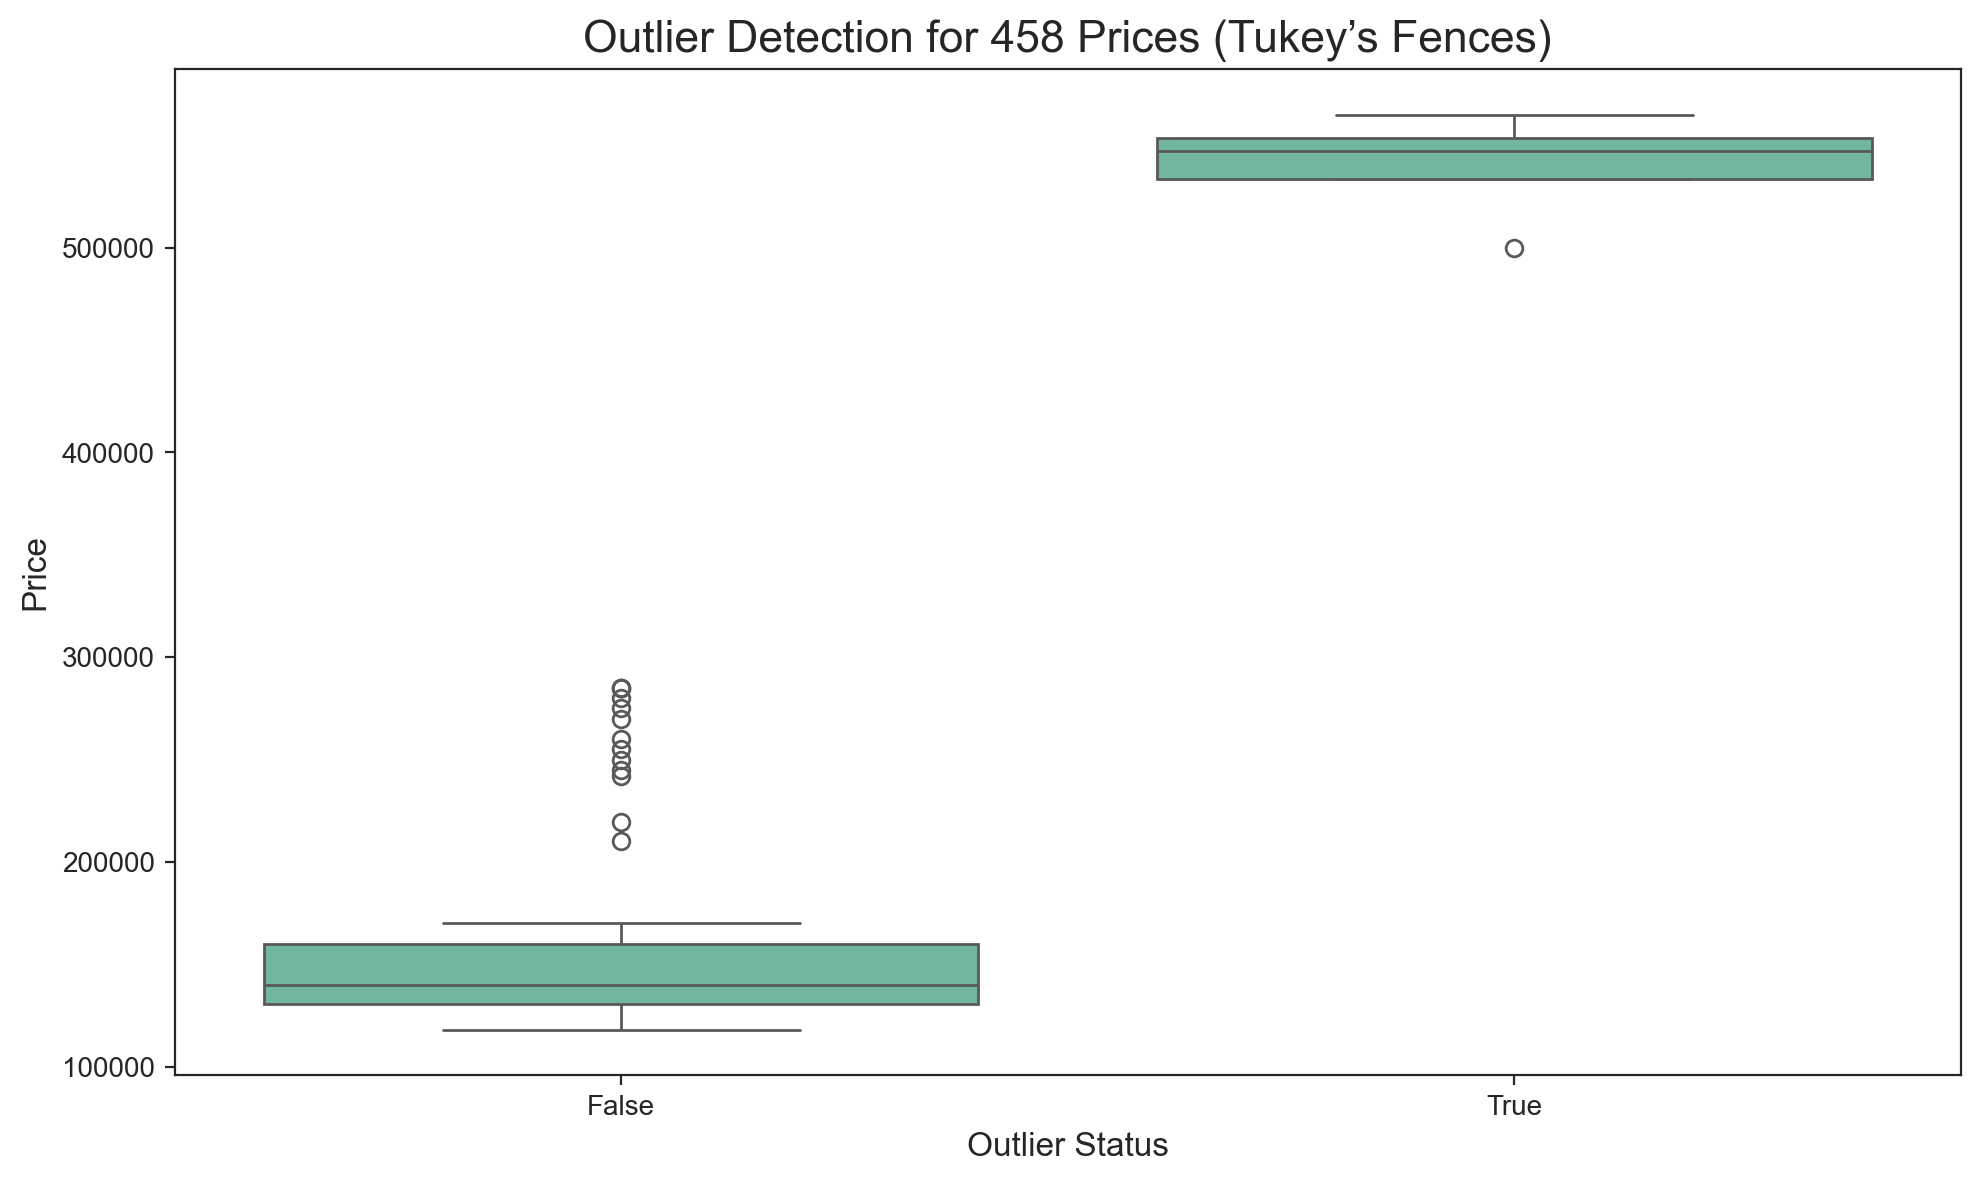

Outliers for Discovery 4:
            price  outlier
221039  162000.0     True


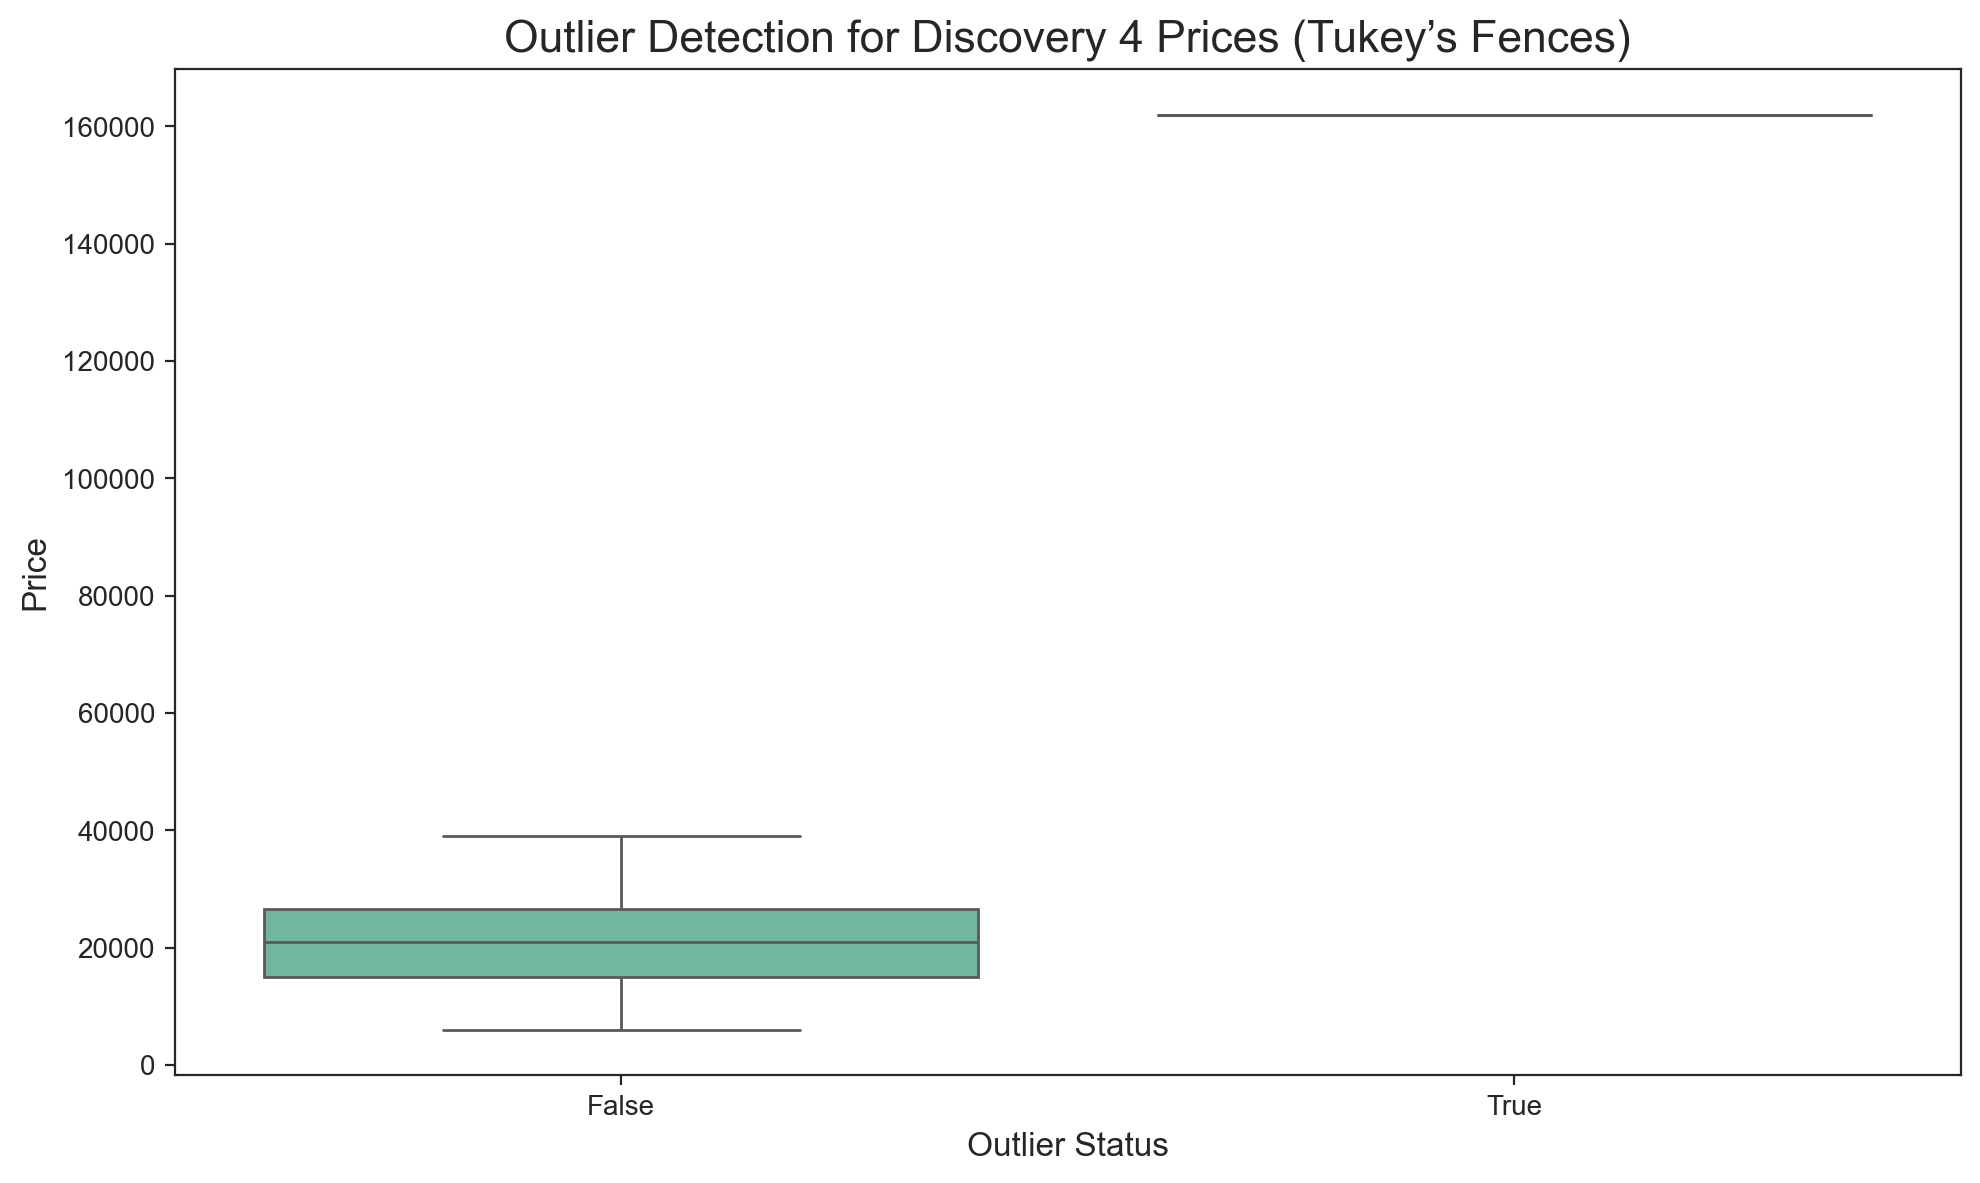

Outliers for Defender 110:
            price  outlier
31718   250000.0     True
154746  265000.0     True
241455  299999.0     True


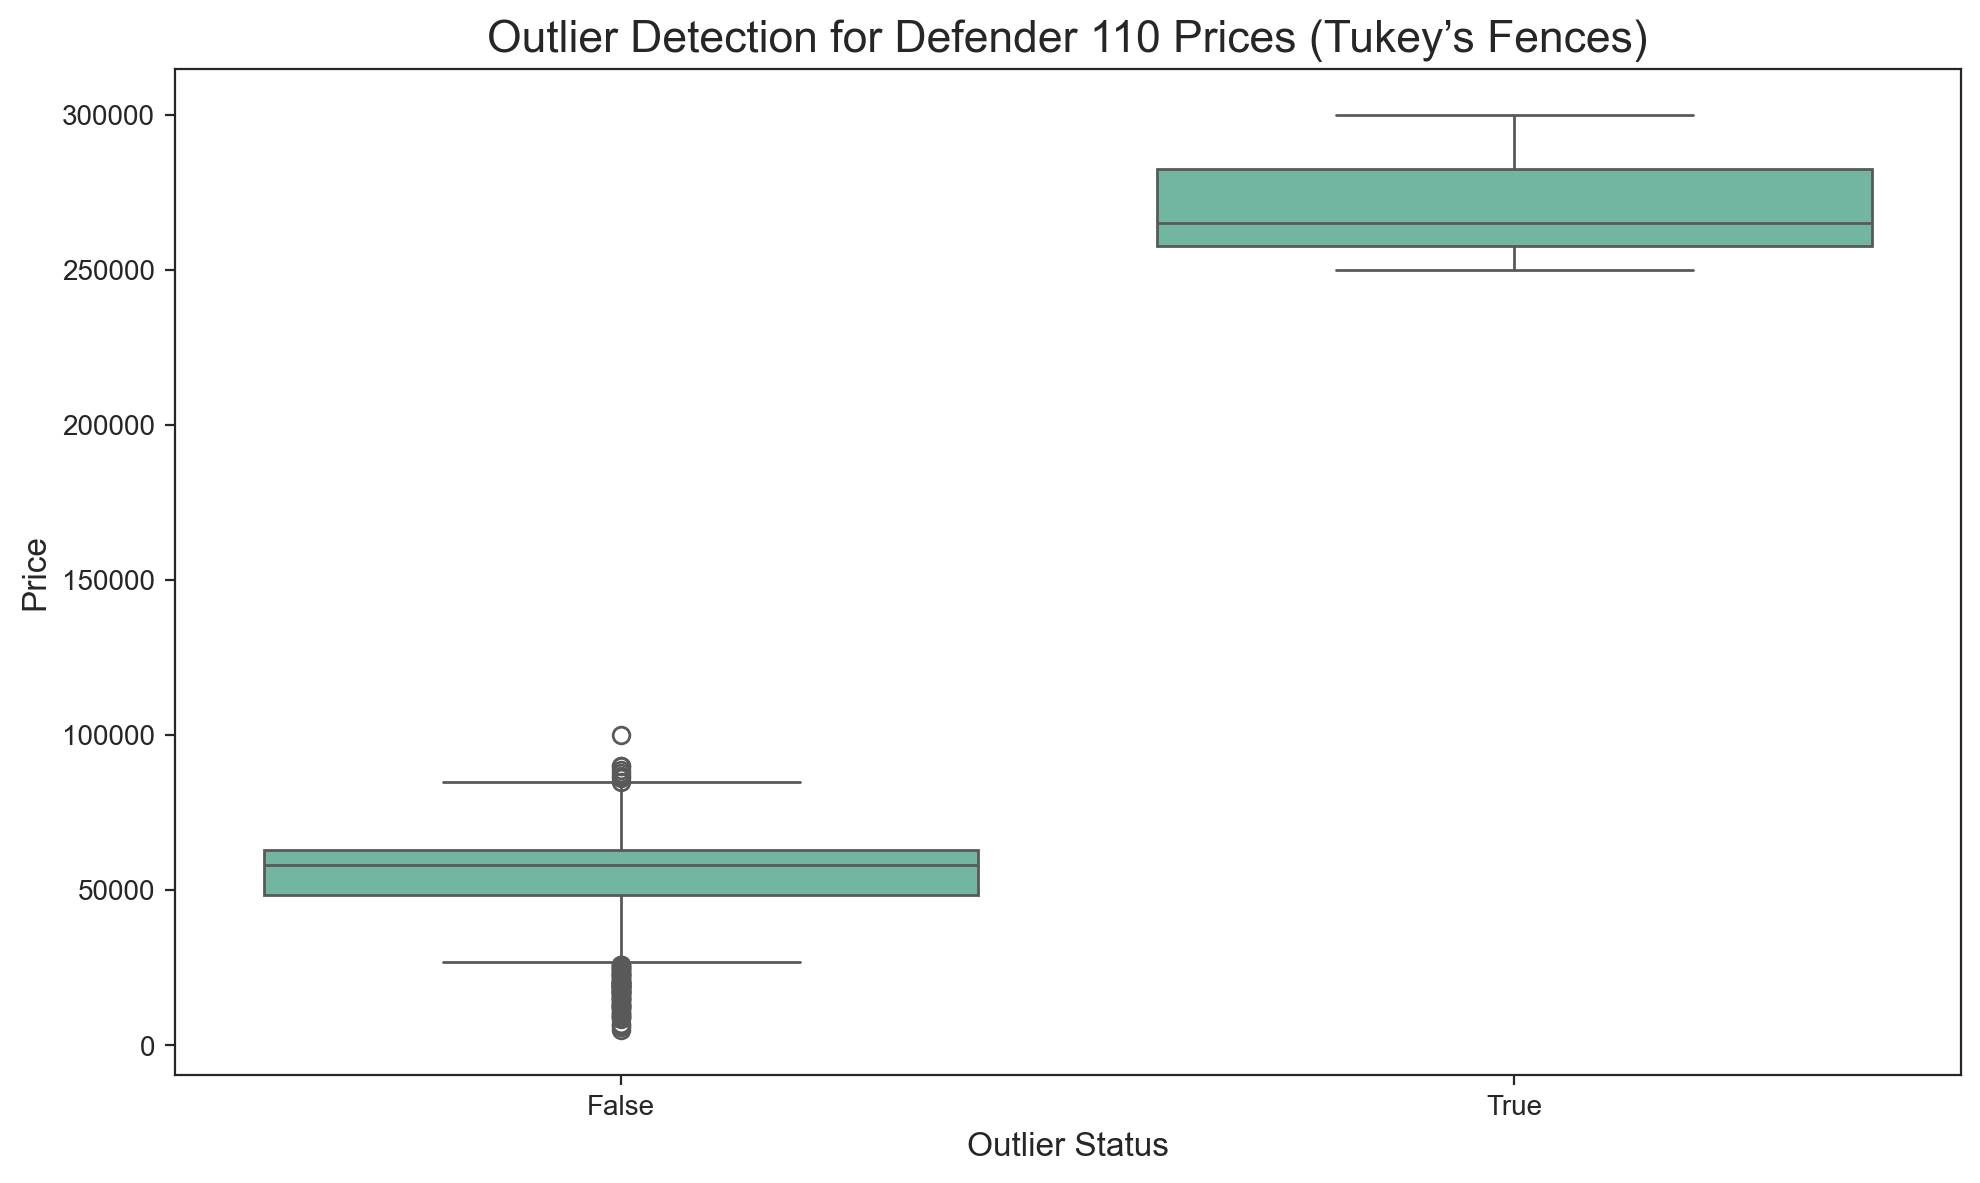

Outliers for F430:
            price  outlier
165068  299995.0     True


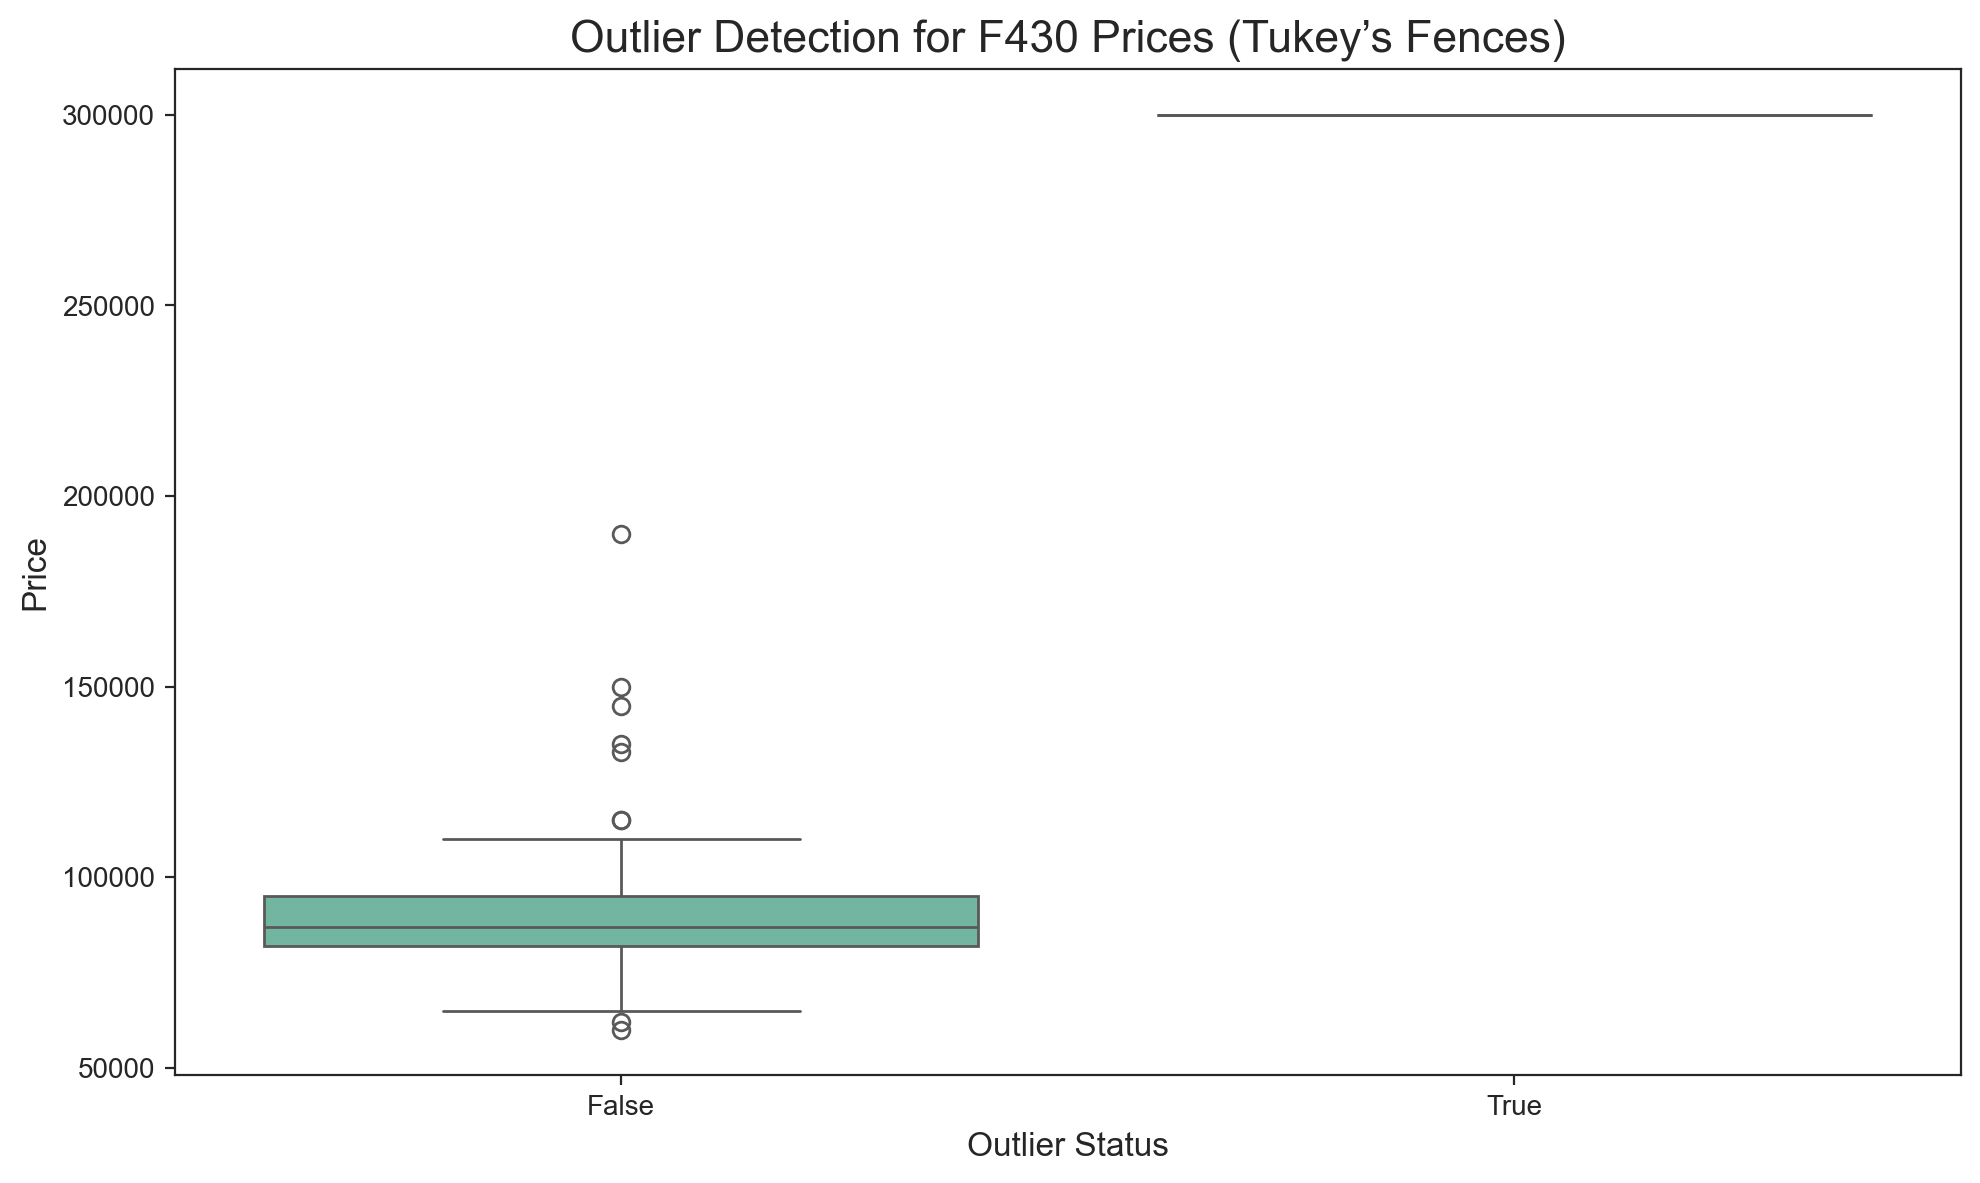

Outliers for F12berlinetta:
            price  outlier
189985  699900.0     True
388984  649950.0     True


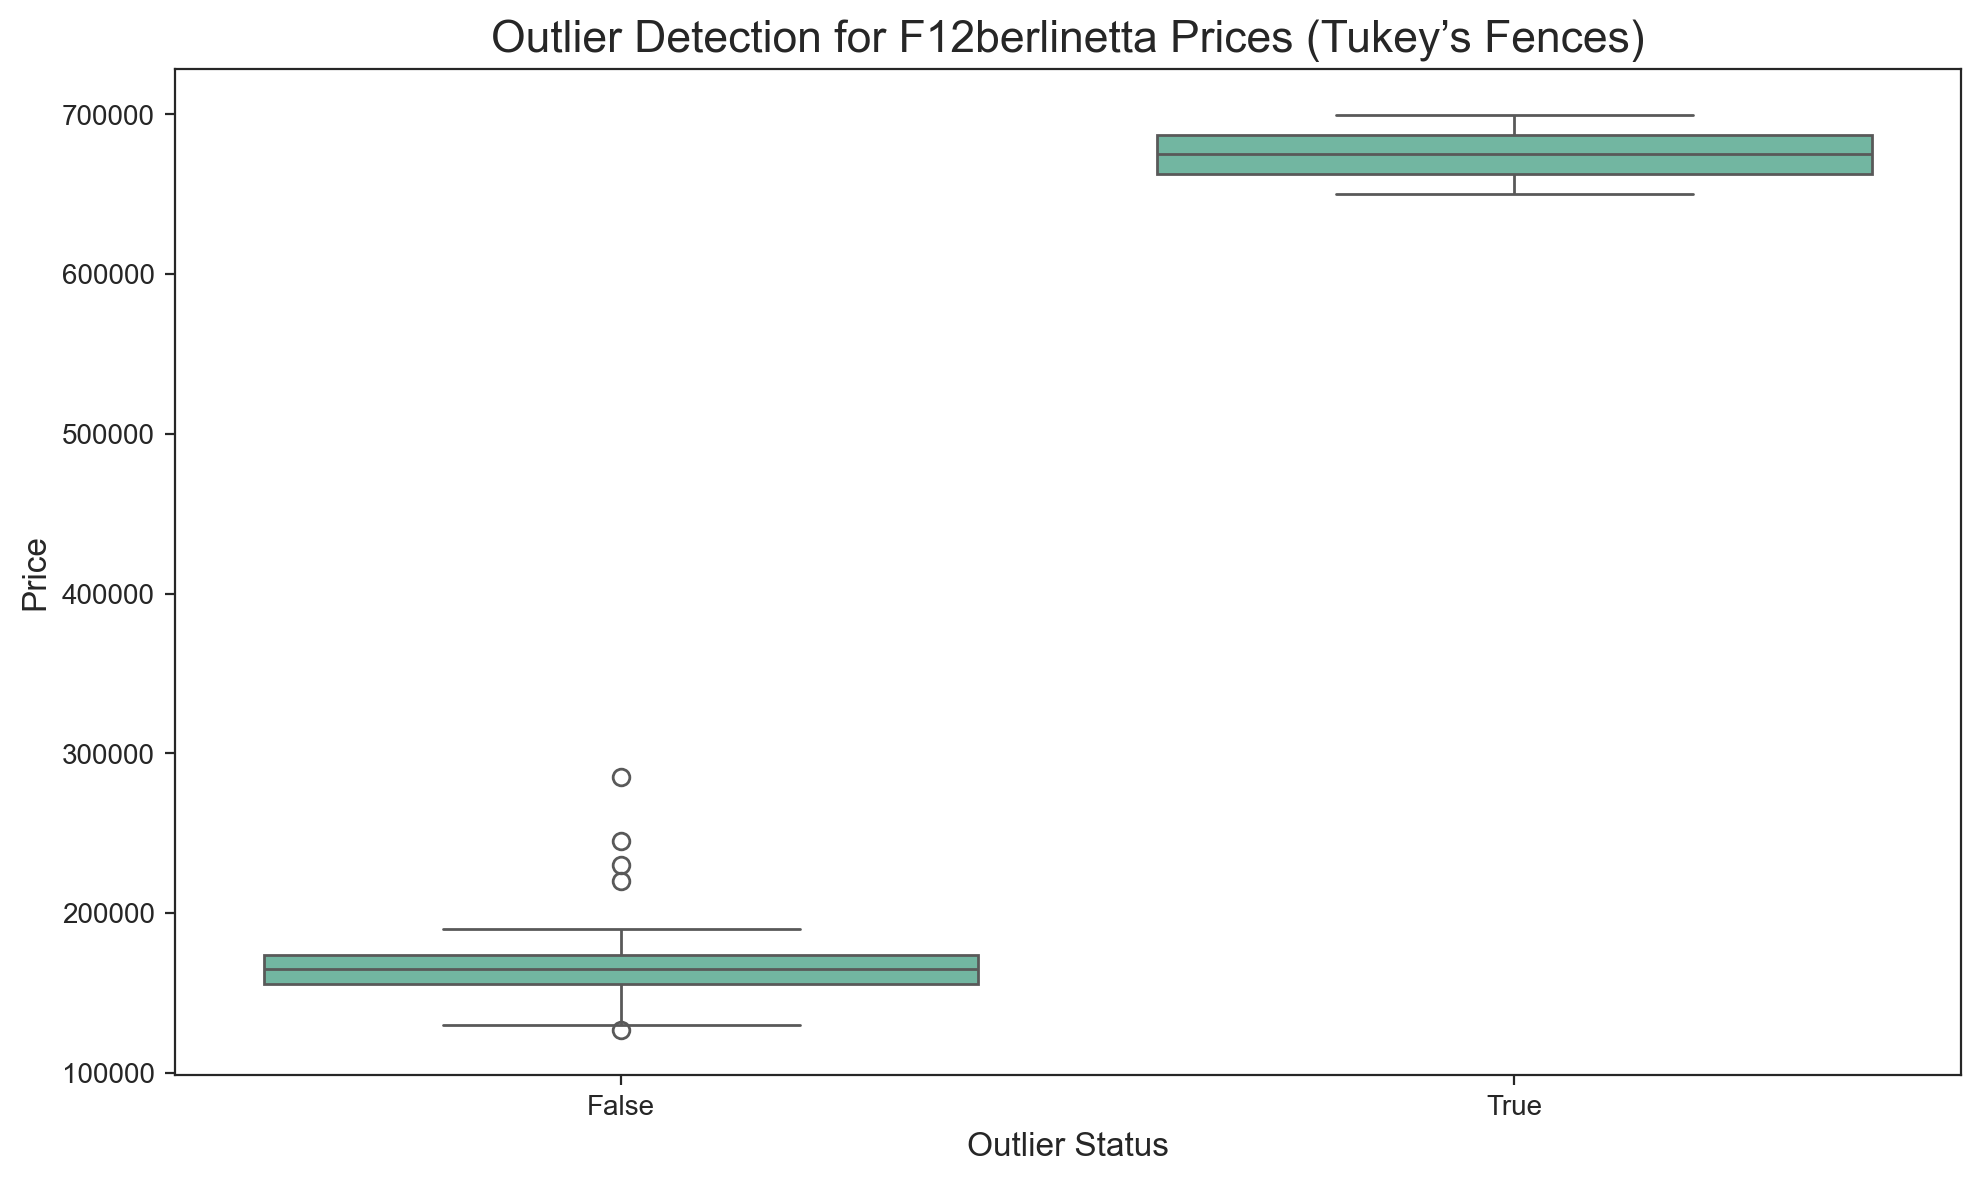

Outliers for DB7:
            price  outlier
262729  274990.0     True


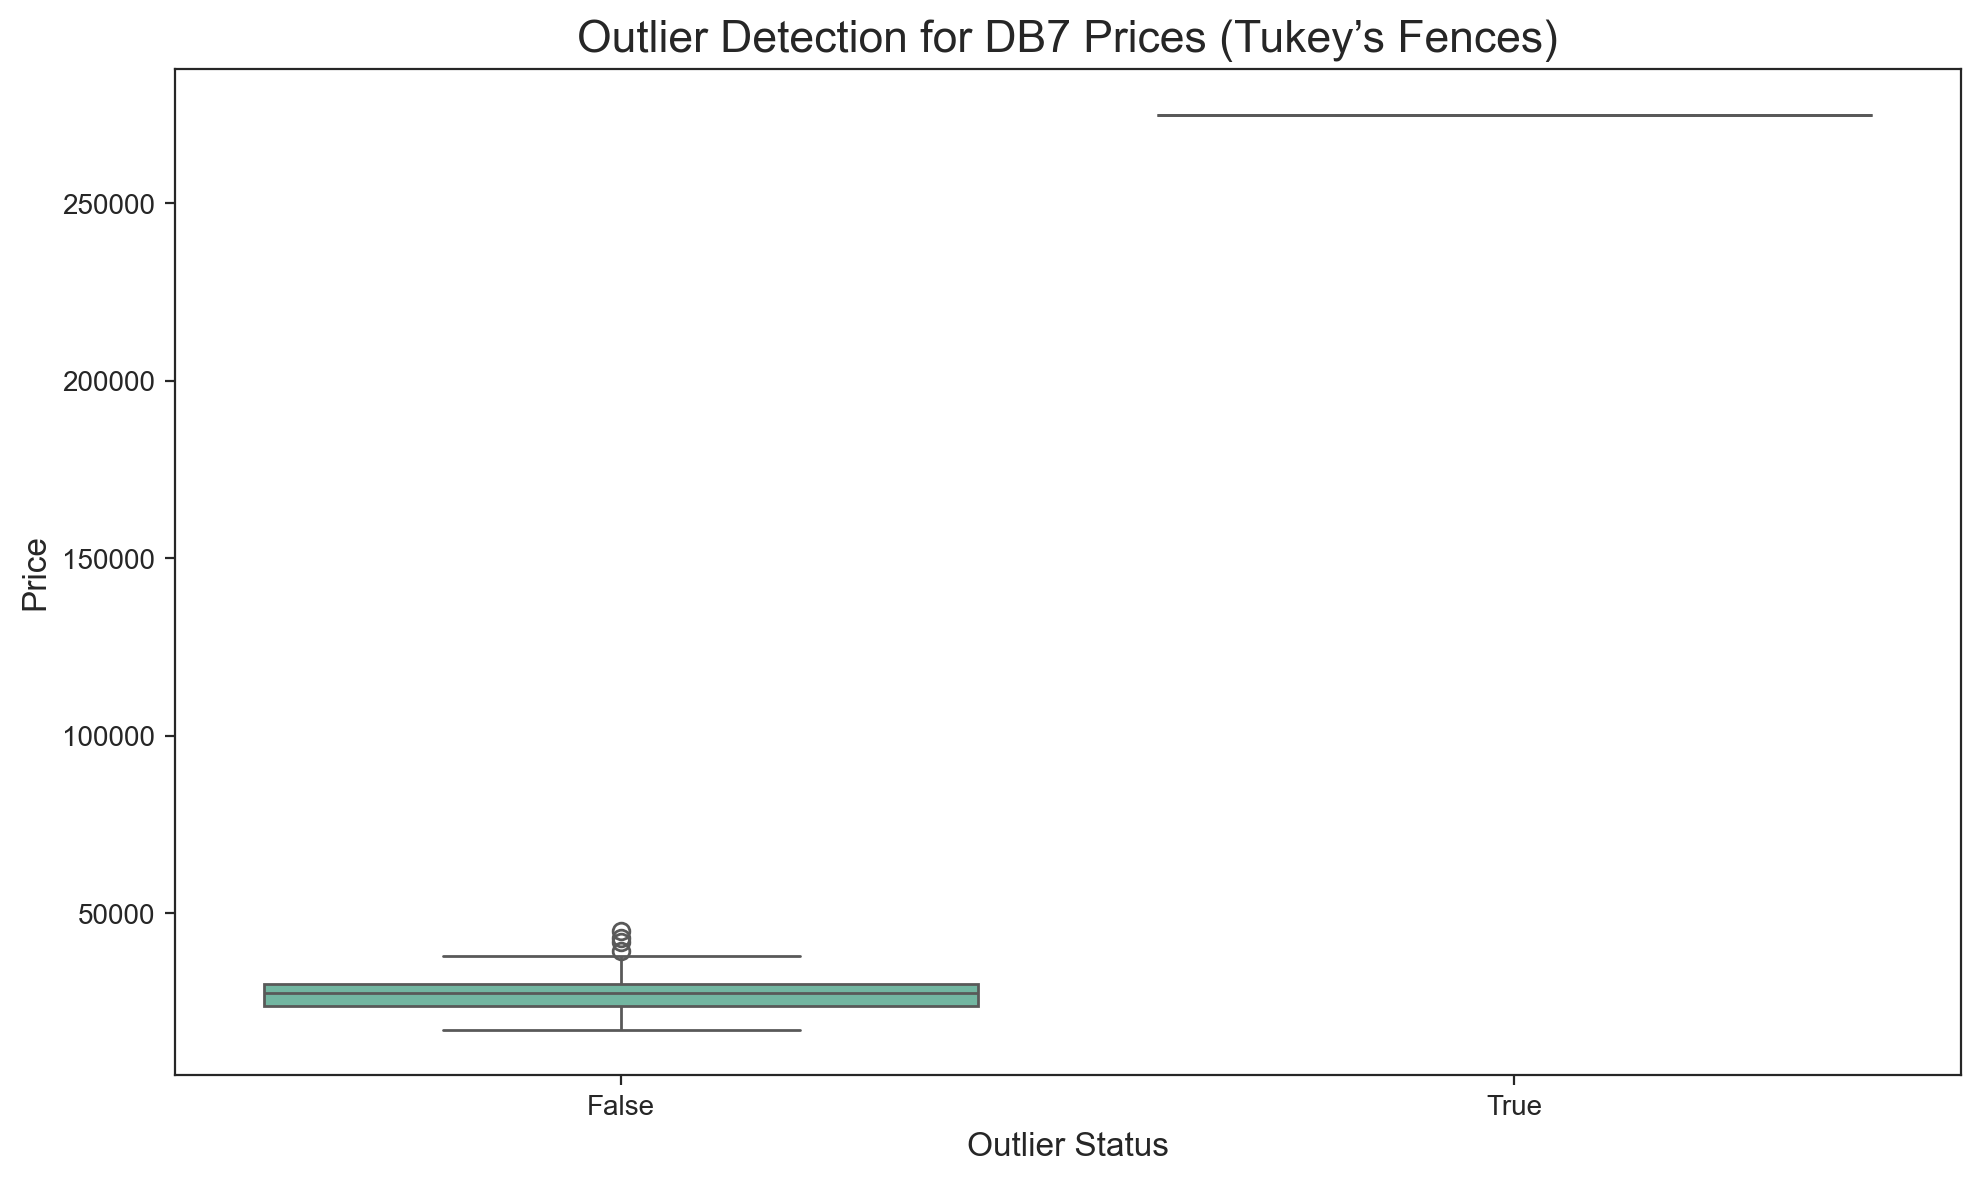

Outliers for 599:
            price  outlier
24028   489989.0     True
154105  499850.0     True
219315  489990.0     True


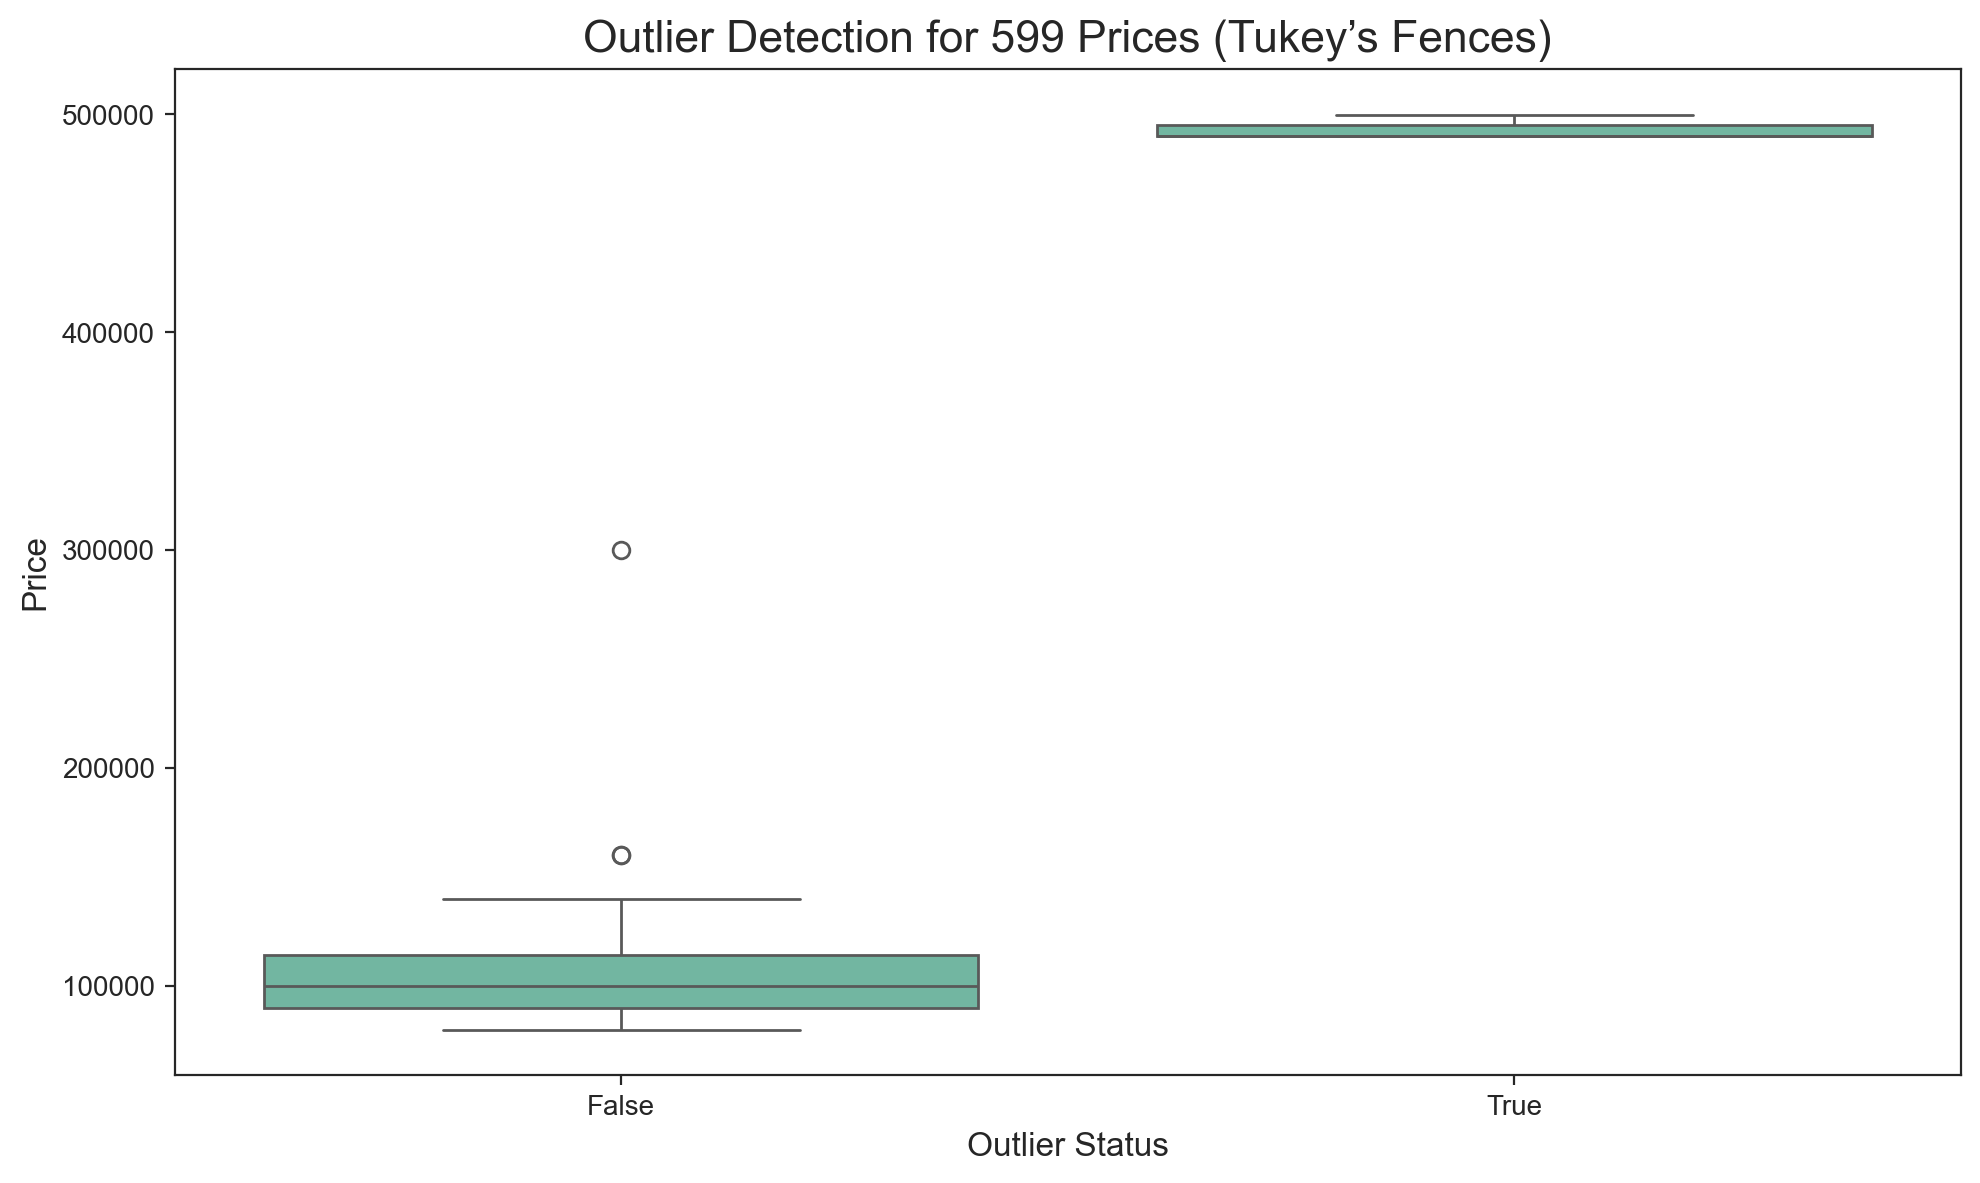

Outliers for XE:
            price  outlier
79054   147403.0     True
121687  127990.0     True
134737  155000.0     True
279172  153000.0     True
285246  123995.0     True
327182  134995.0     True
388370  129950.0     True


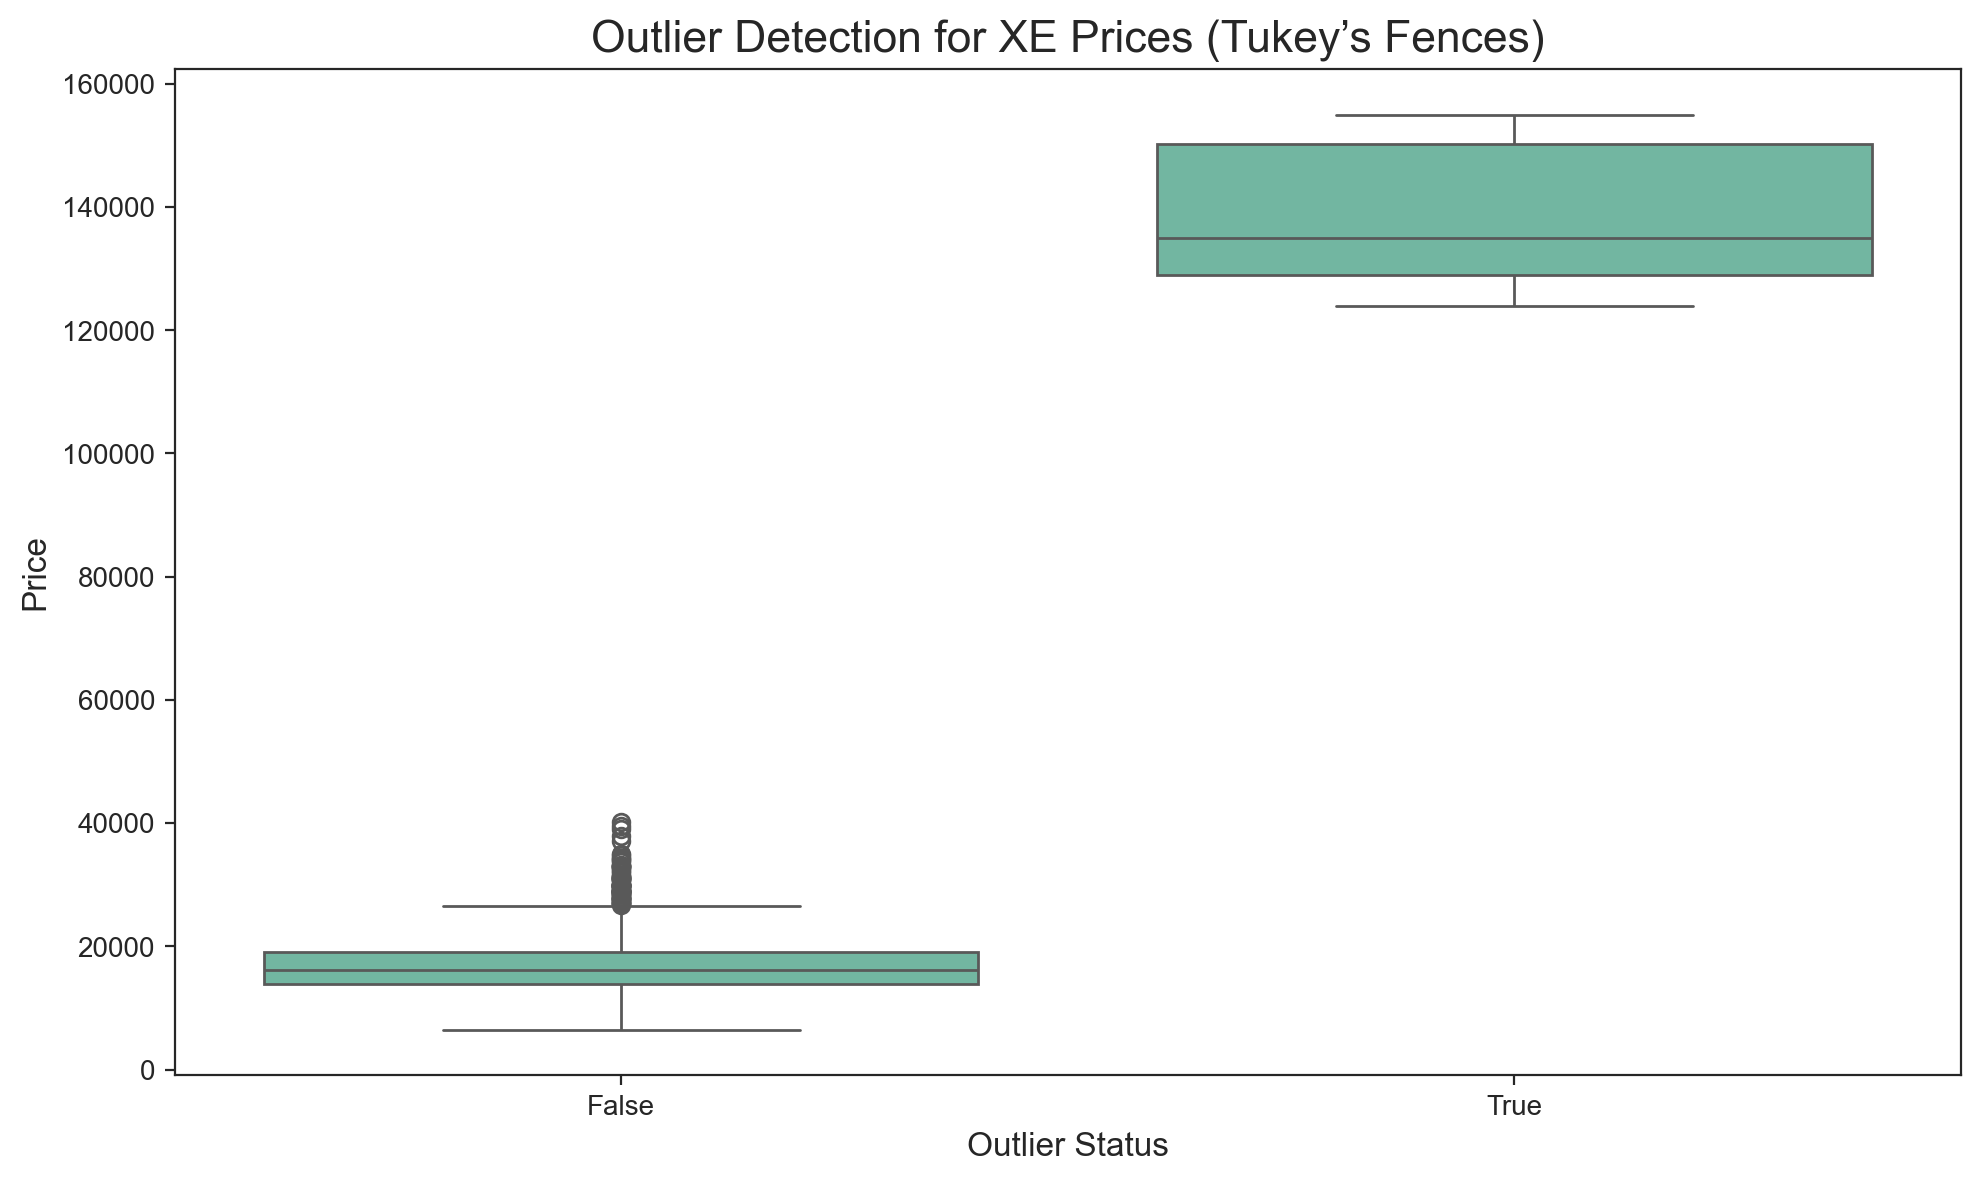

Outliers for Freelander:
           price  outlier
109831  19995.0     True


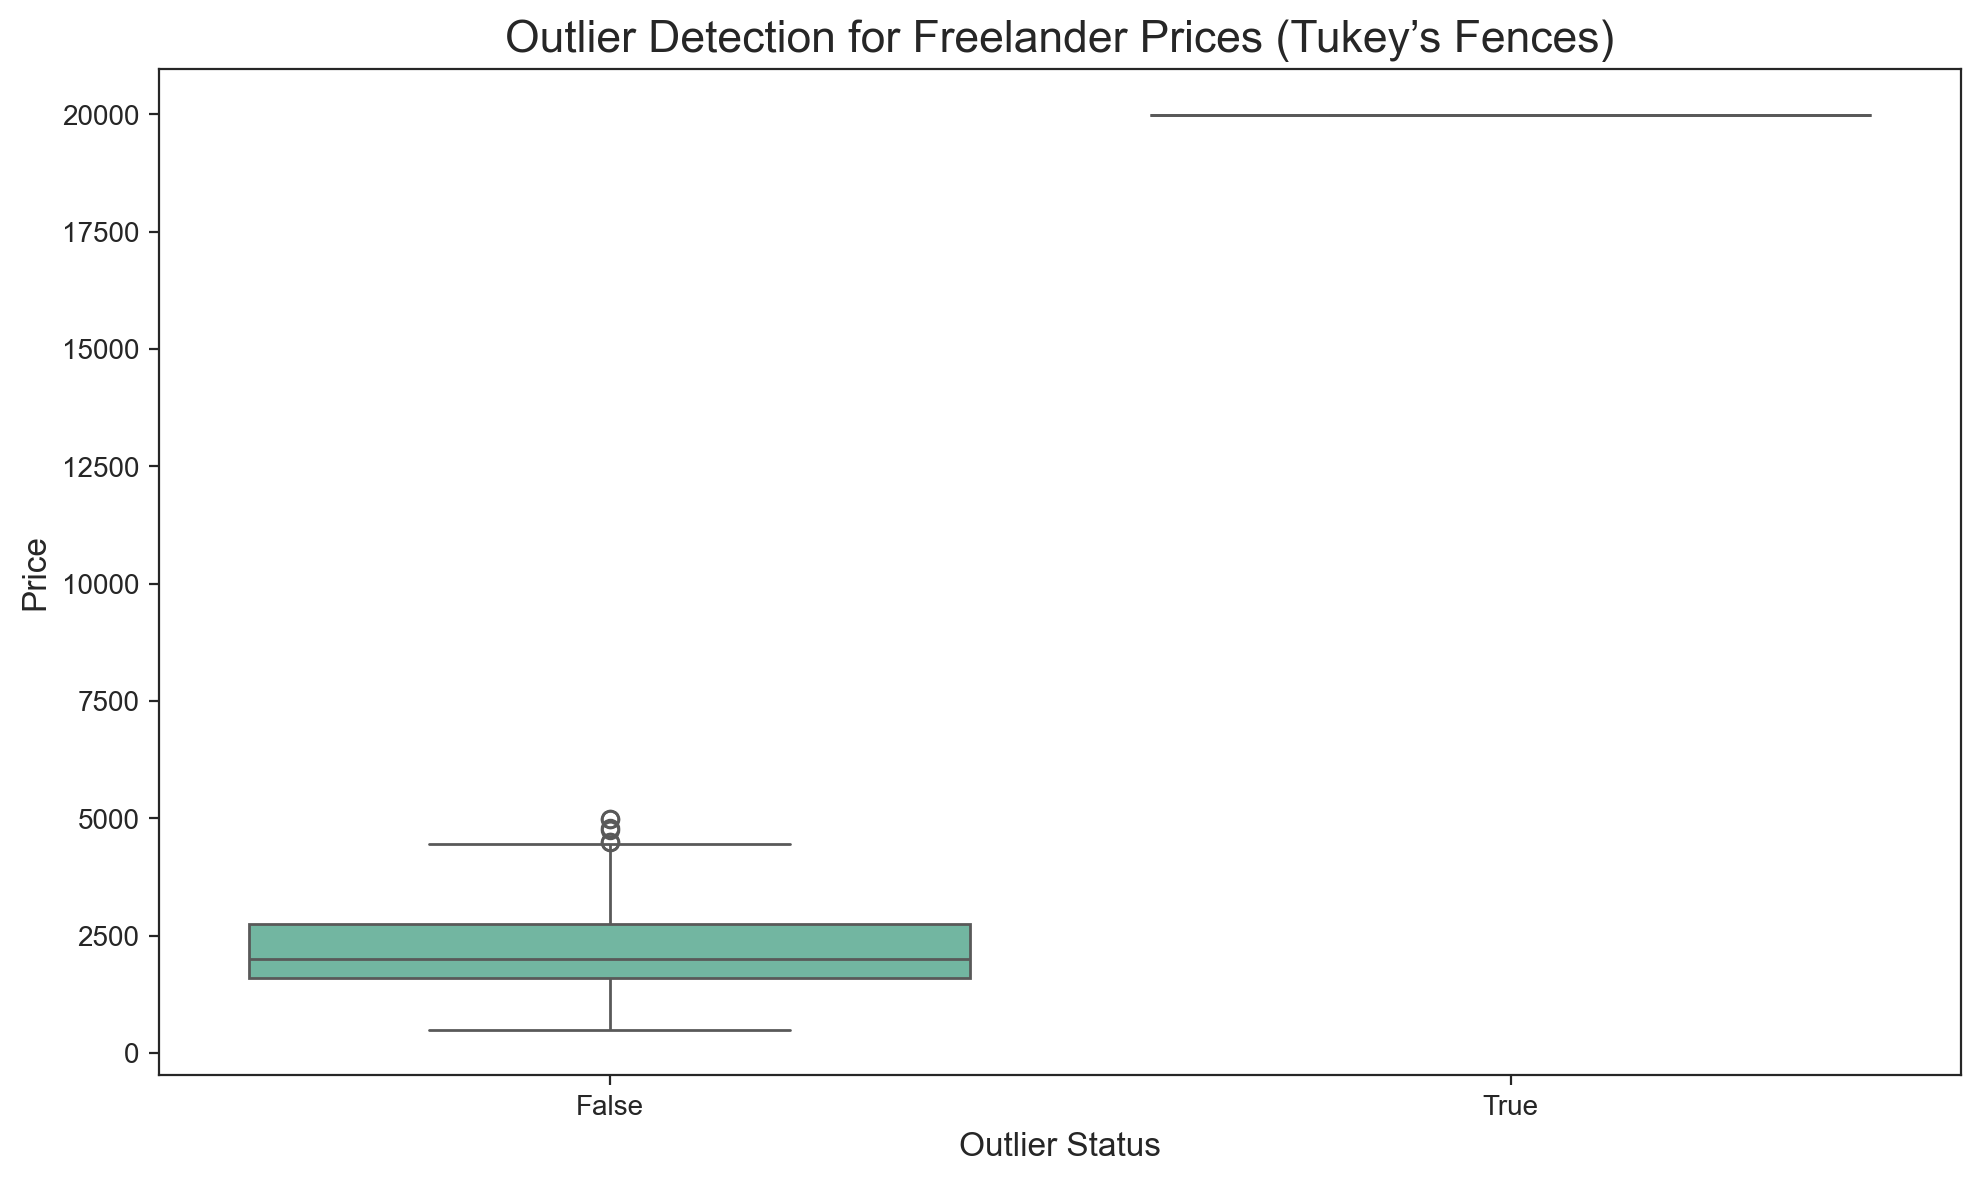

Outliers for Celica:
         price  outlier
5398  23450.0     True


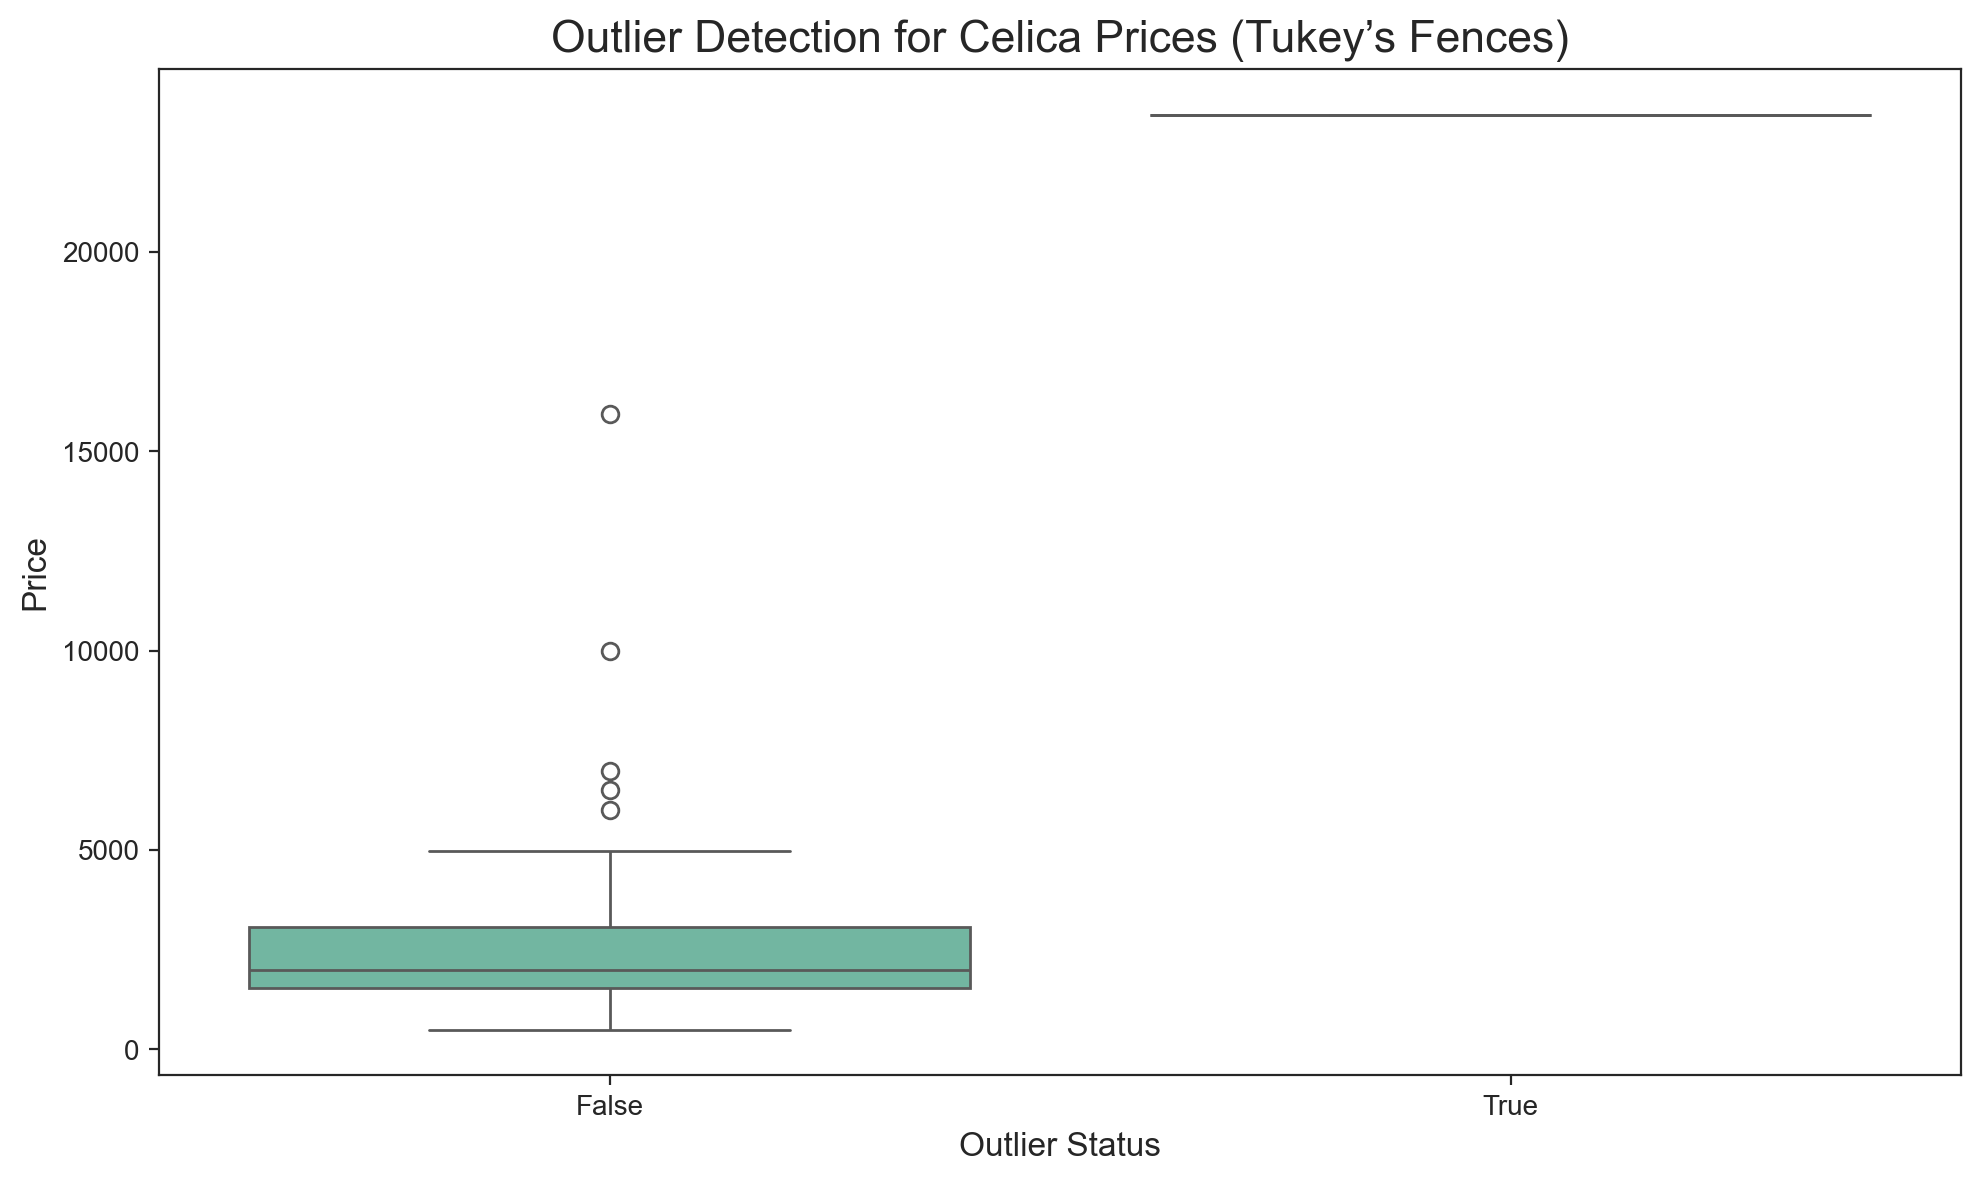

Outliers for DS3:
           price  outlier
337548  21869.0     True


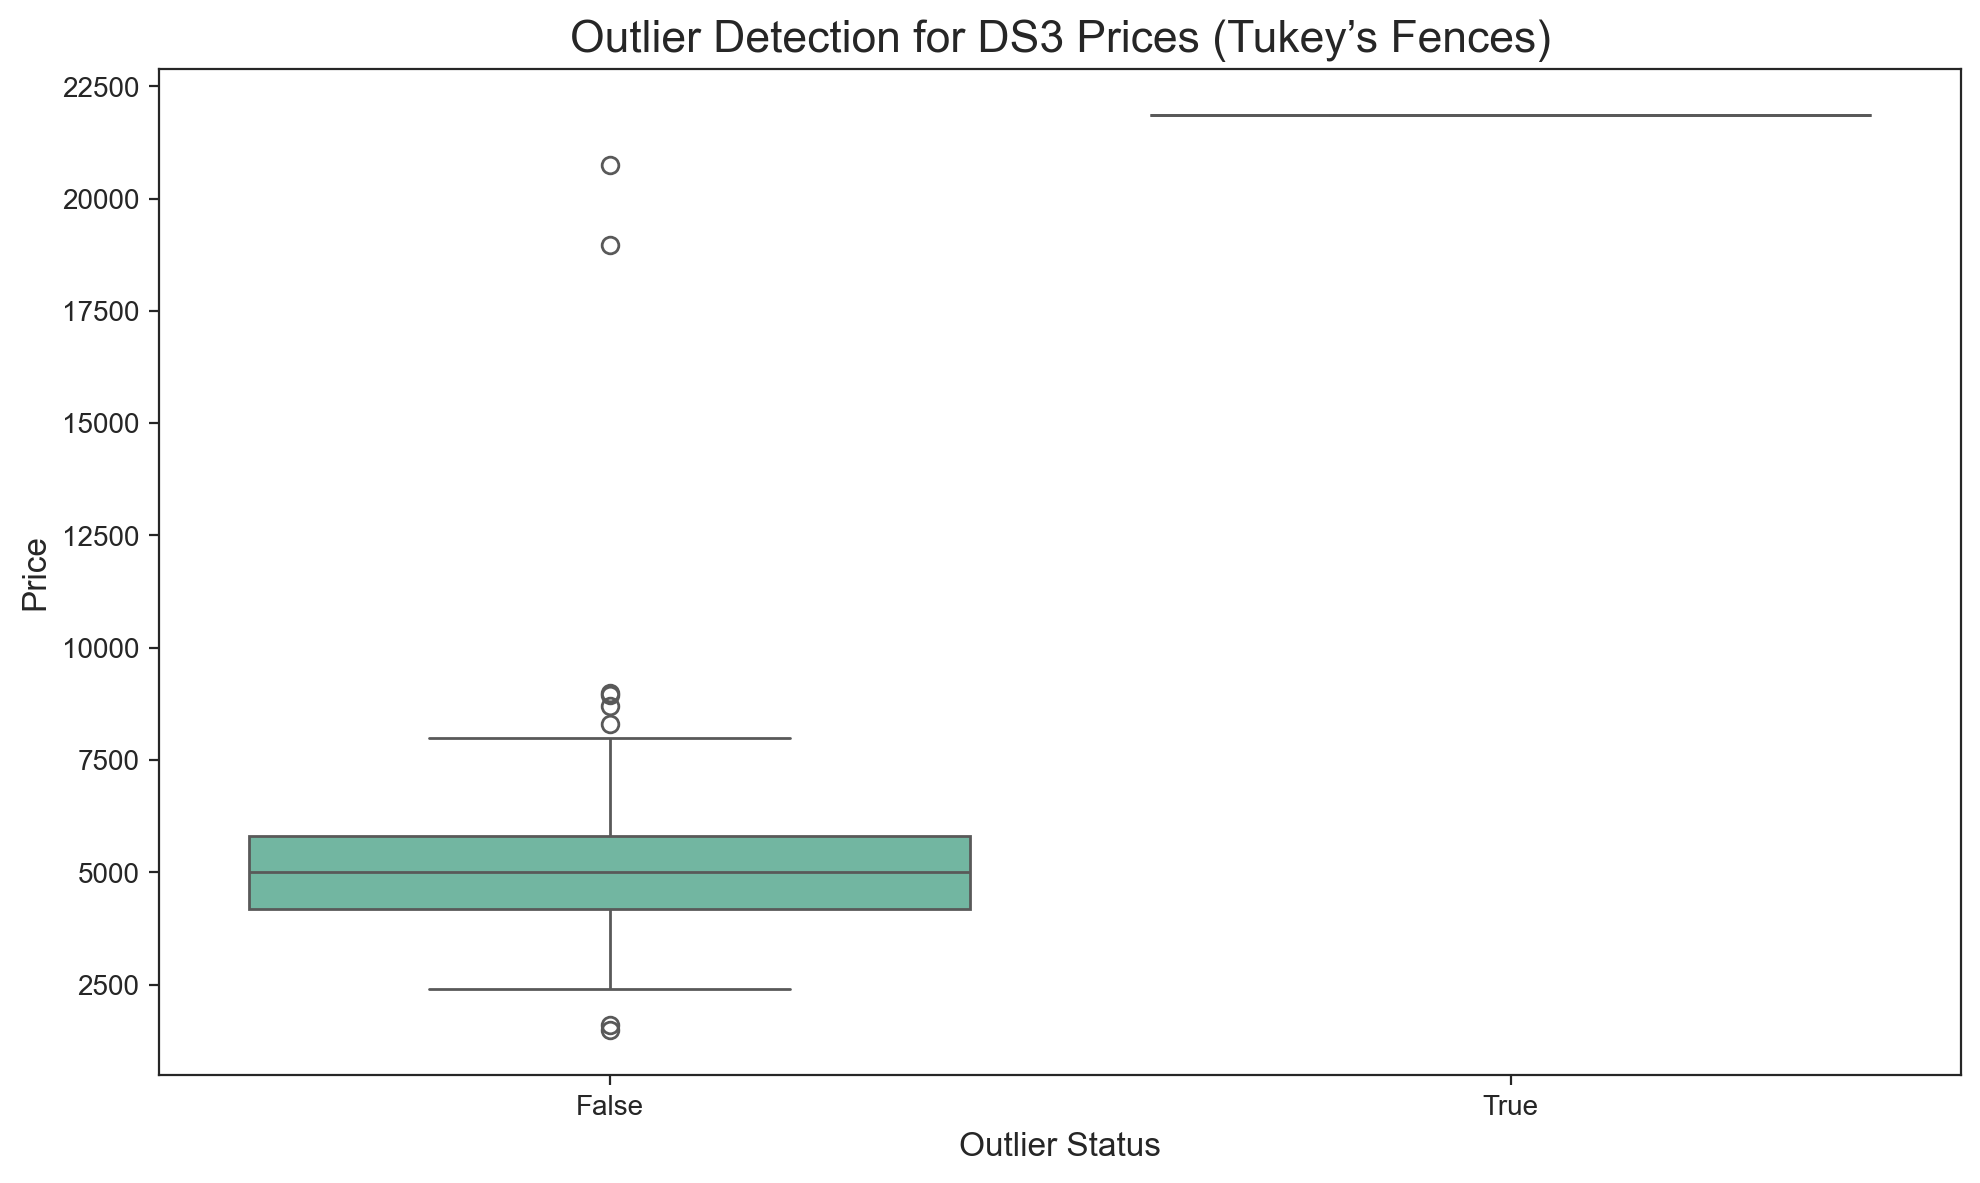

Outliers for C5:
           price  outlier
171006  28000.0     True


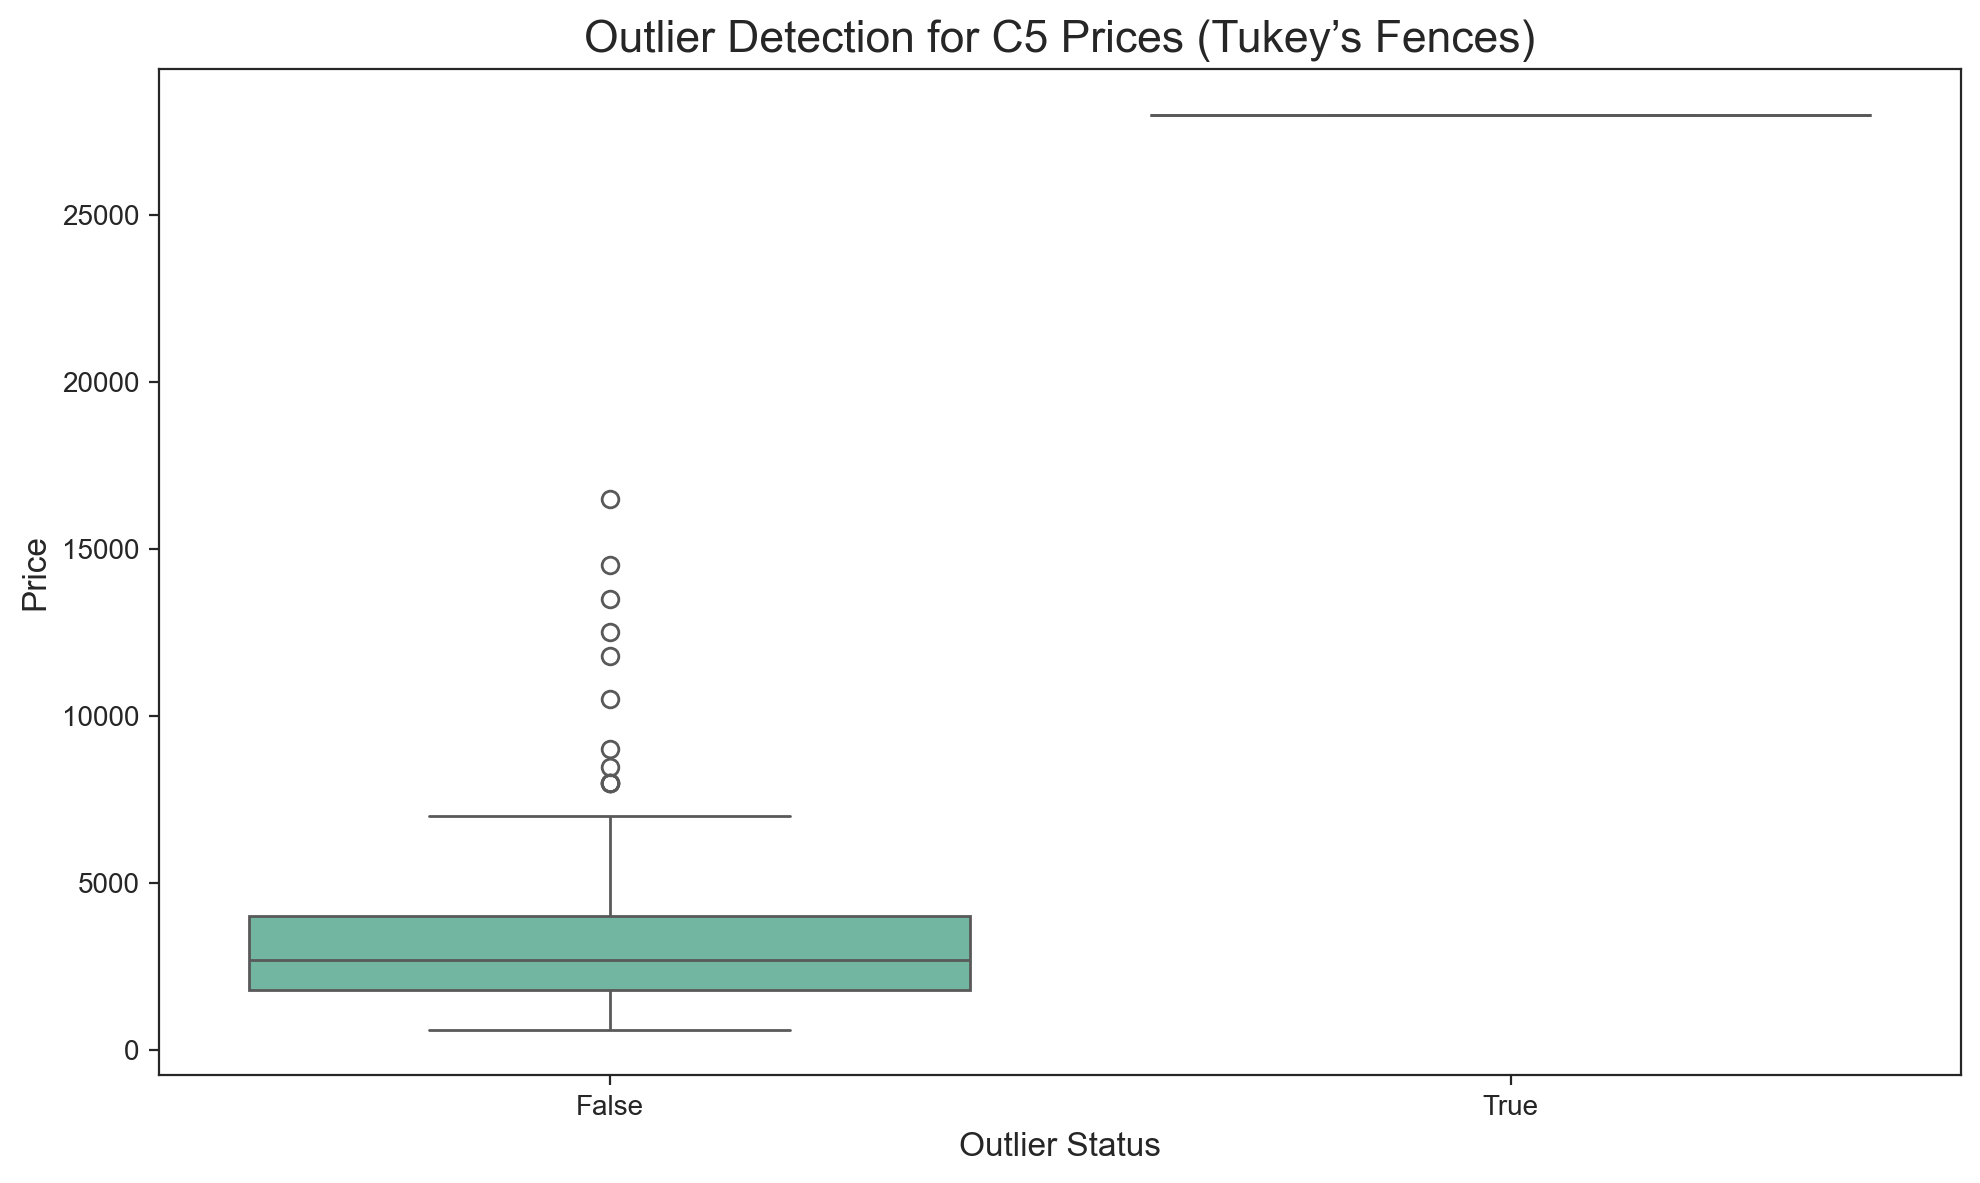

Outliers for V Class:
             price  outlier
283280  1000000.0     True


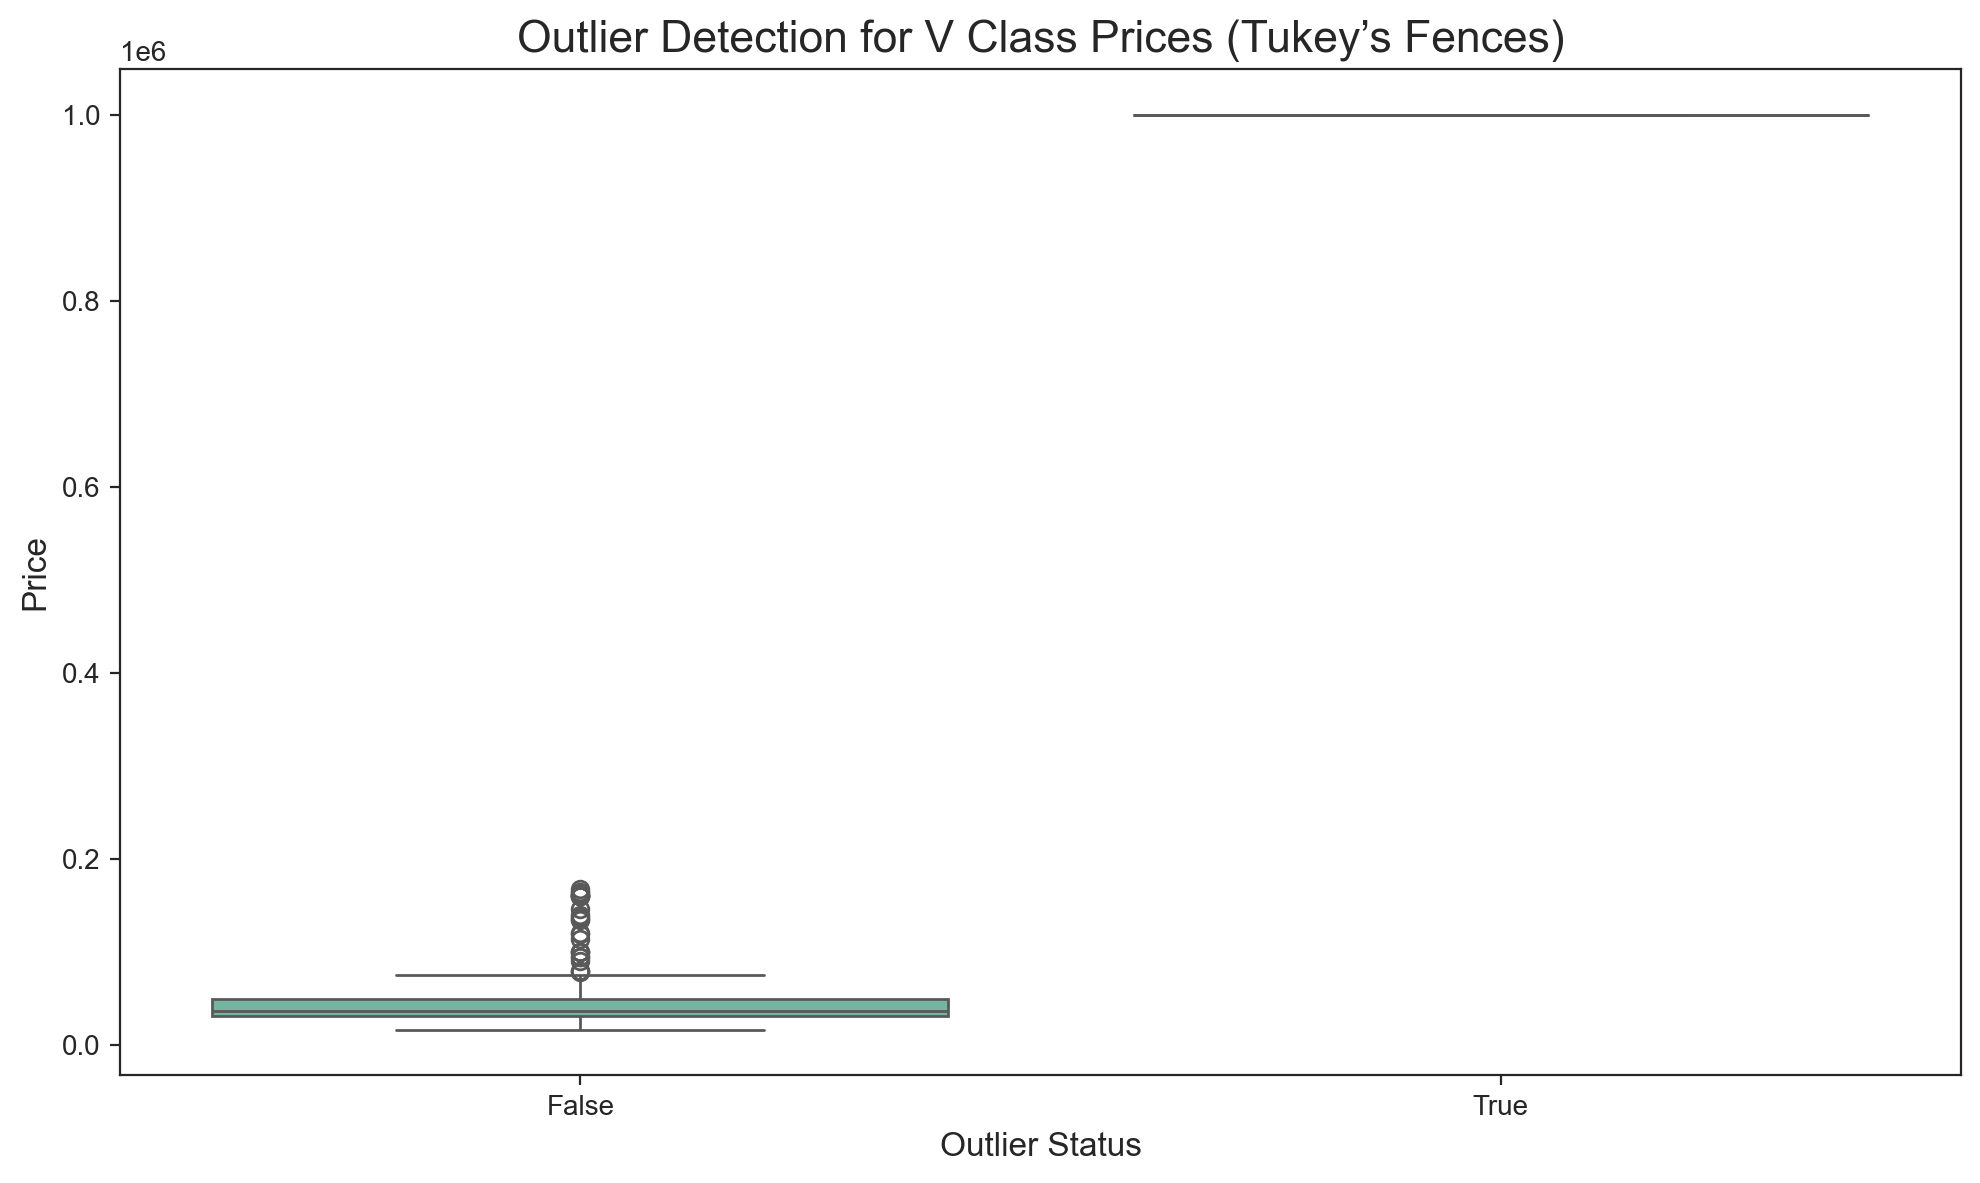

Outliers for C30:
           price  outlier
383705  31777.0     True


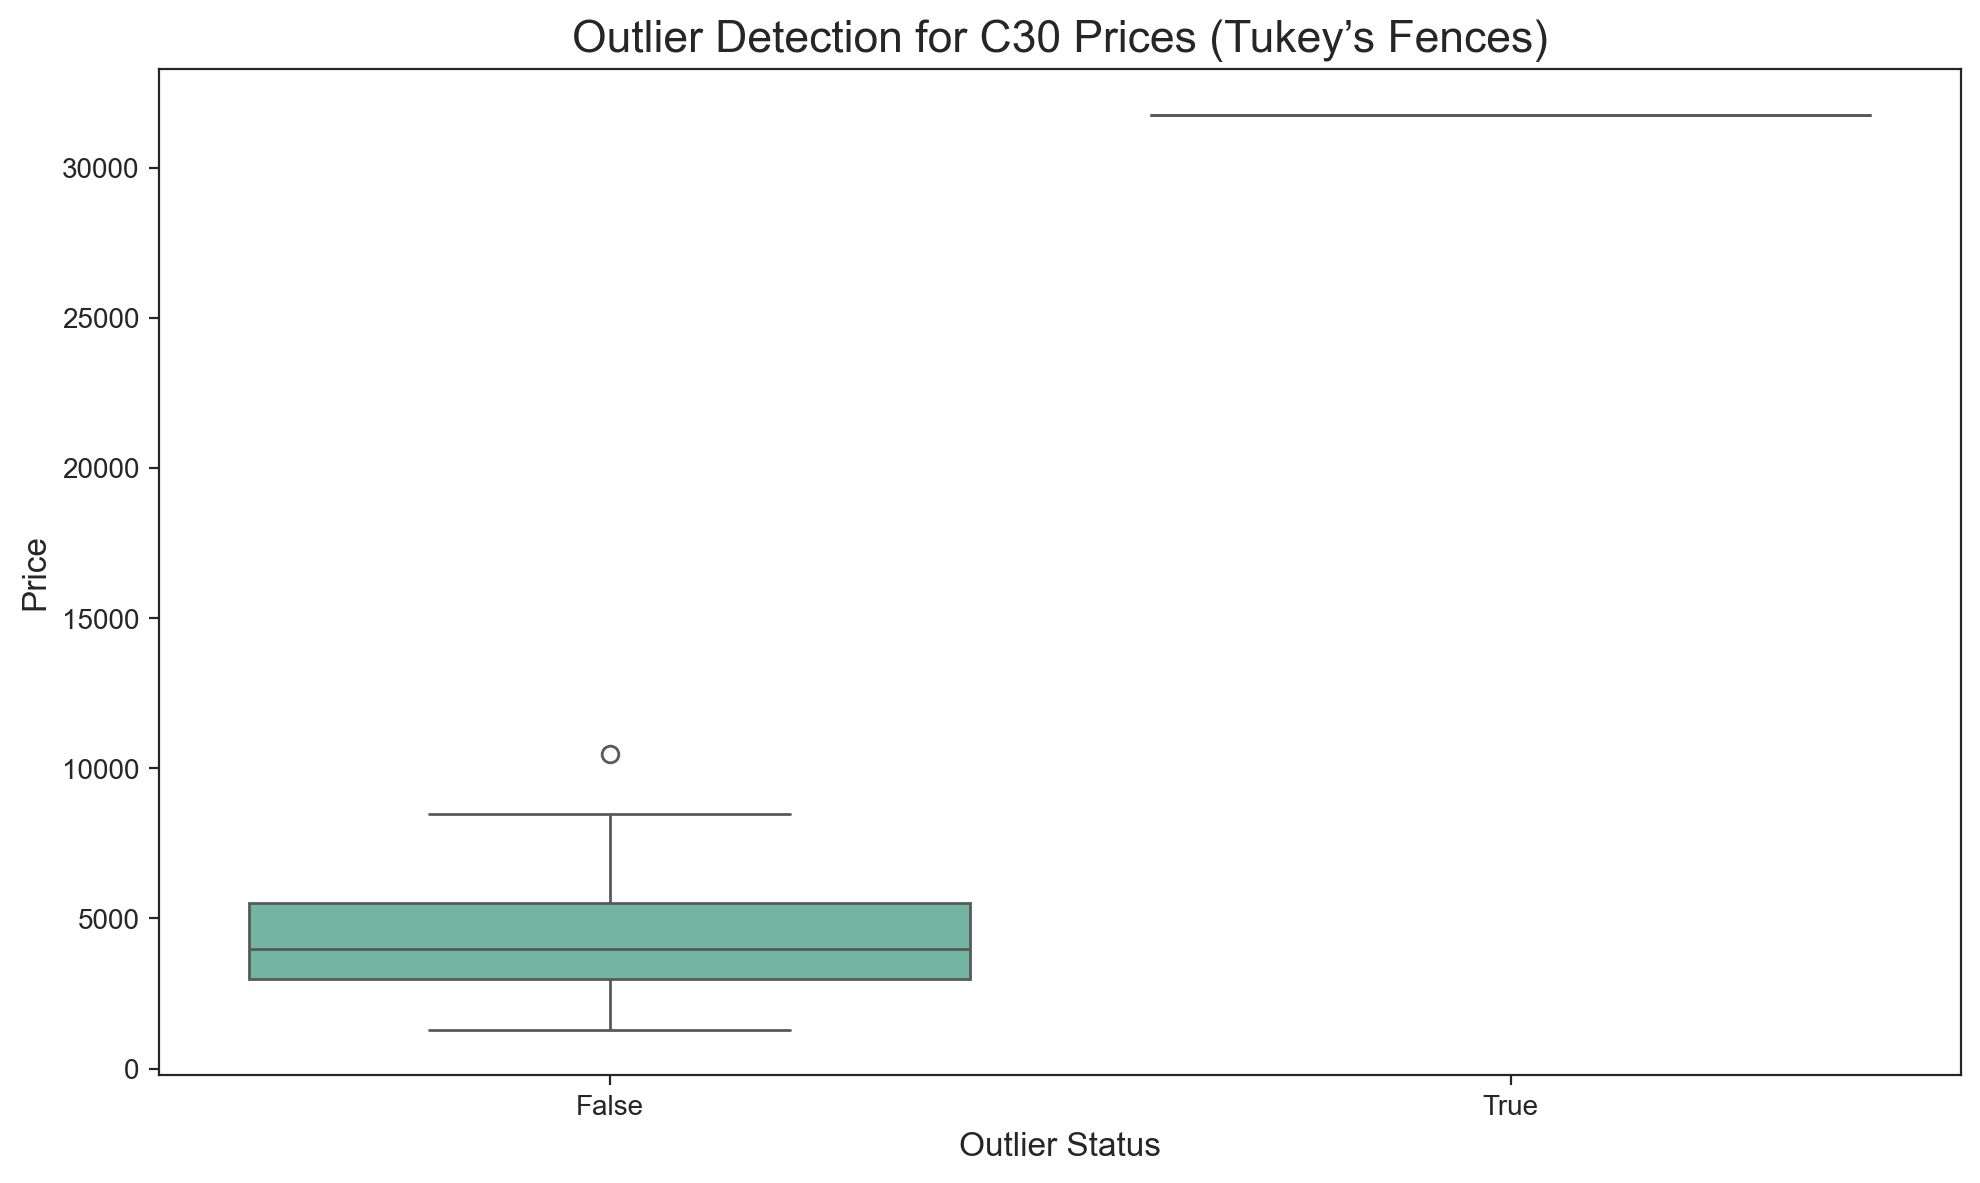

Outliers for Roadster:
           price  outlier
17592   46995.0     True
100562  43950.0     True
135348  85490.0     True
136510  49995.0     True
140398  51995.0     True
146653  49995.0     True
227233  75000.0     True
251380  48750.0     True
257181  49999.0     True


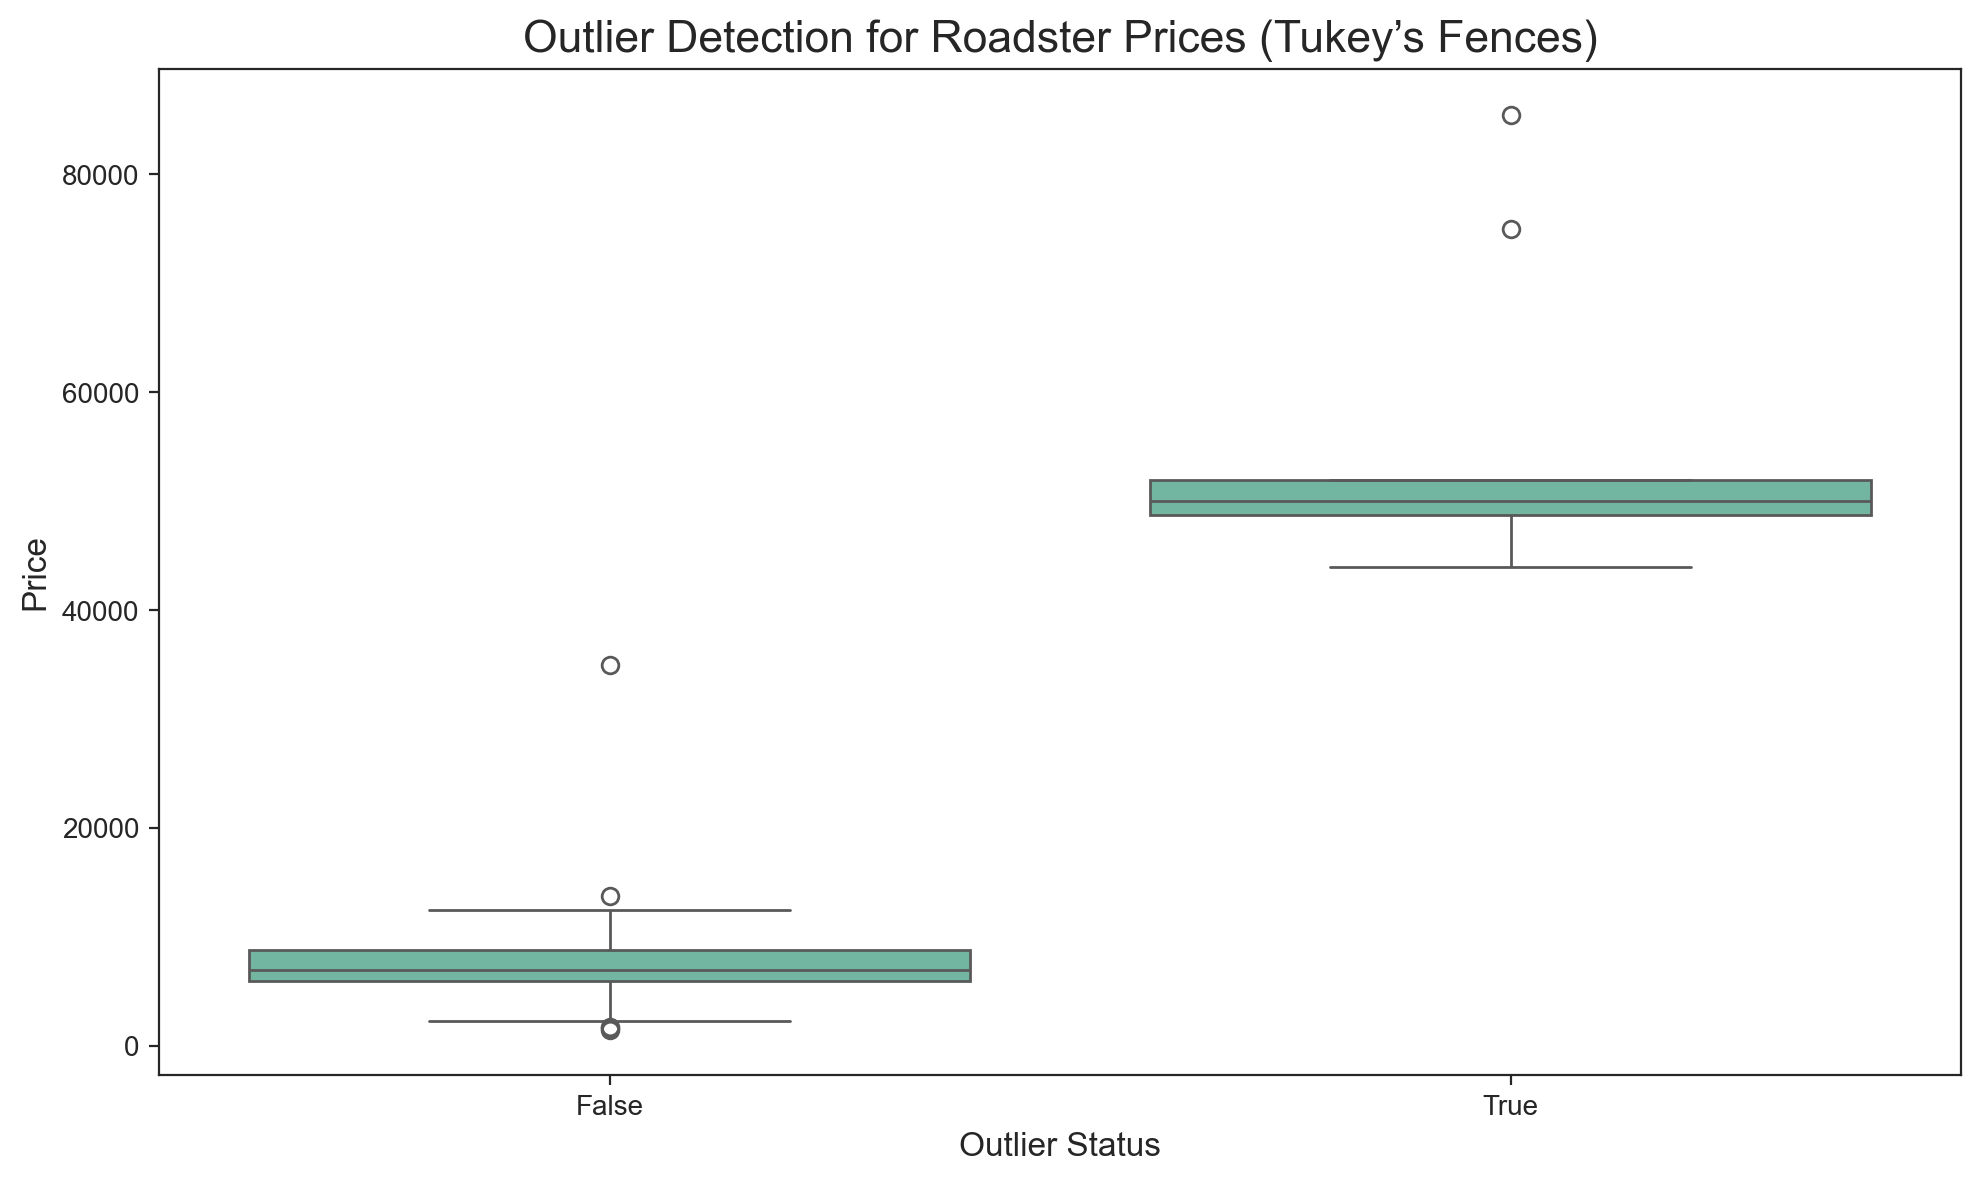

Outliers for Series II:
            price  outlier
260103  395000.0     True


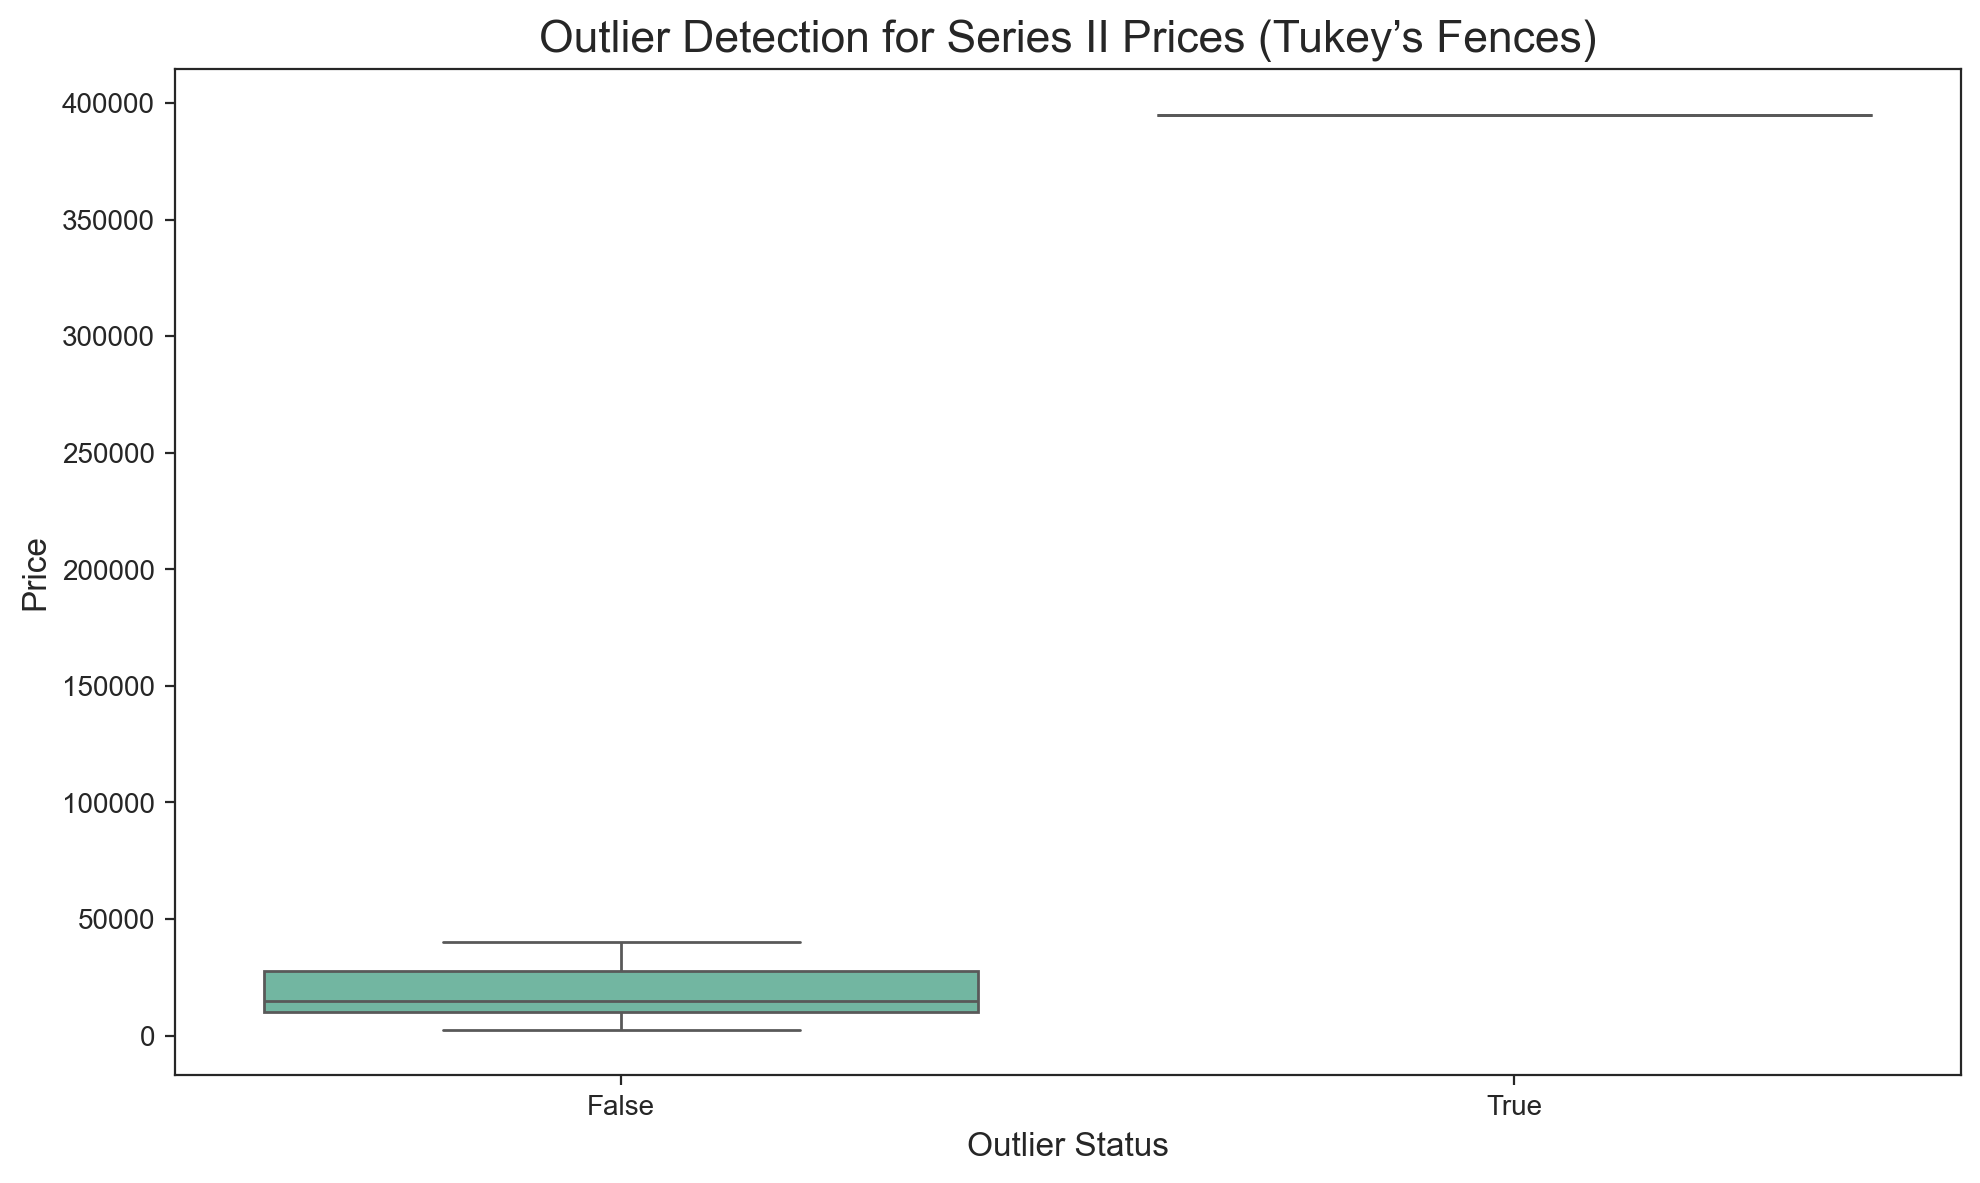

Outliers for Supra:
         price  outlier
46275  5750.0     True


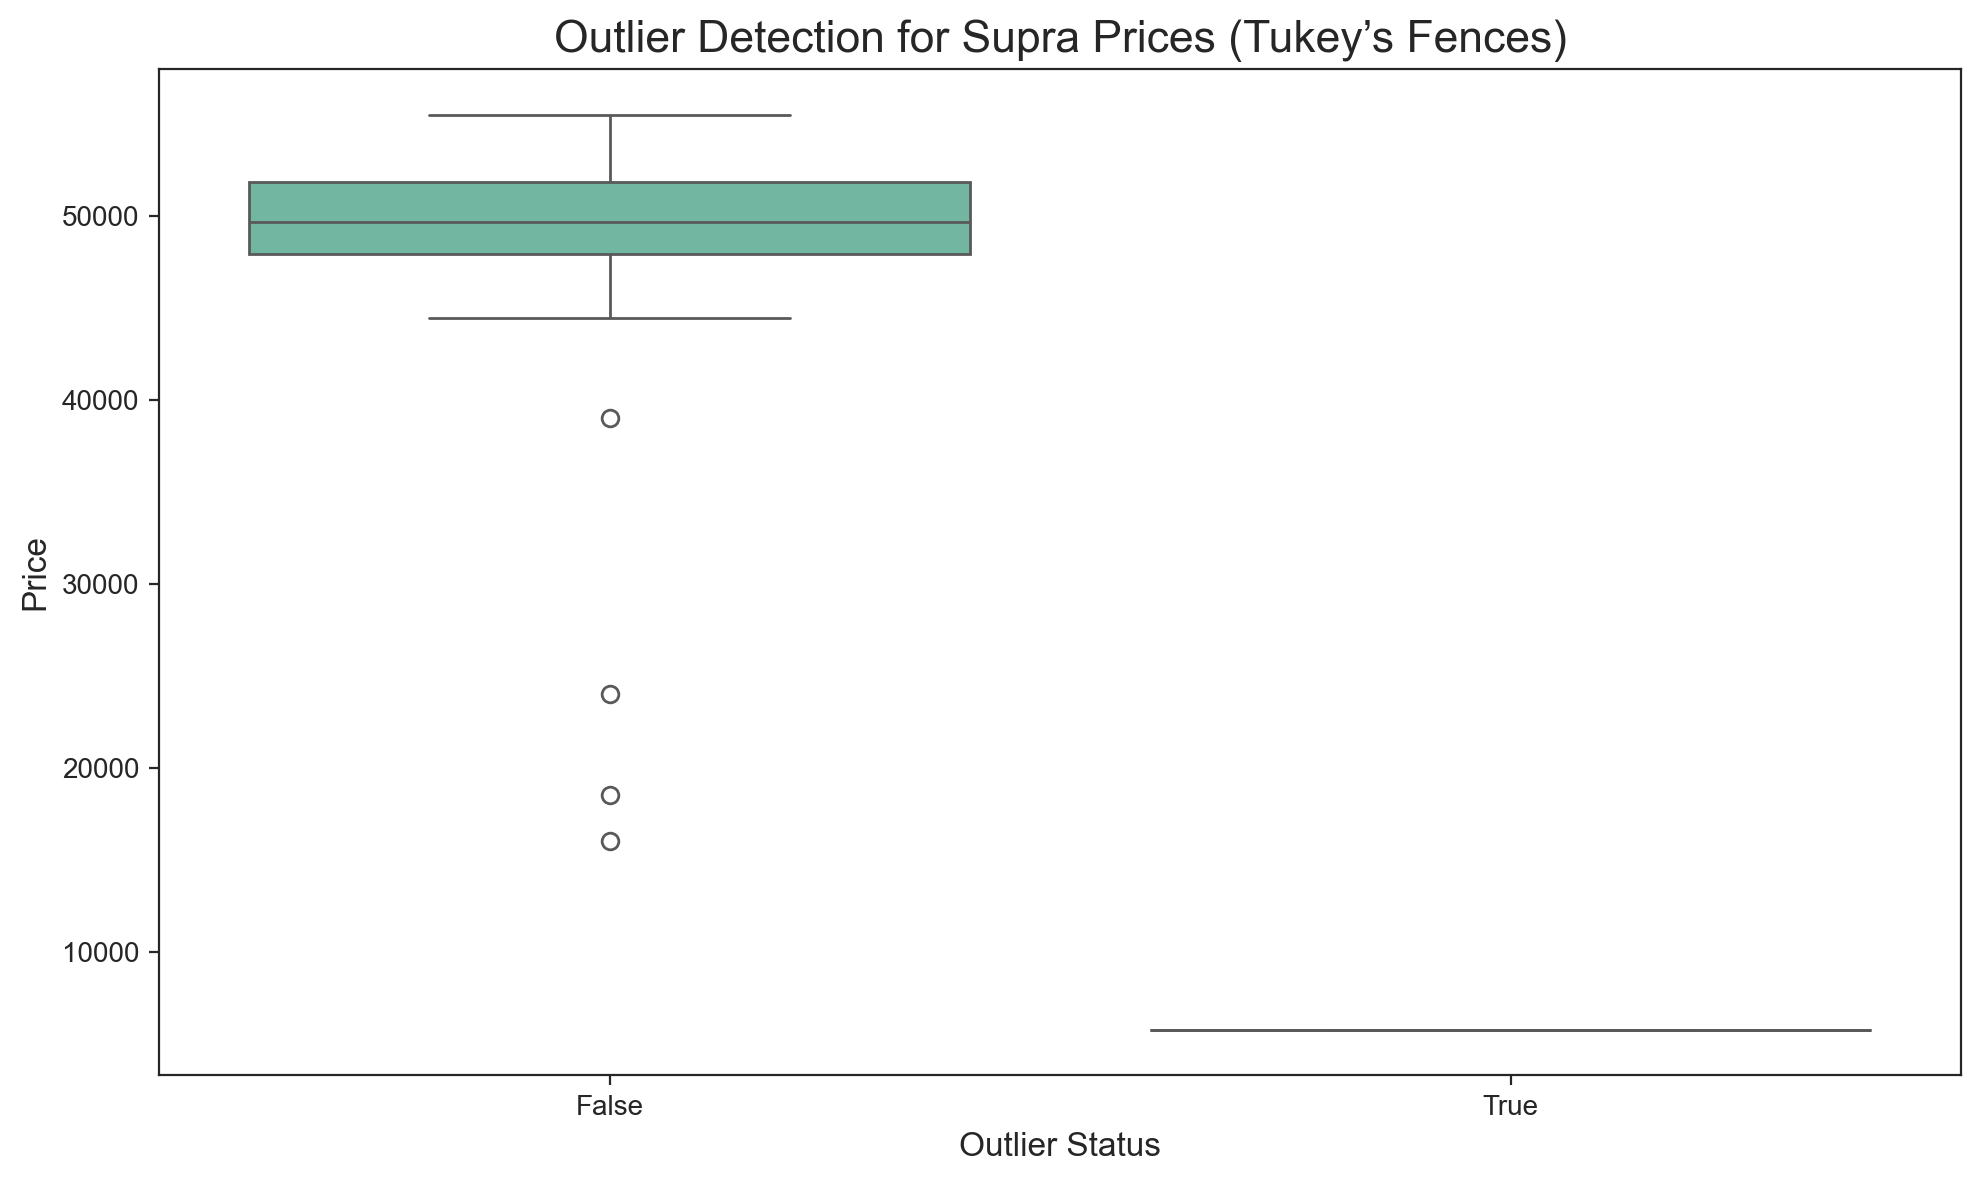

Outliers for Vanquish:
            price  outlier
297974  699995.0     True


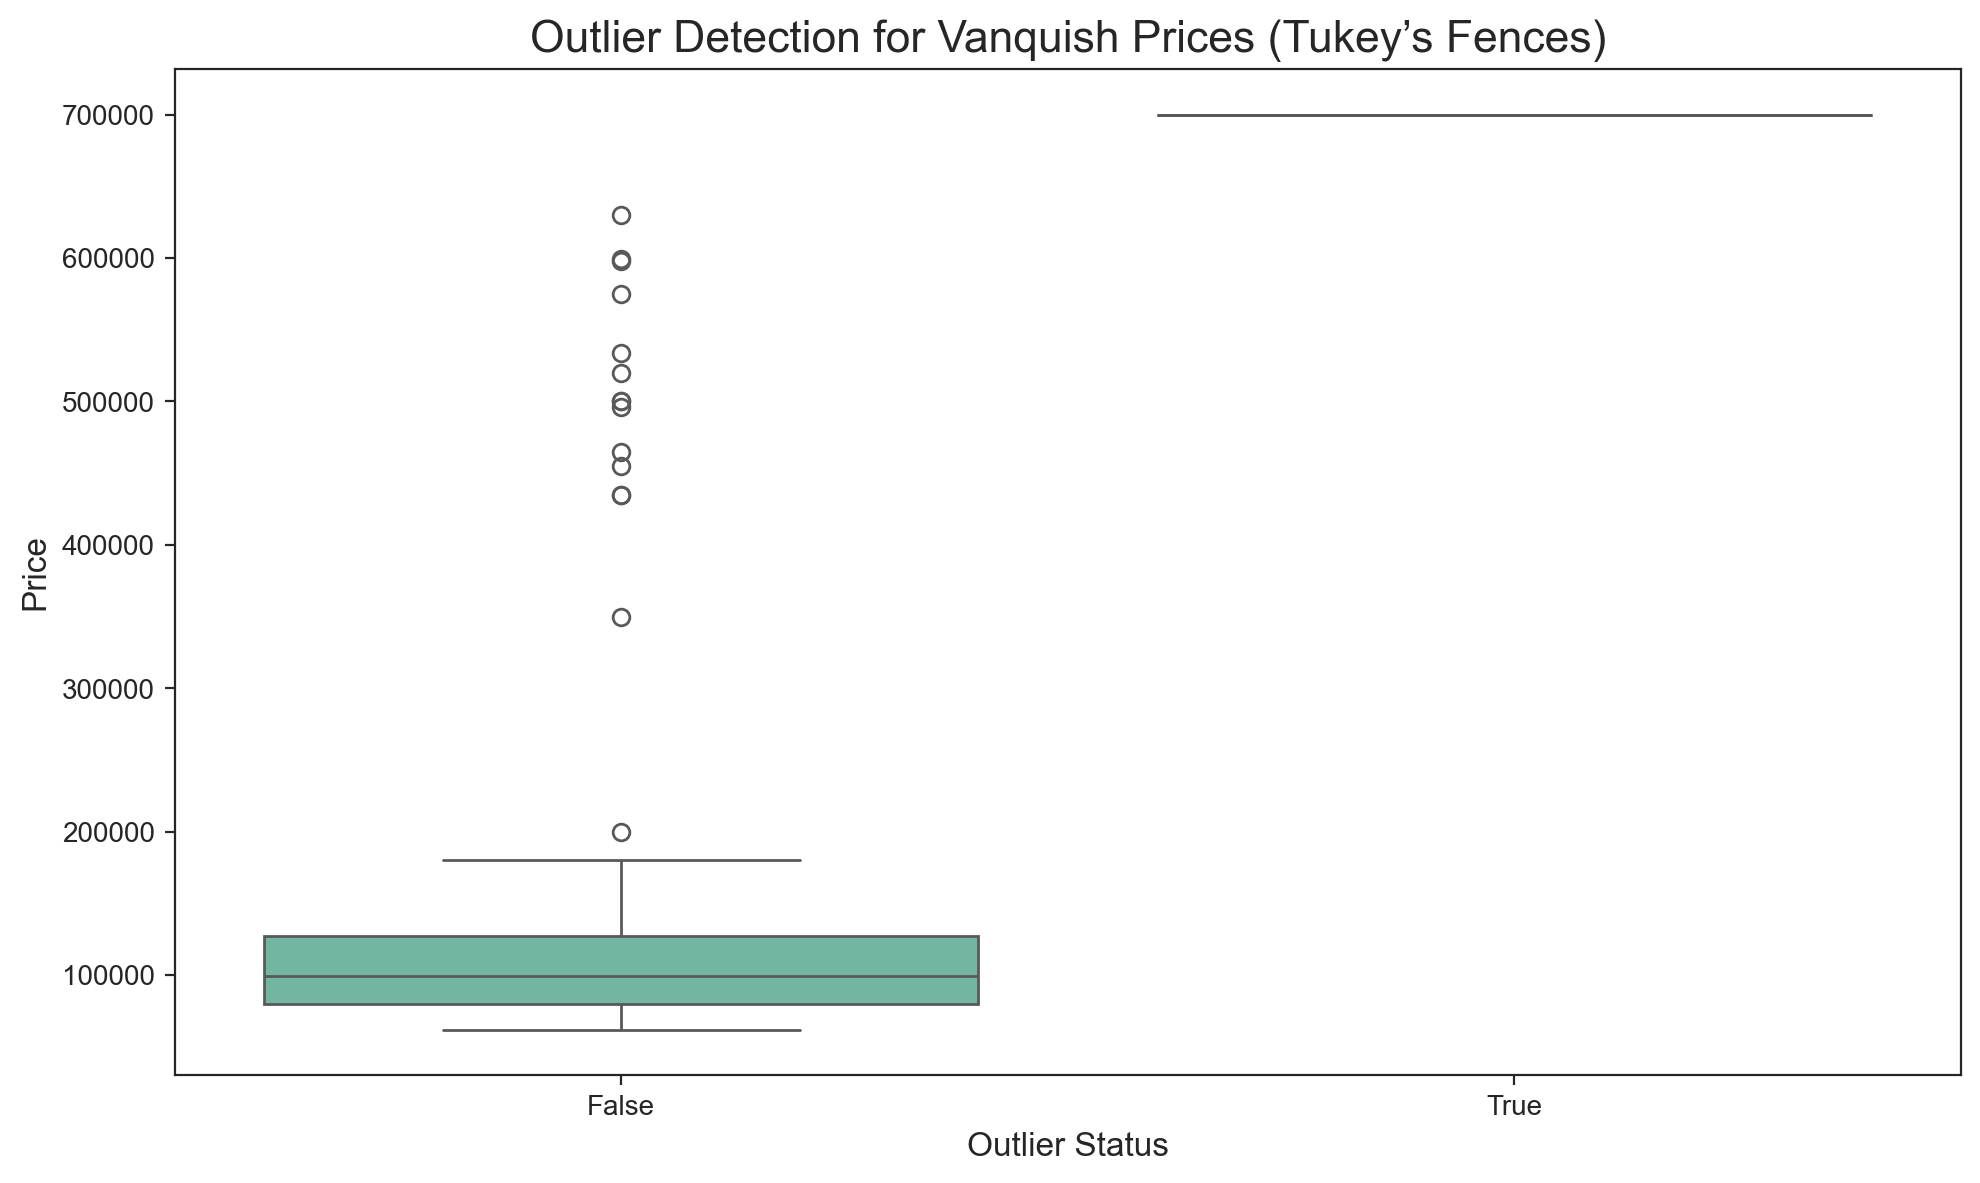

Outliers for 190:
            price  outlier
347984  124950.0     True


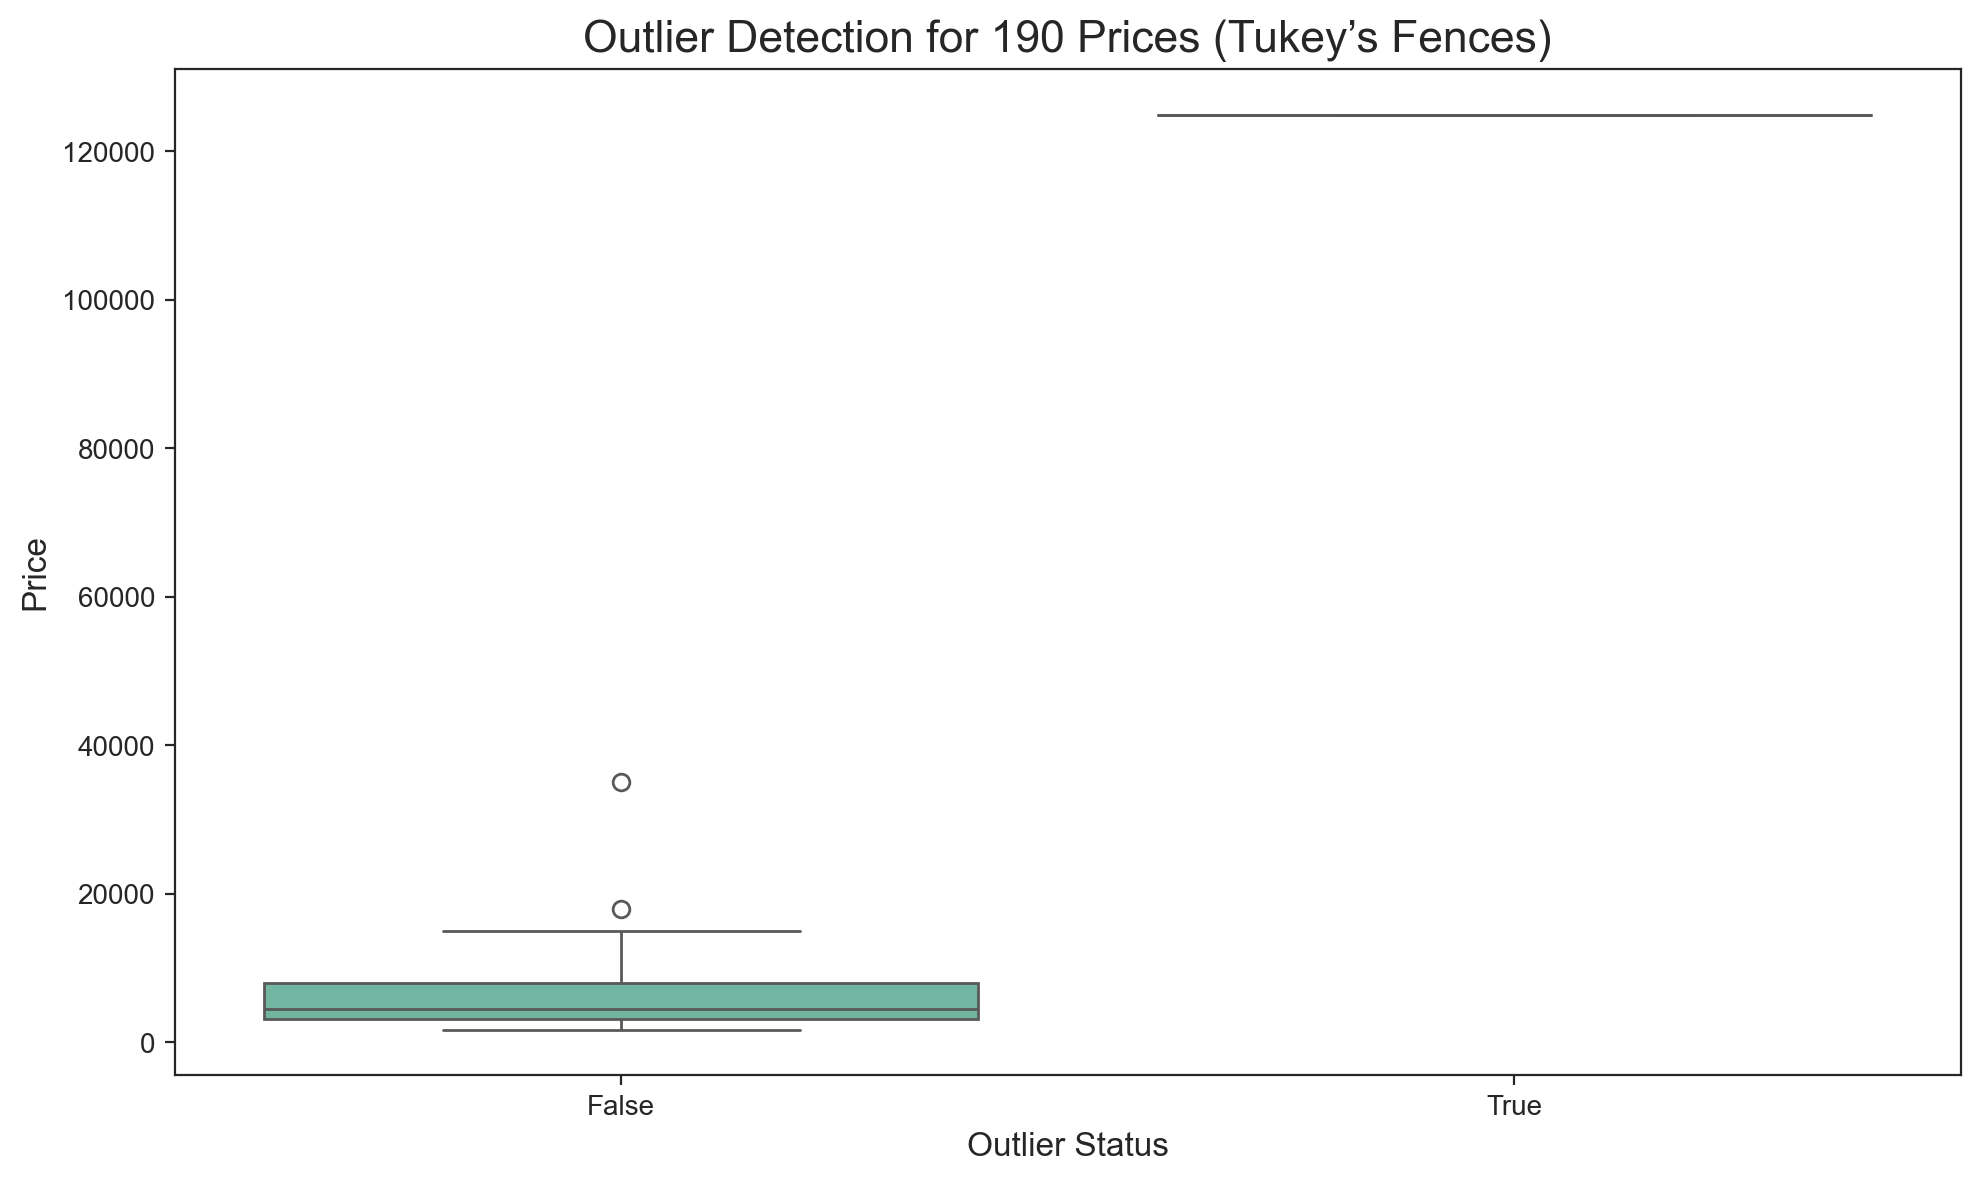

Outliers for MGB:
            price  outlier
290925  500000.0     True


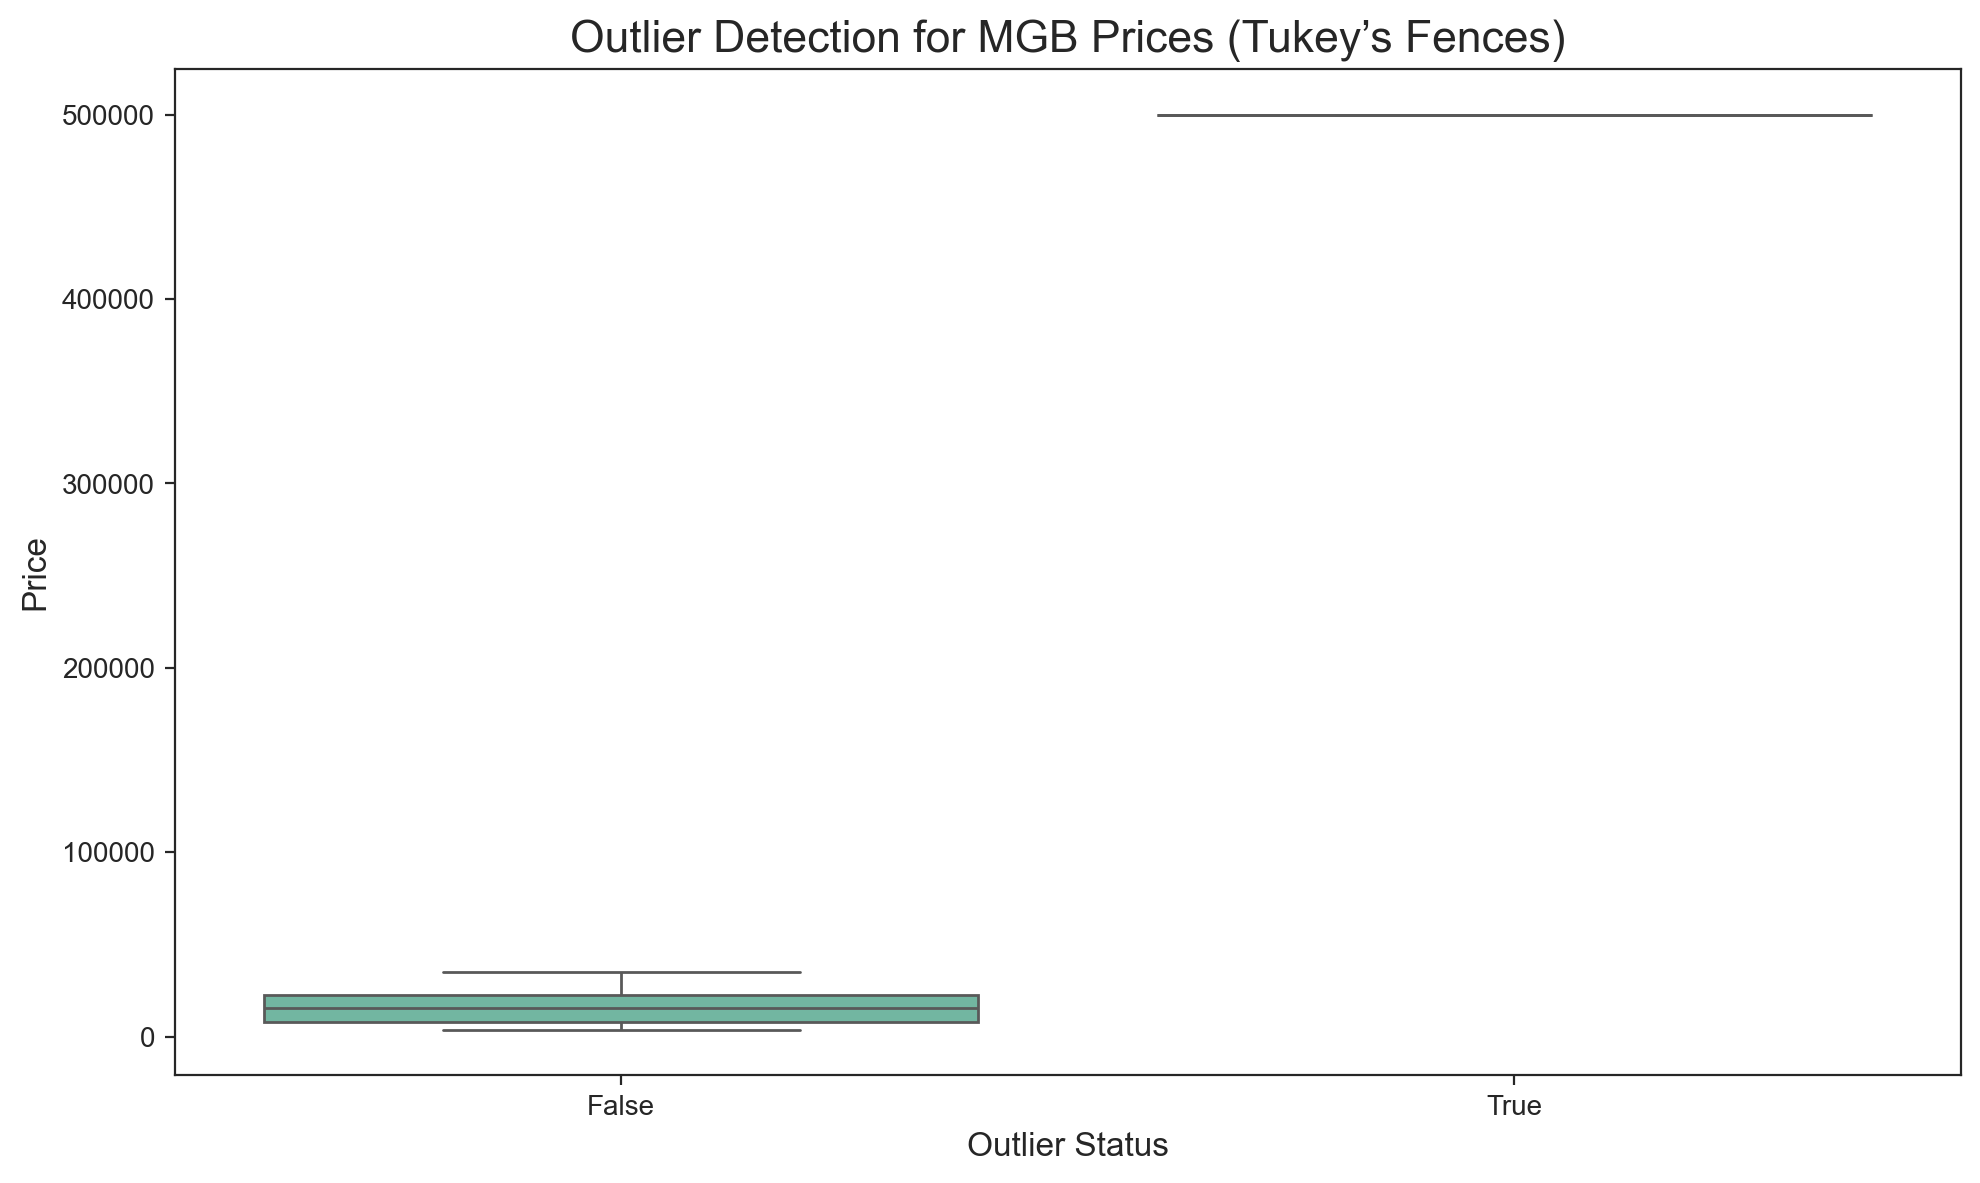

Outliers for Silver Spirit:
           price  outlier
336258  99999.0     True


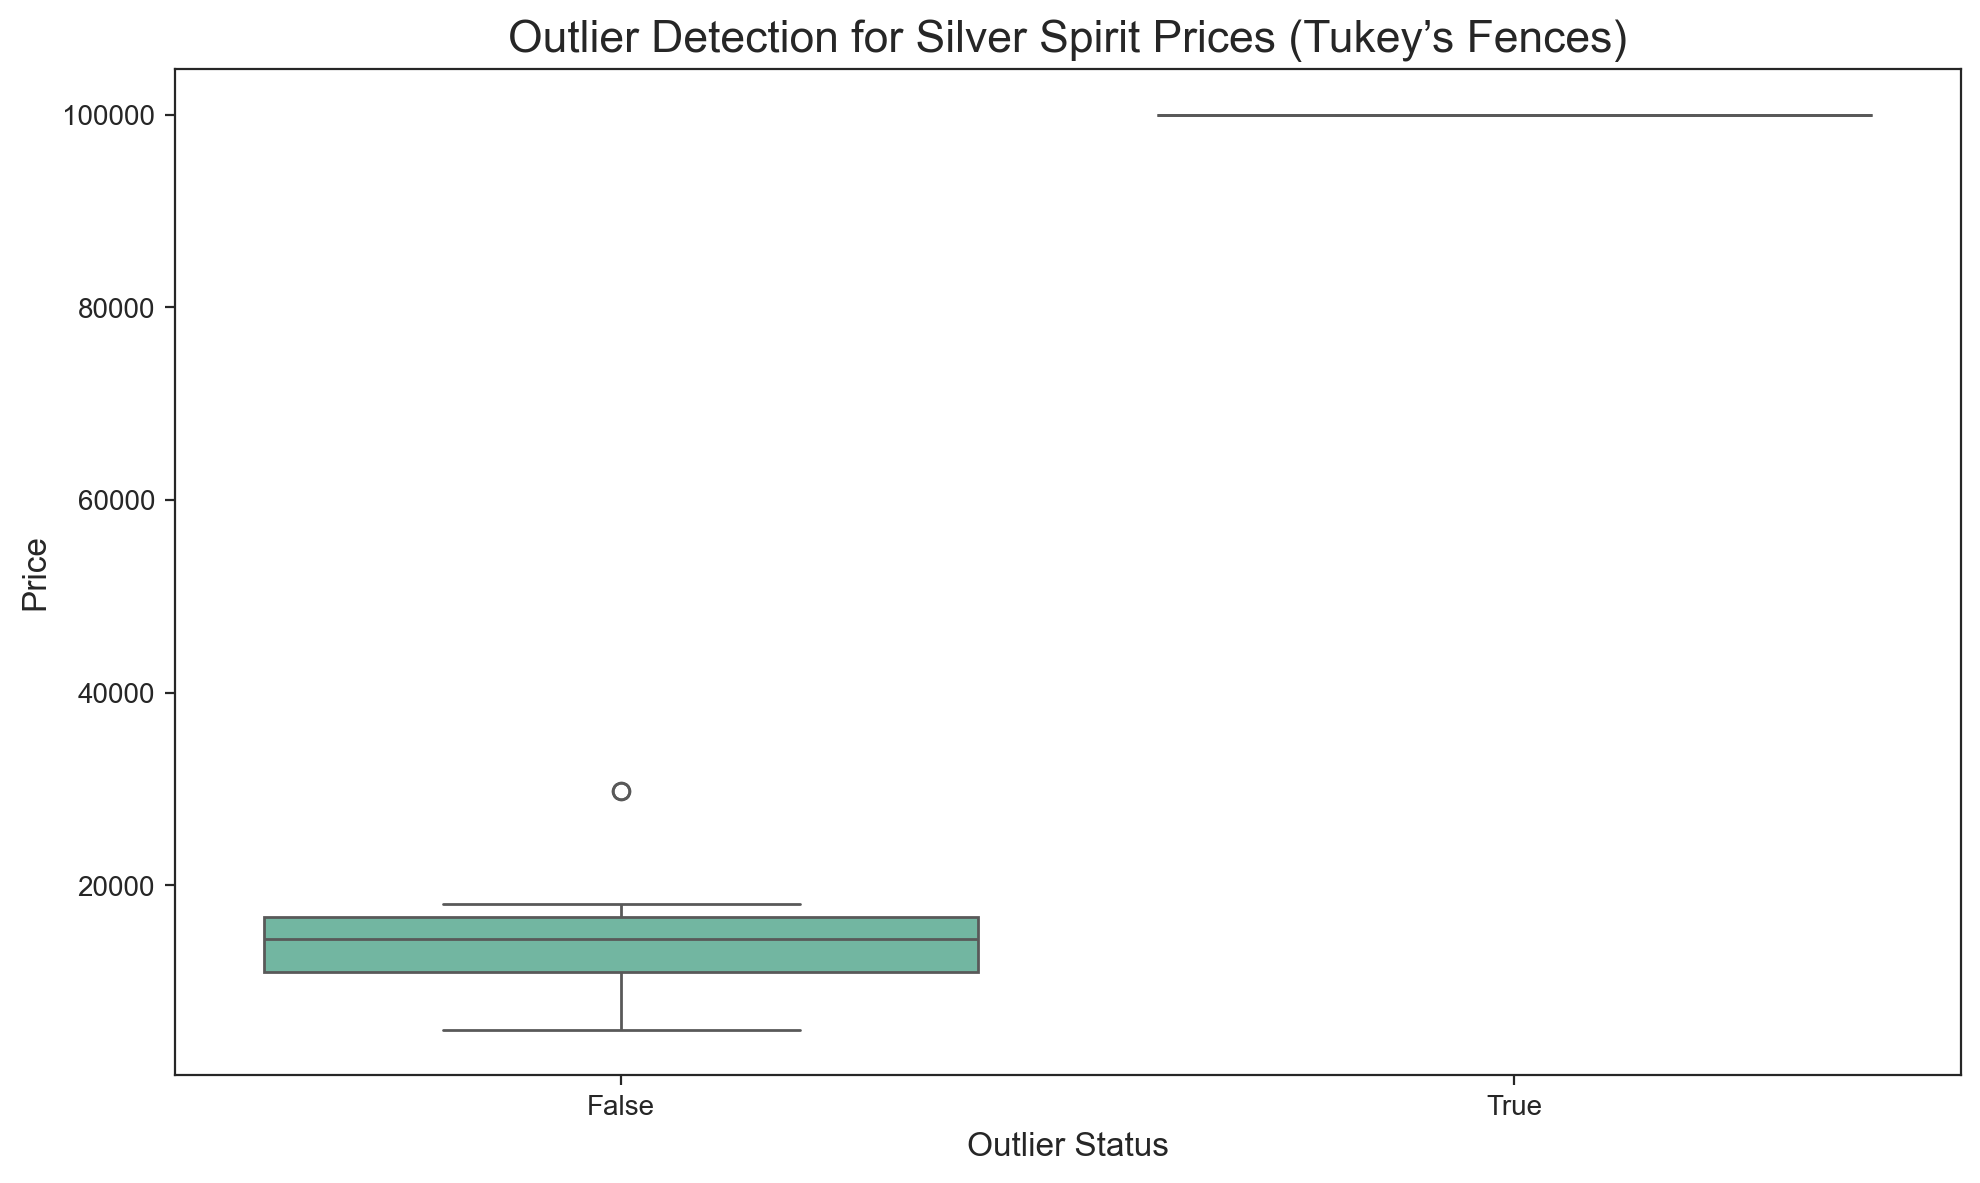

Outliers for Alpina D3:
           price  outlier
214272  28995.0     True


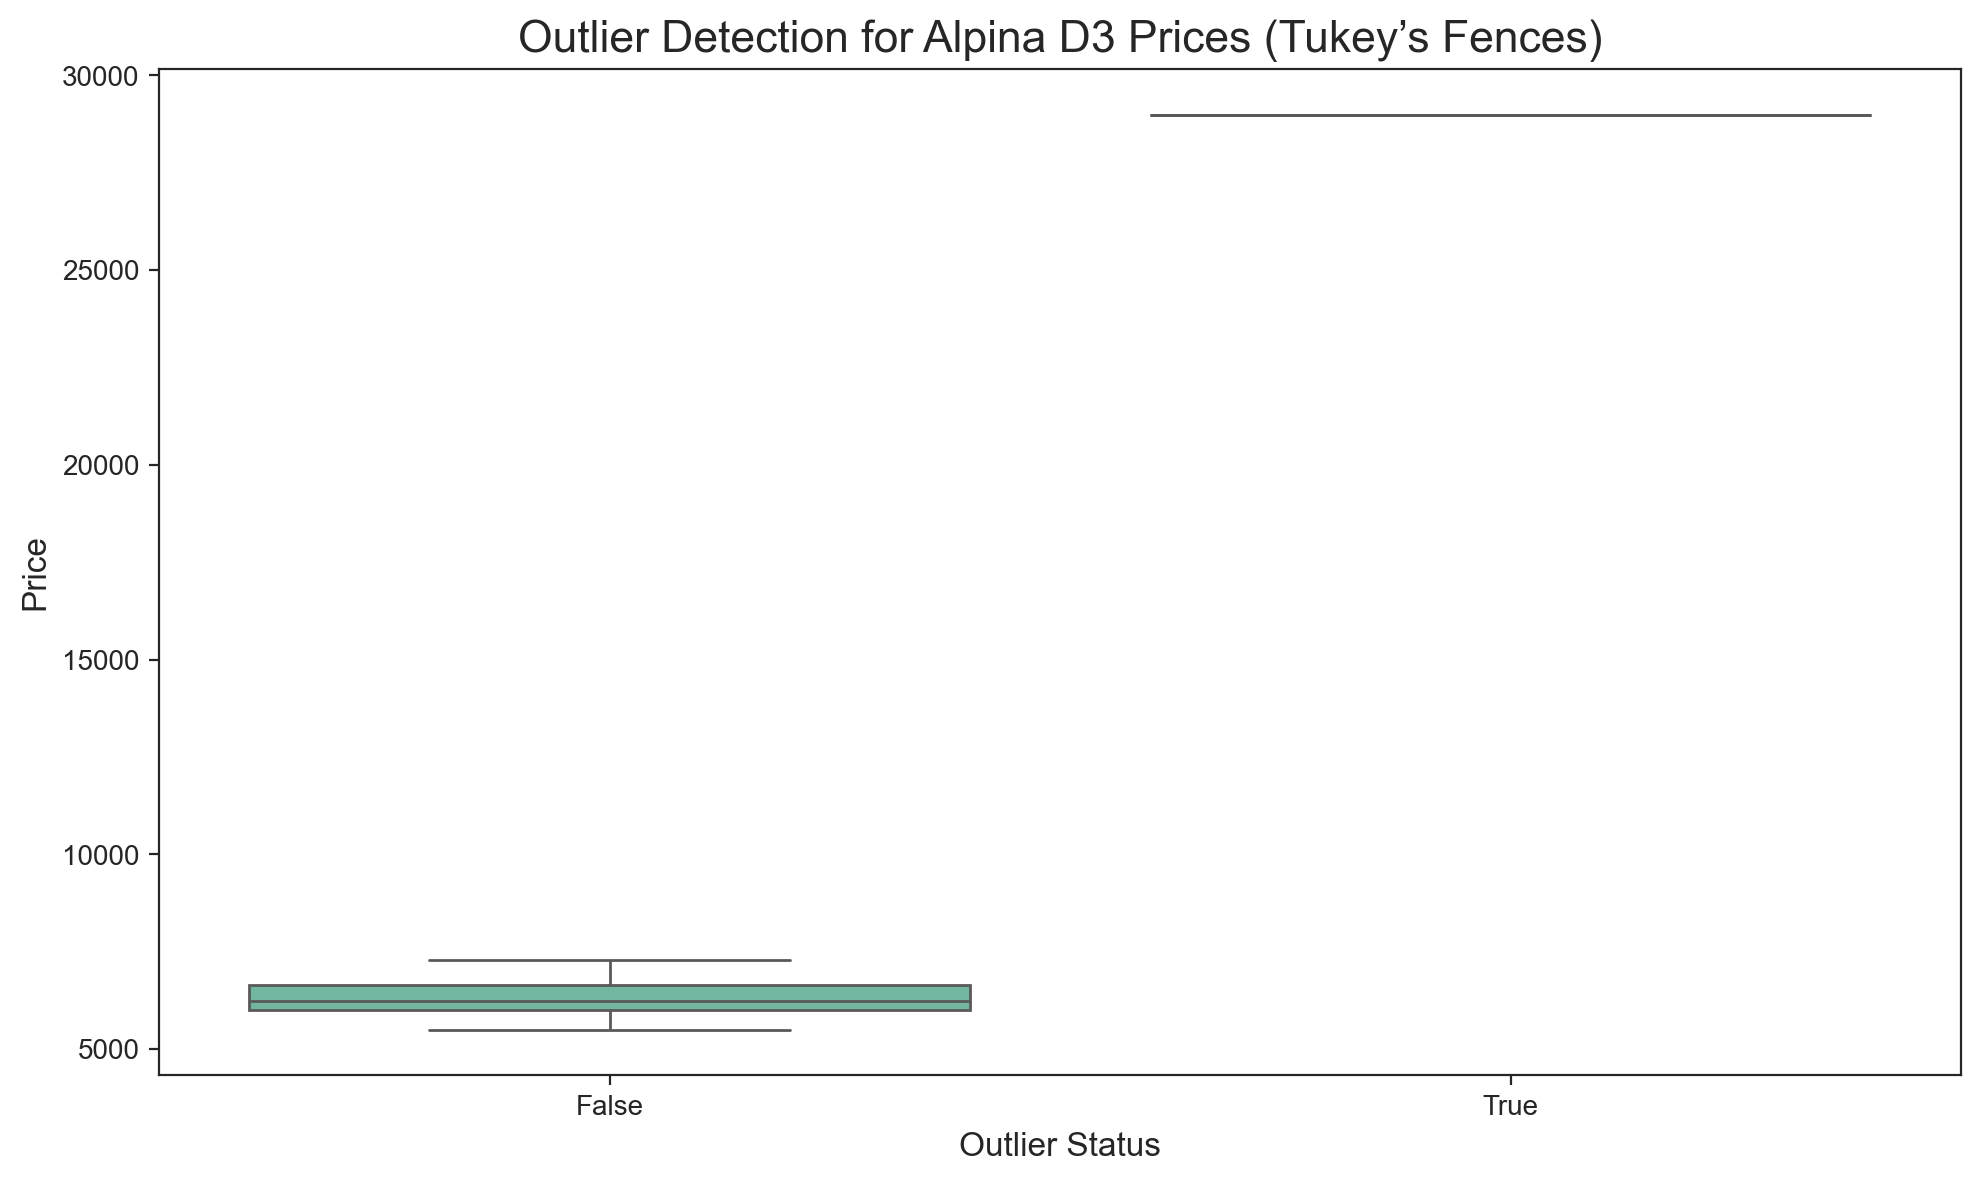

Outliers for TXII:
           price  outlier
178086  26995.0     True


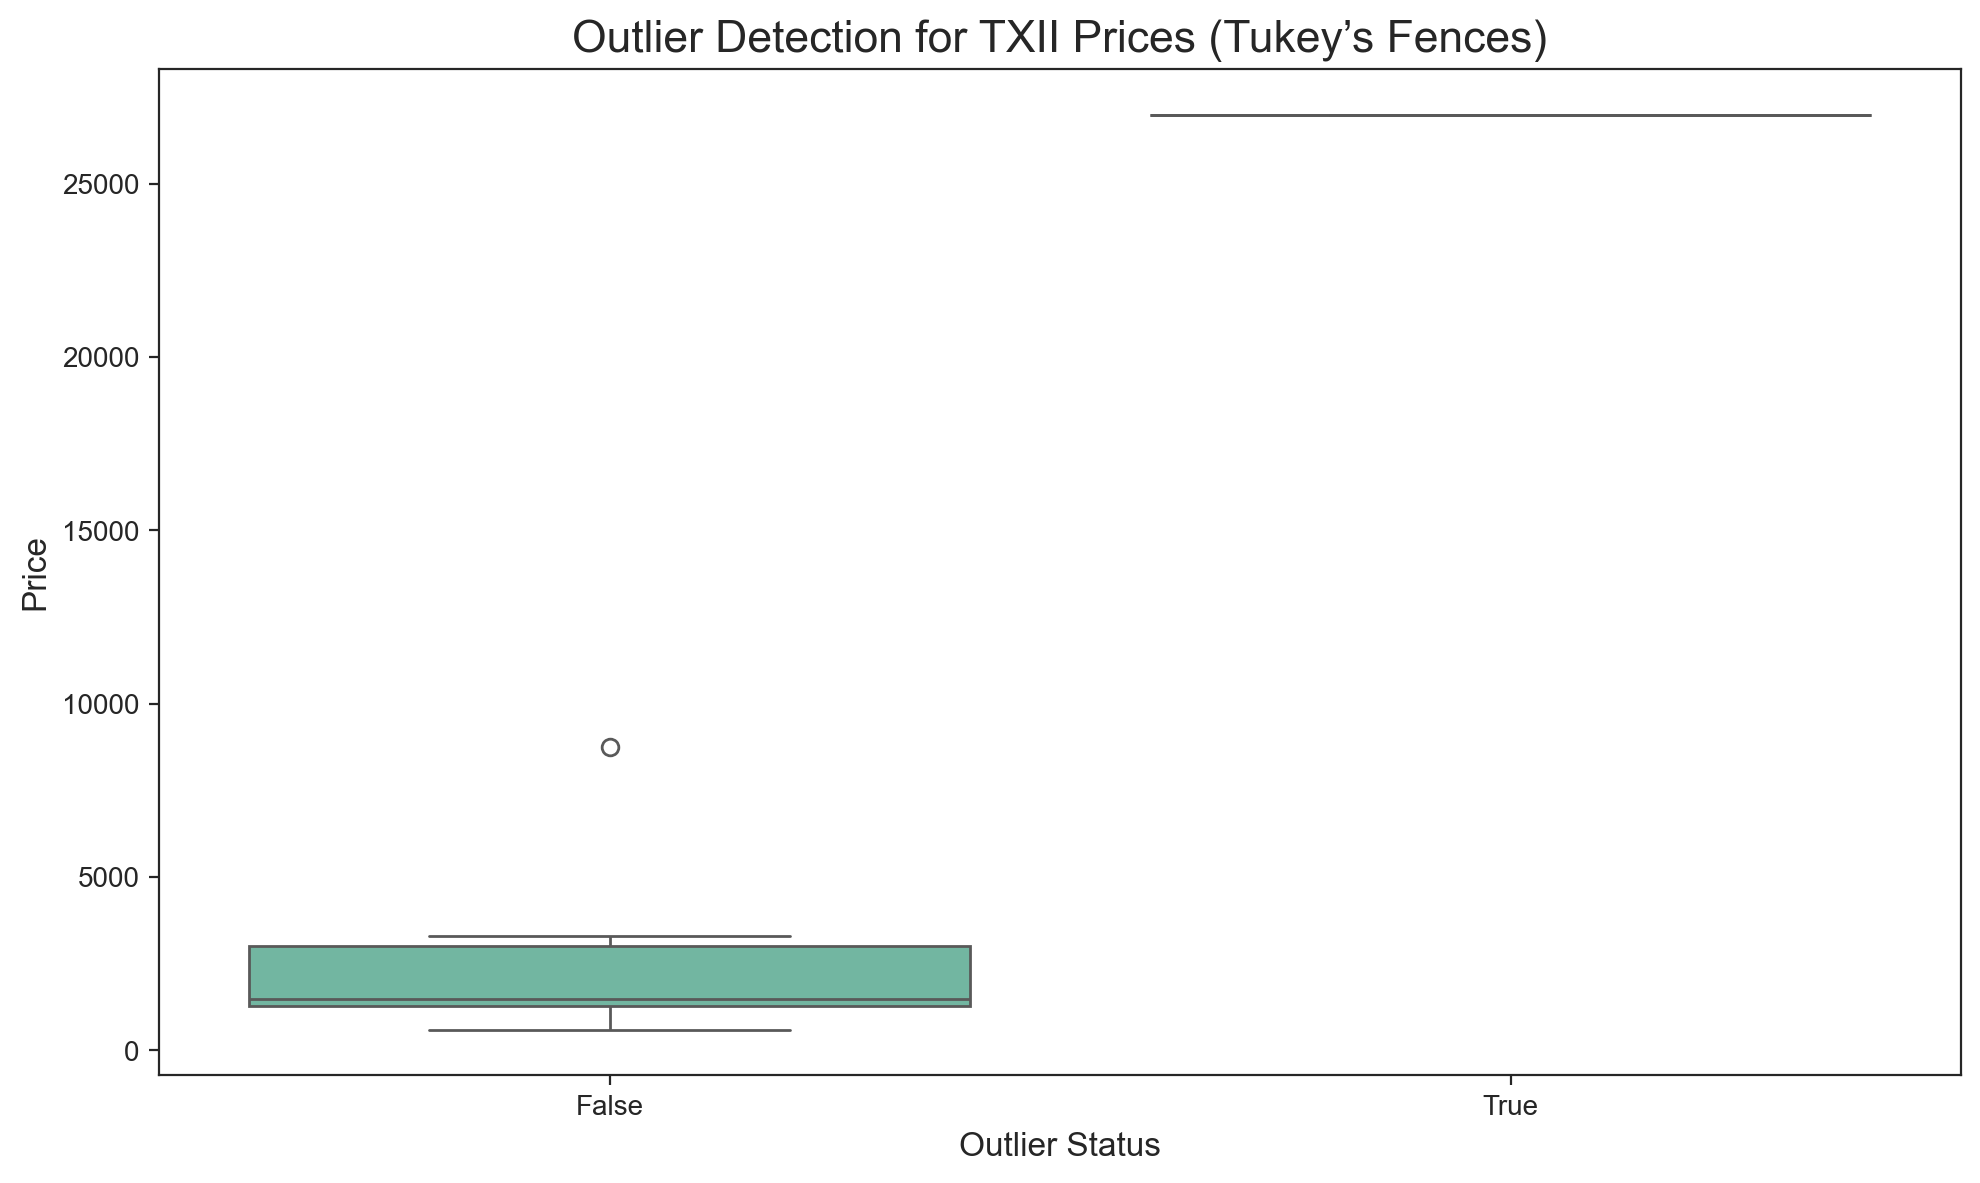

Outliers for LaFerrari:
             price  outlier
198060  3799995.0     True


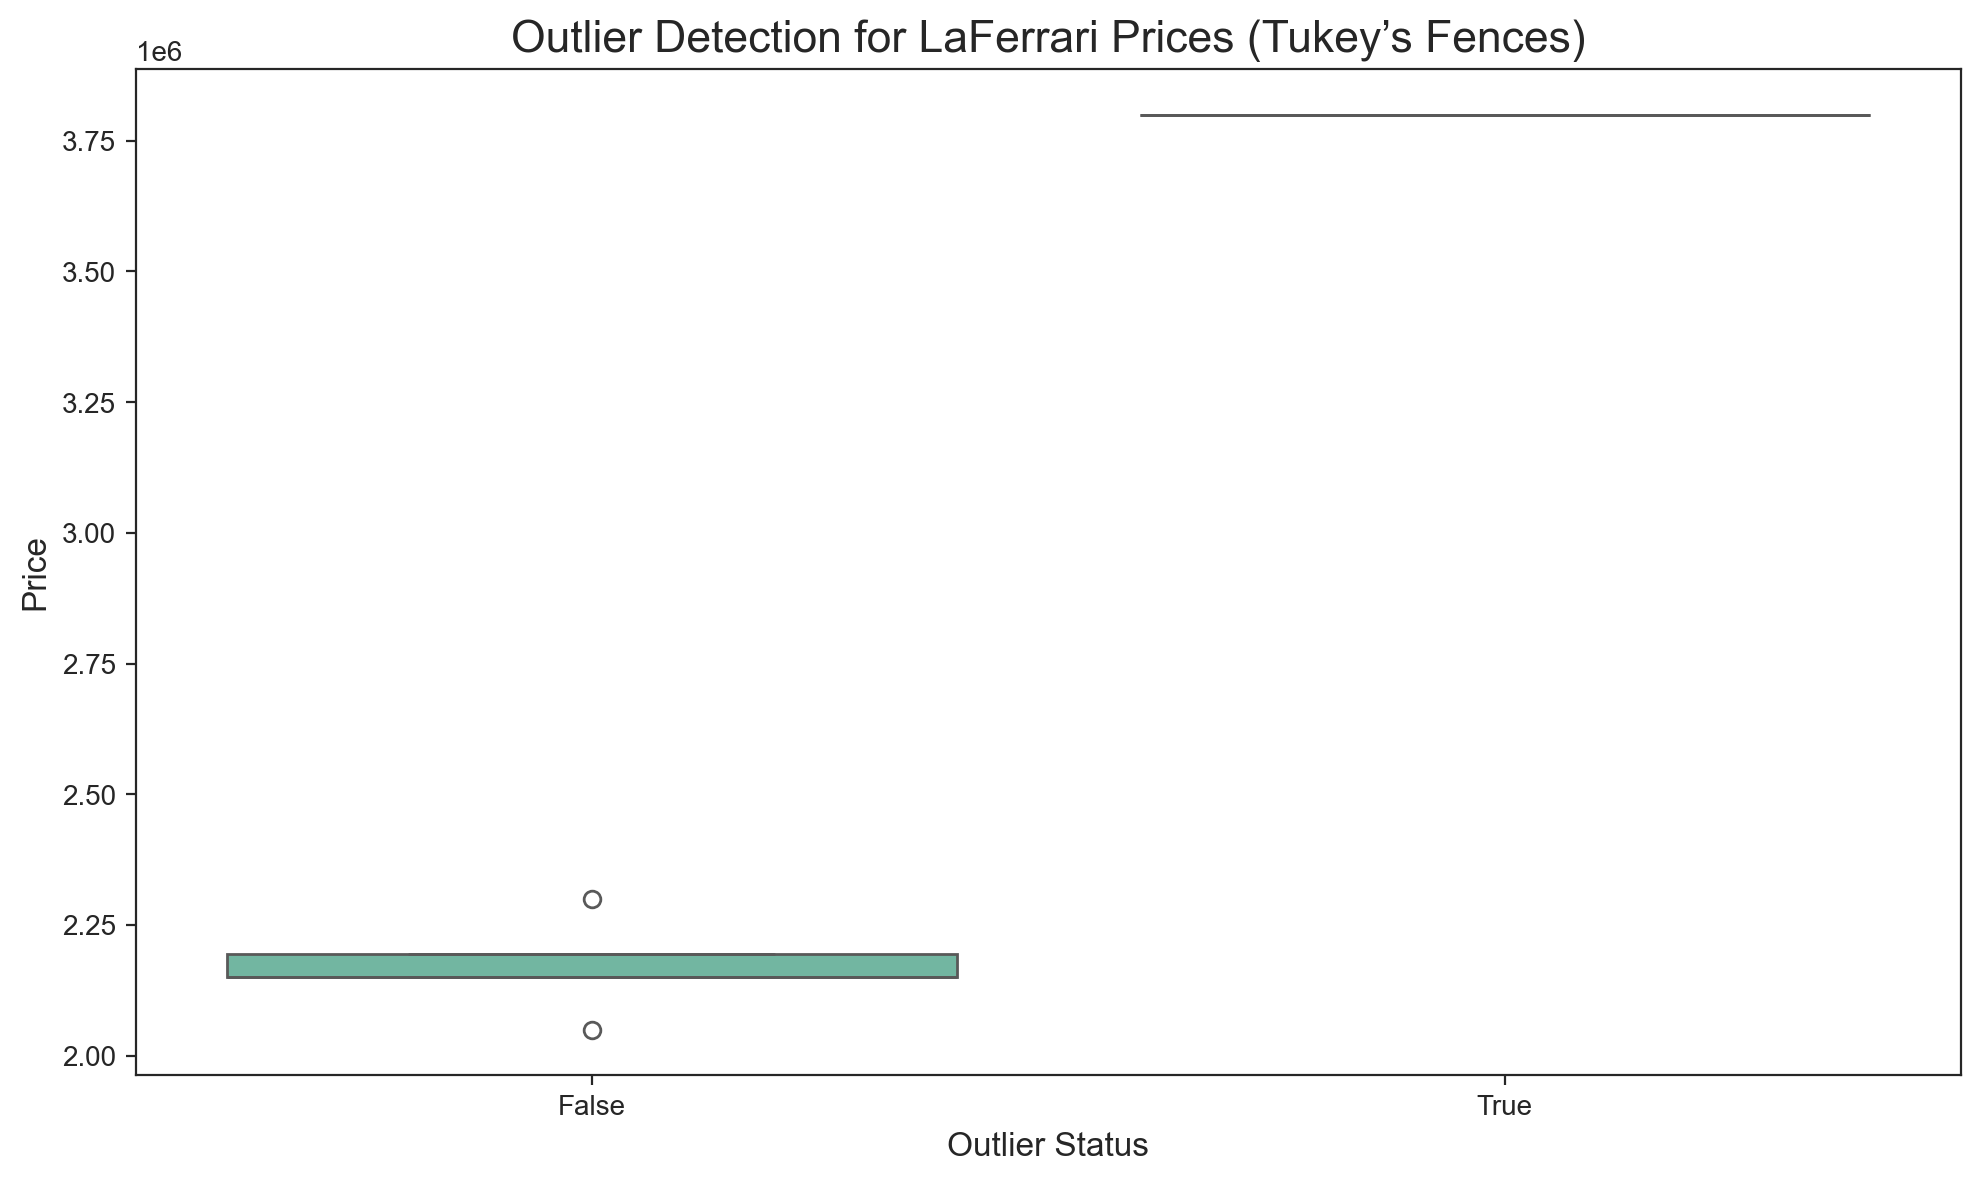

Outliers for IS F:
           price  outlier
267755  13995.0     True


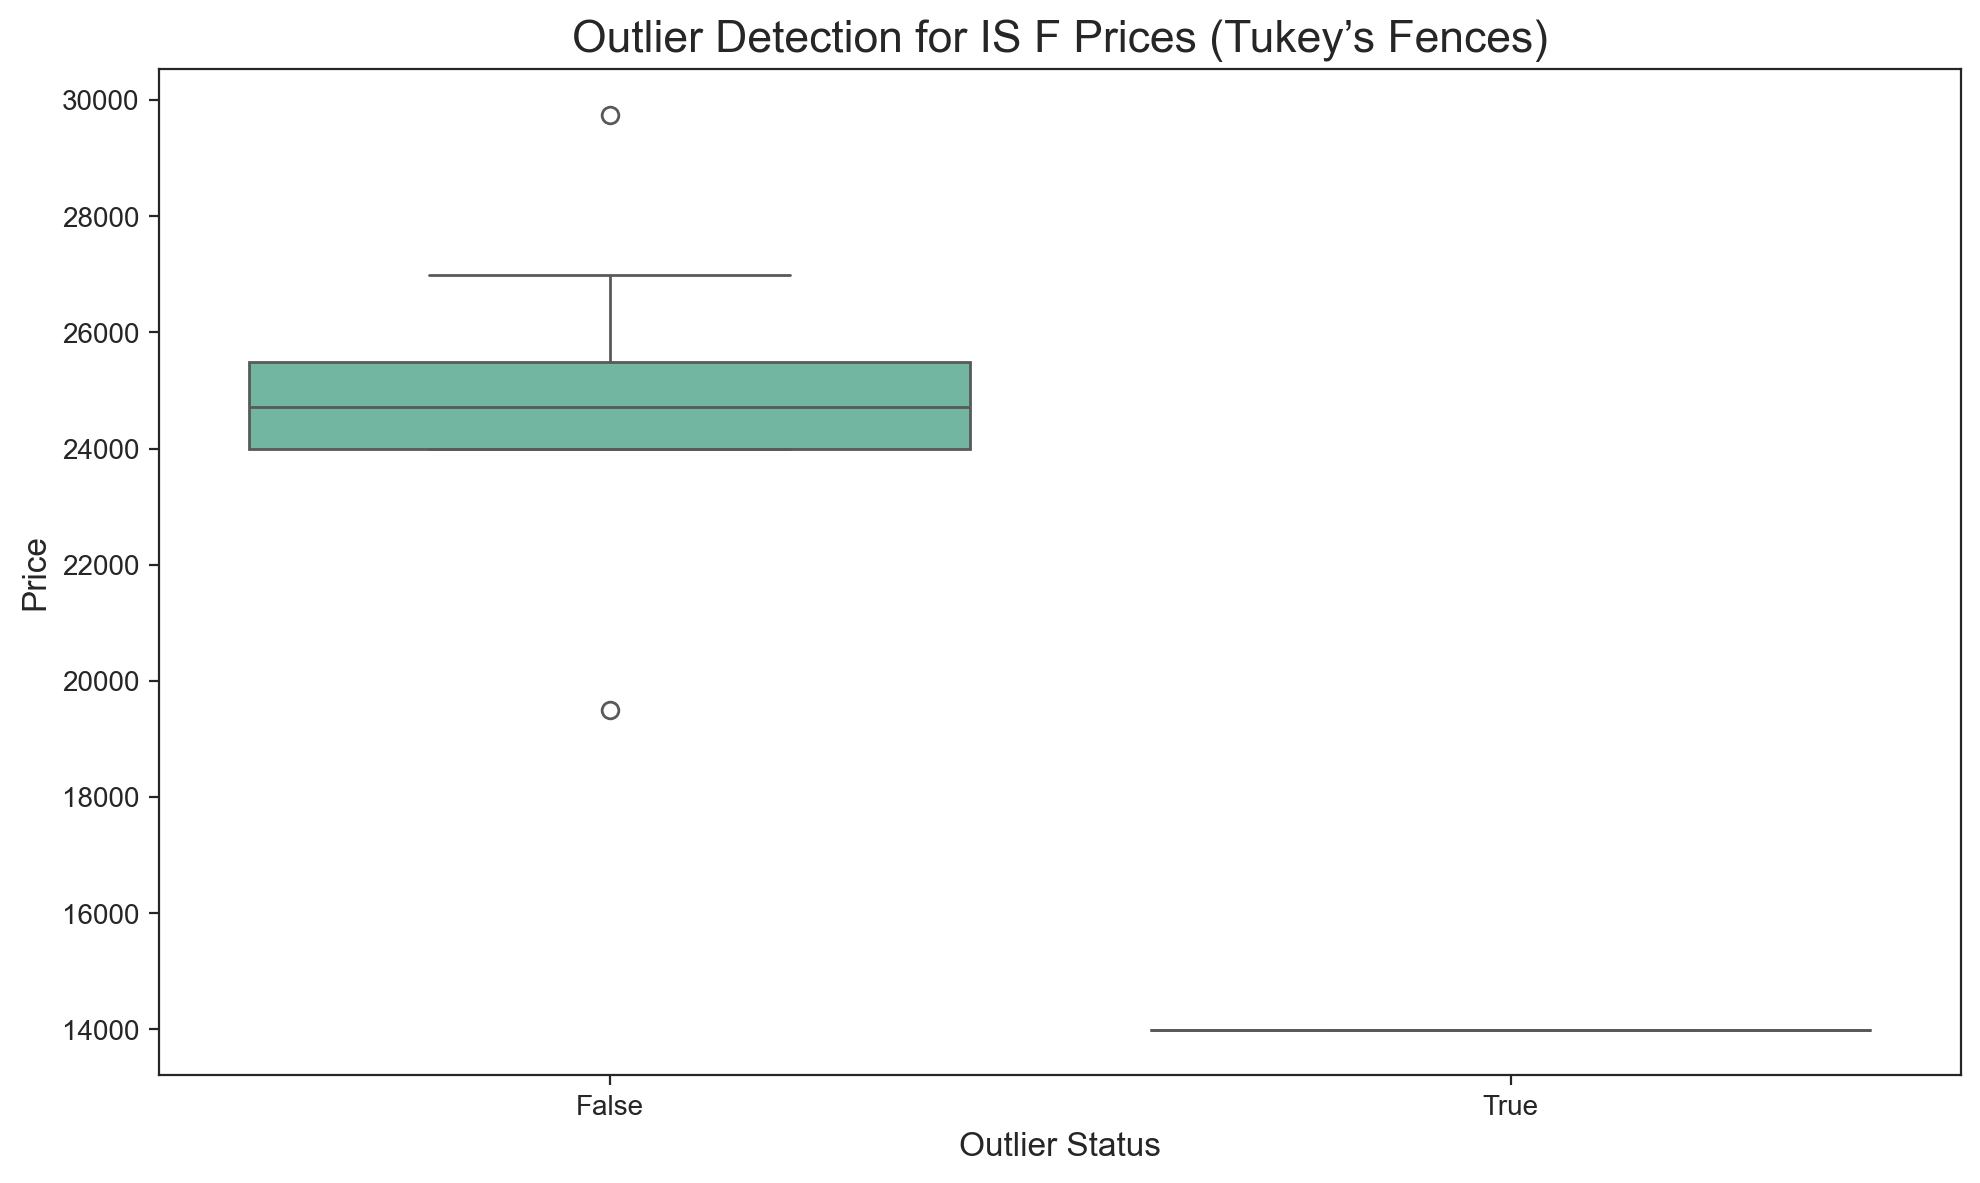

Replaced 57 outliers.


In [5]:
# Find extreme outliers that are likely erroneous

from sklearn.ensemble import IsolationForest

count = 0
for model_name in auto["standard_model"].unique():
    model_data = auto.loc[auto["standard_model"] == model_name, ["price"]]

    data_cropped = model_data.dropna(subset=["price"])

    fence_dist = 10
    # Step 2: Calculate IQR and Tukey’s Fences
    Q1 = data_cropped["price"].quantile(0.25)
    Q3 = data_cropped["price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - fence_dist * IQR
    upper_fence = Q3 + fence_dist * IQR
    data_cropped["outlier"] = (data_cropped["price"] < lower_fence) | (data_cropped["price"] > upper_fence)


    # Print outliers
    outliers = data_cropped.loc[data_cropped["outlier"]]
    

    if len(outliers) > 0:
        count += len(auto.loc[outliers.index, "price"])
        # Replace outlier values
        auto.loc[outliers.index, "price"] = np.nan

        print(f"Outliers for {model_name}:\n", outliers)

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data_cropped, x="outlier", y="price")
        plt.title(f"Outlier Detection for {model_name} Prices (Tukey’s Fences)", fontsize=16)
        plt.xlabel("Outlier Status", fontsize=12)
        plt.ylabel("Price", fontsize=12)
        plt.tight_layout()
        plt.show()
print(f"Replaced {count} outliers.")

In [6]:
# Drop rows with nan prices as without a correct matching label nothing of value can be learnt.
auto = auto.loc[auto["price"].notna()]

# Public Reference

In [7]:
# Extract listing date from reference and then drop the column
auto['year_listed'] = auto['public_reference'].astype(str).str[:4]
auto['month_listed'] = auto['public_reference'].astype(str).str[4:6]
auto['day_listed'] = auto['public_reference'].astype(str).str[6:8]

auto.drop(columns=["public_reference"], inplace=True)

# Mileage

<Axes: xlabel='mileage', ylabel='year_of_registration'>

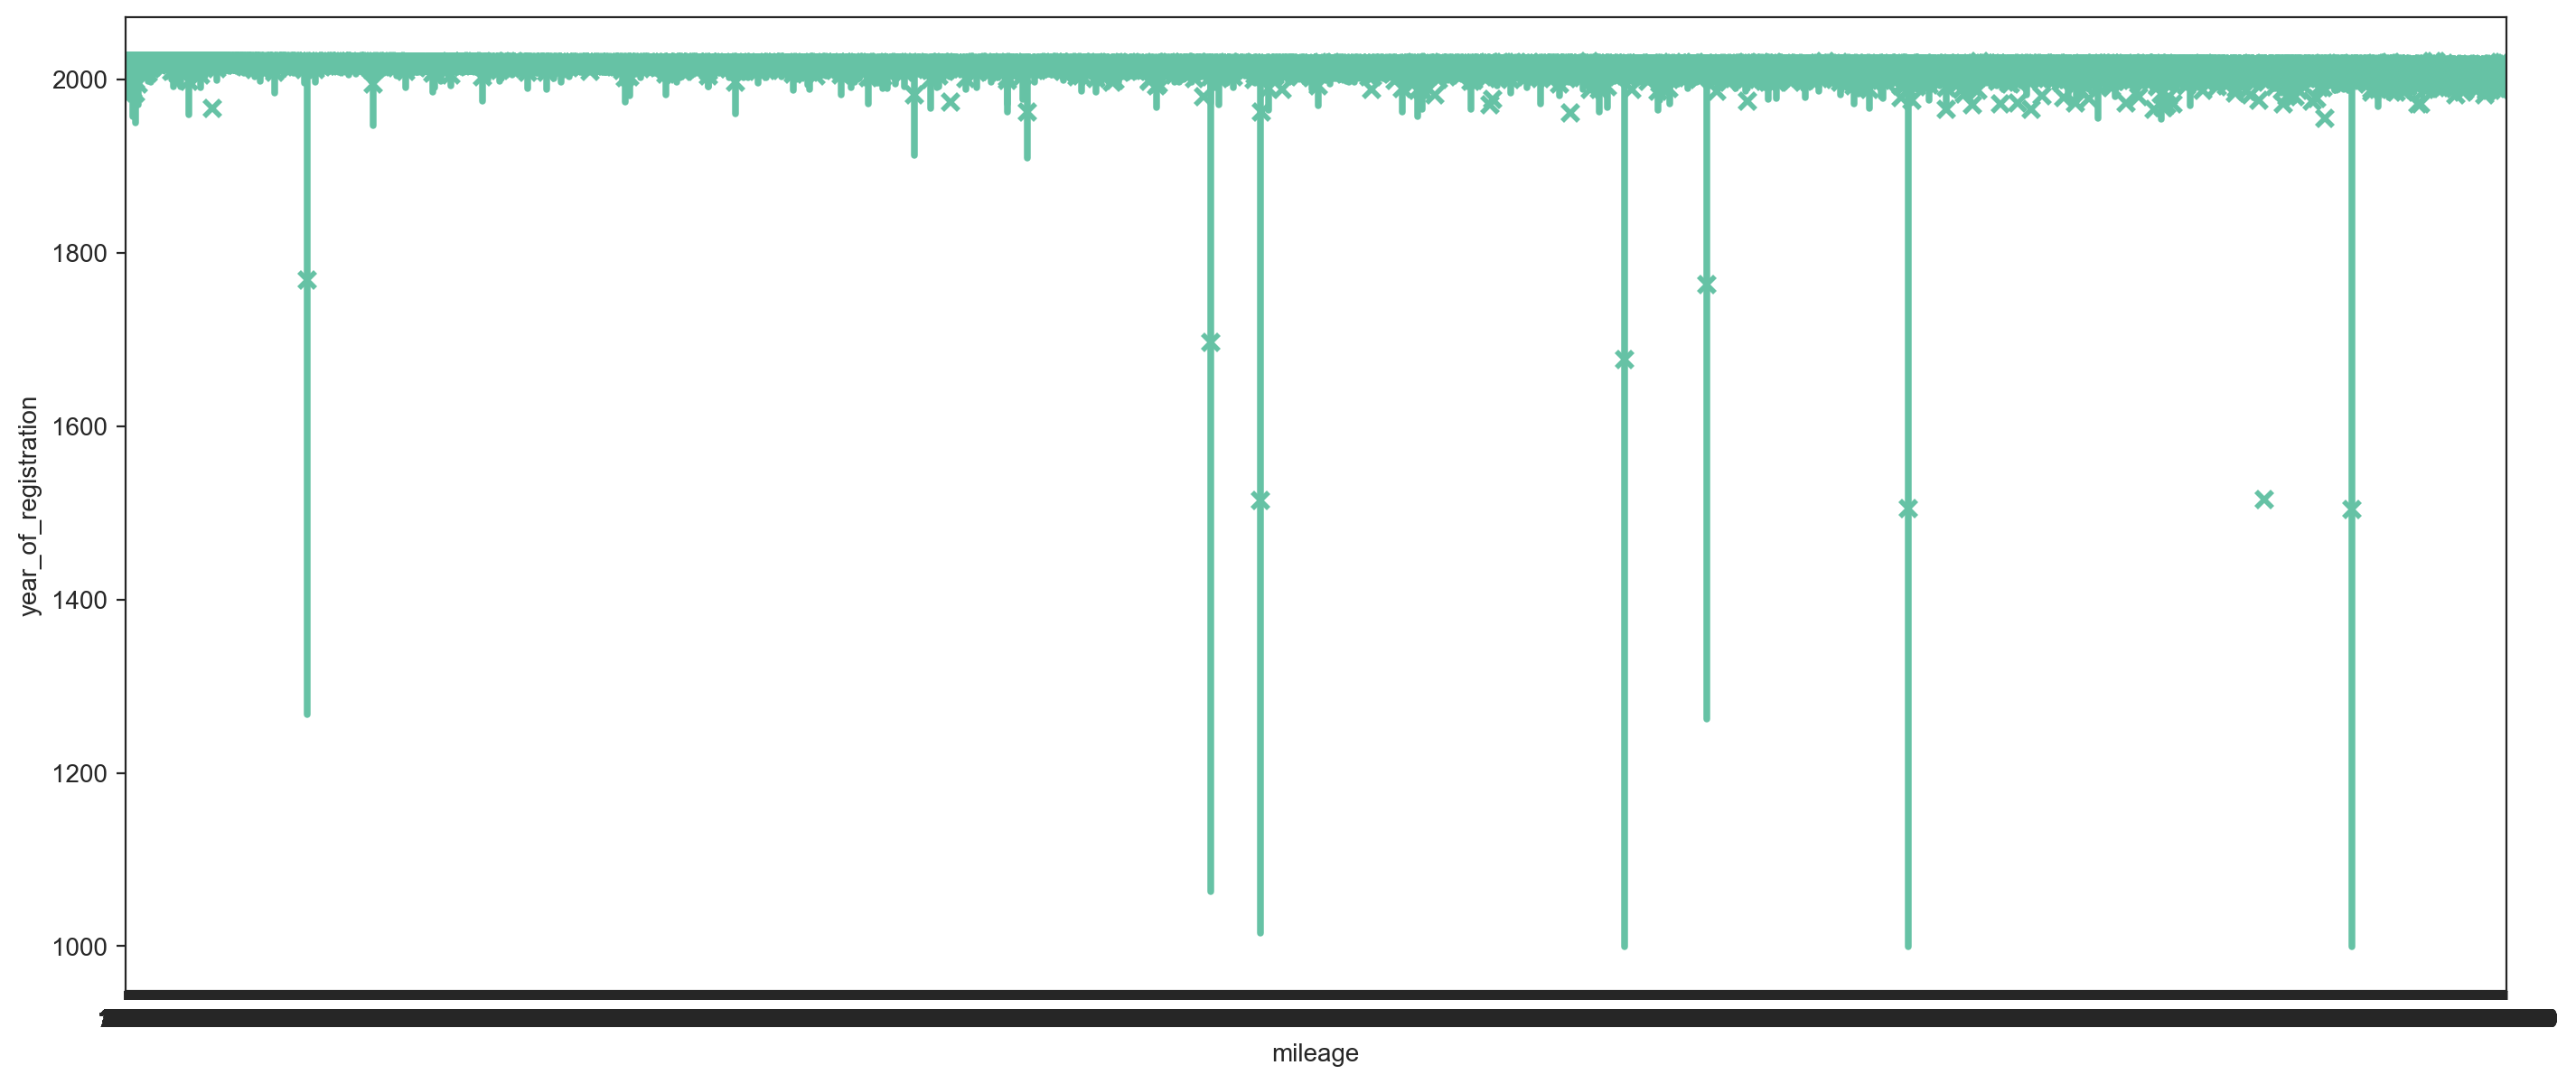

In [8]:
sns.pointplot(auto, x="mileage", y="year_of_registration", join=False, markers="x")

Outliers for 2013.0:
         mileage  outlier
43974  999999.0     True


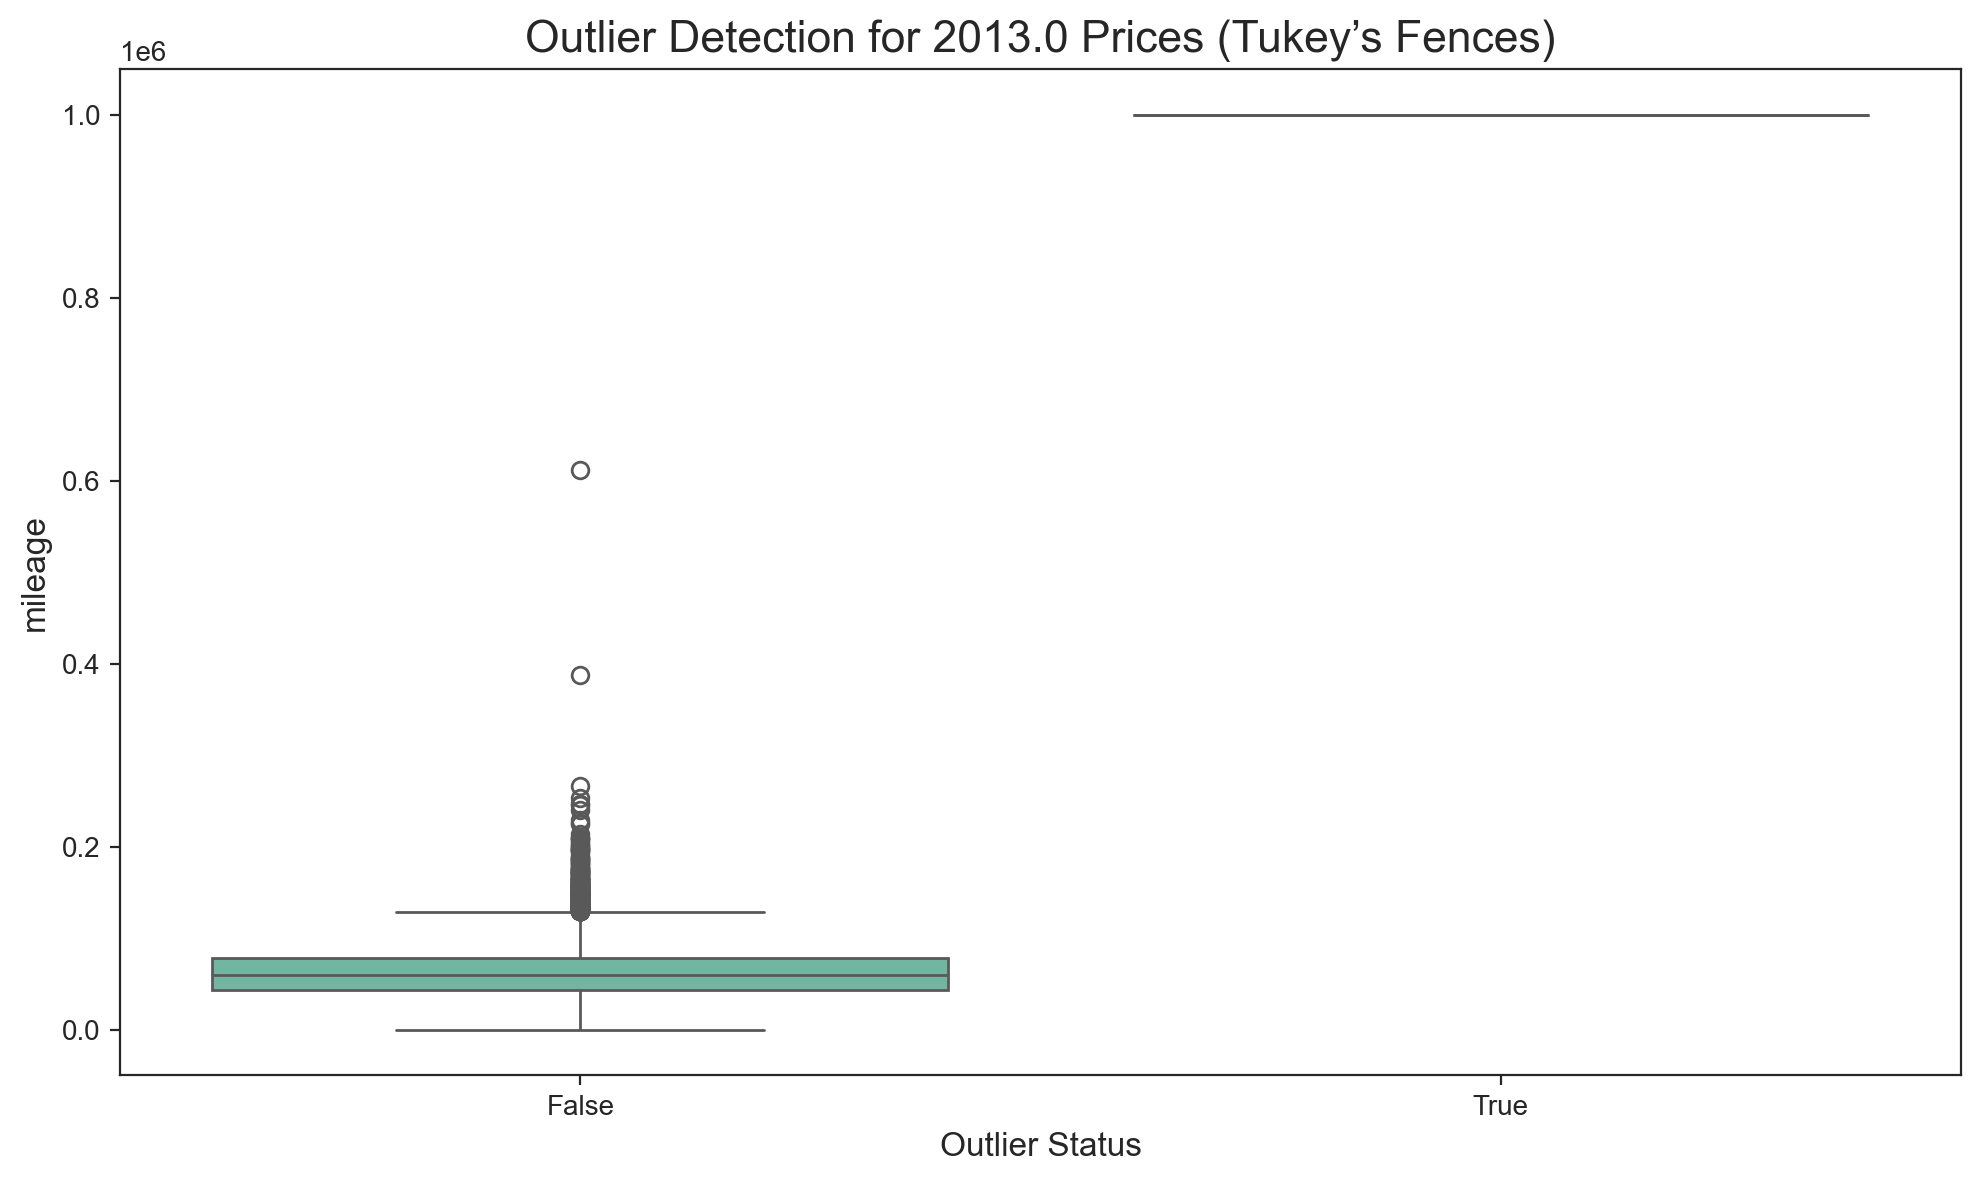

Outliers for 2019.0:
          mileage  outlier
117319  242000.0     True


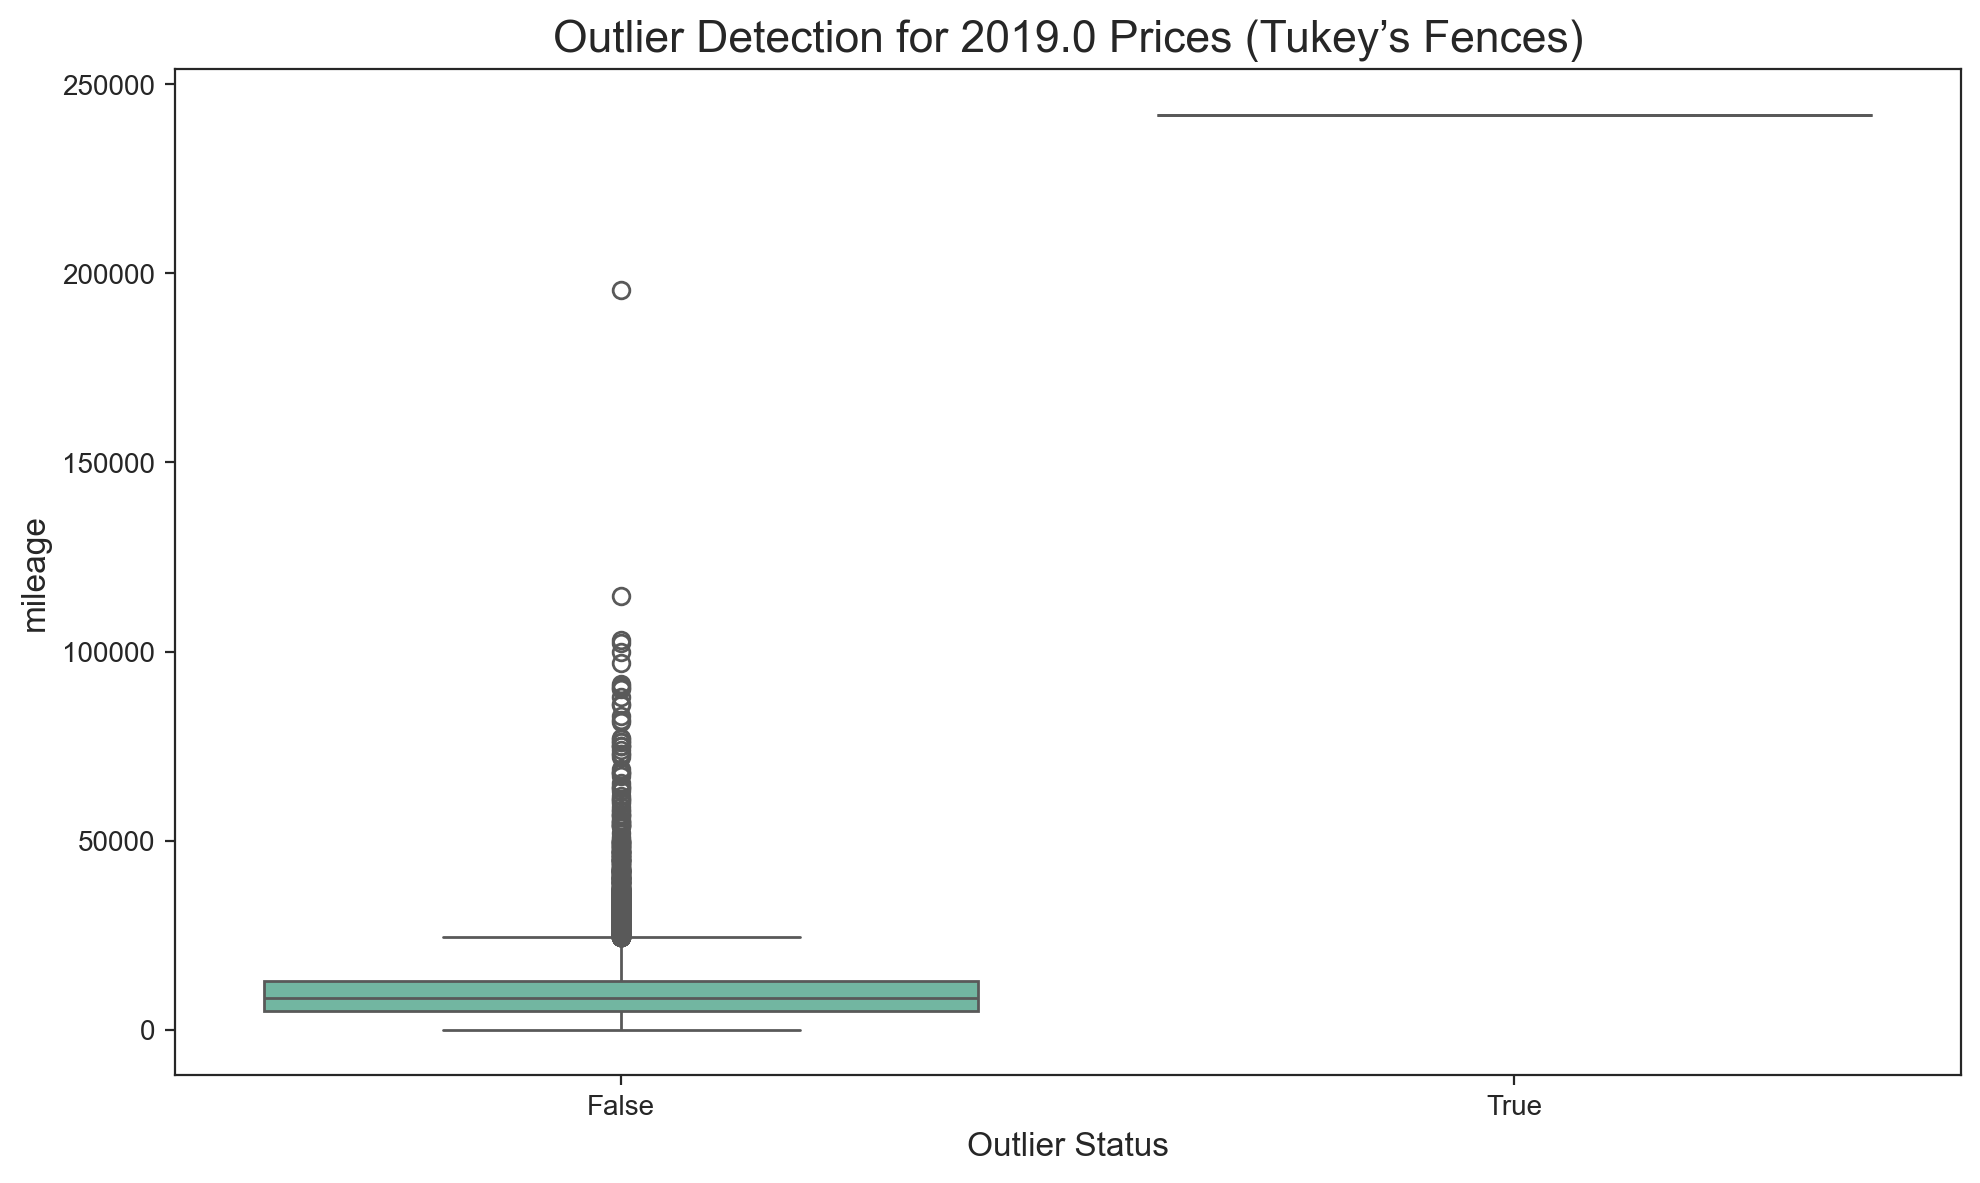

Outliers for 2018.0:
          mileage  outlier
131508  788072.0     True


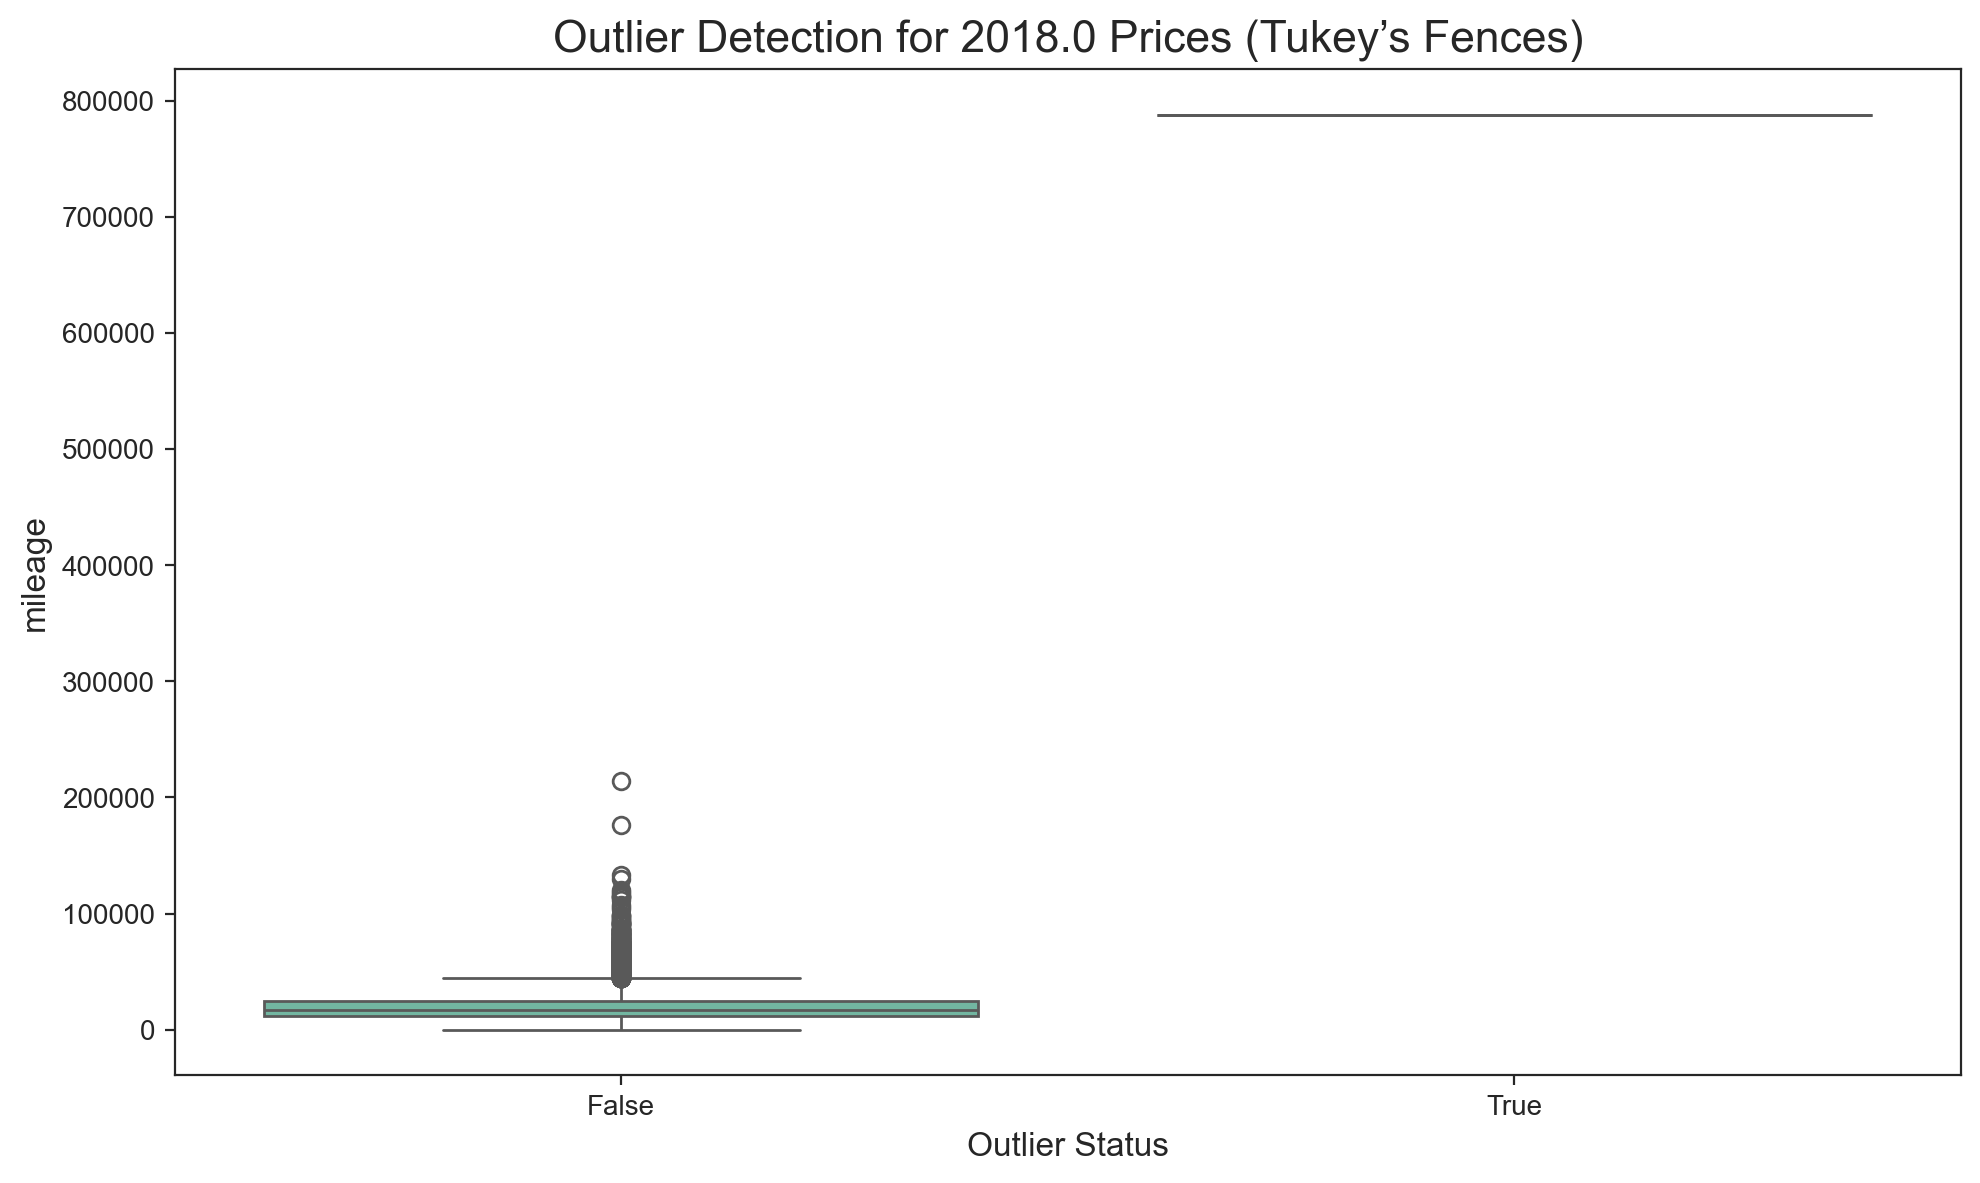

Outliers for 2020.0:
          mileage  outlier
85334   152000.0     True
104829  126602.0     True
148395  149000.0     True
157710  250000.0     True
164023  150000.0     True
173867  145000.0     True
254446  114000.0     True
285648  125250.0     True
346927  140000.0     True


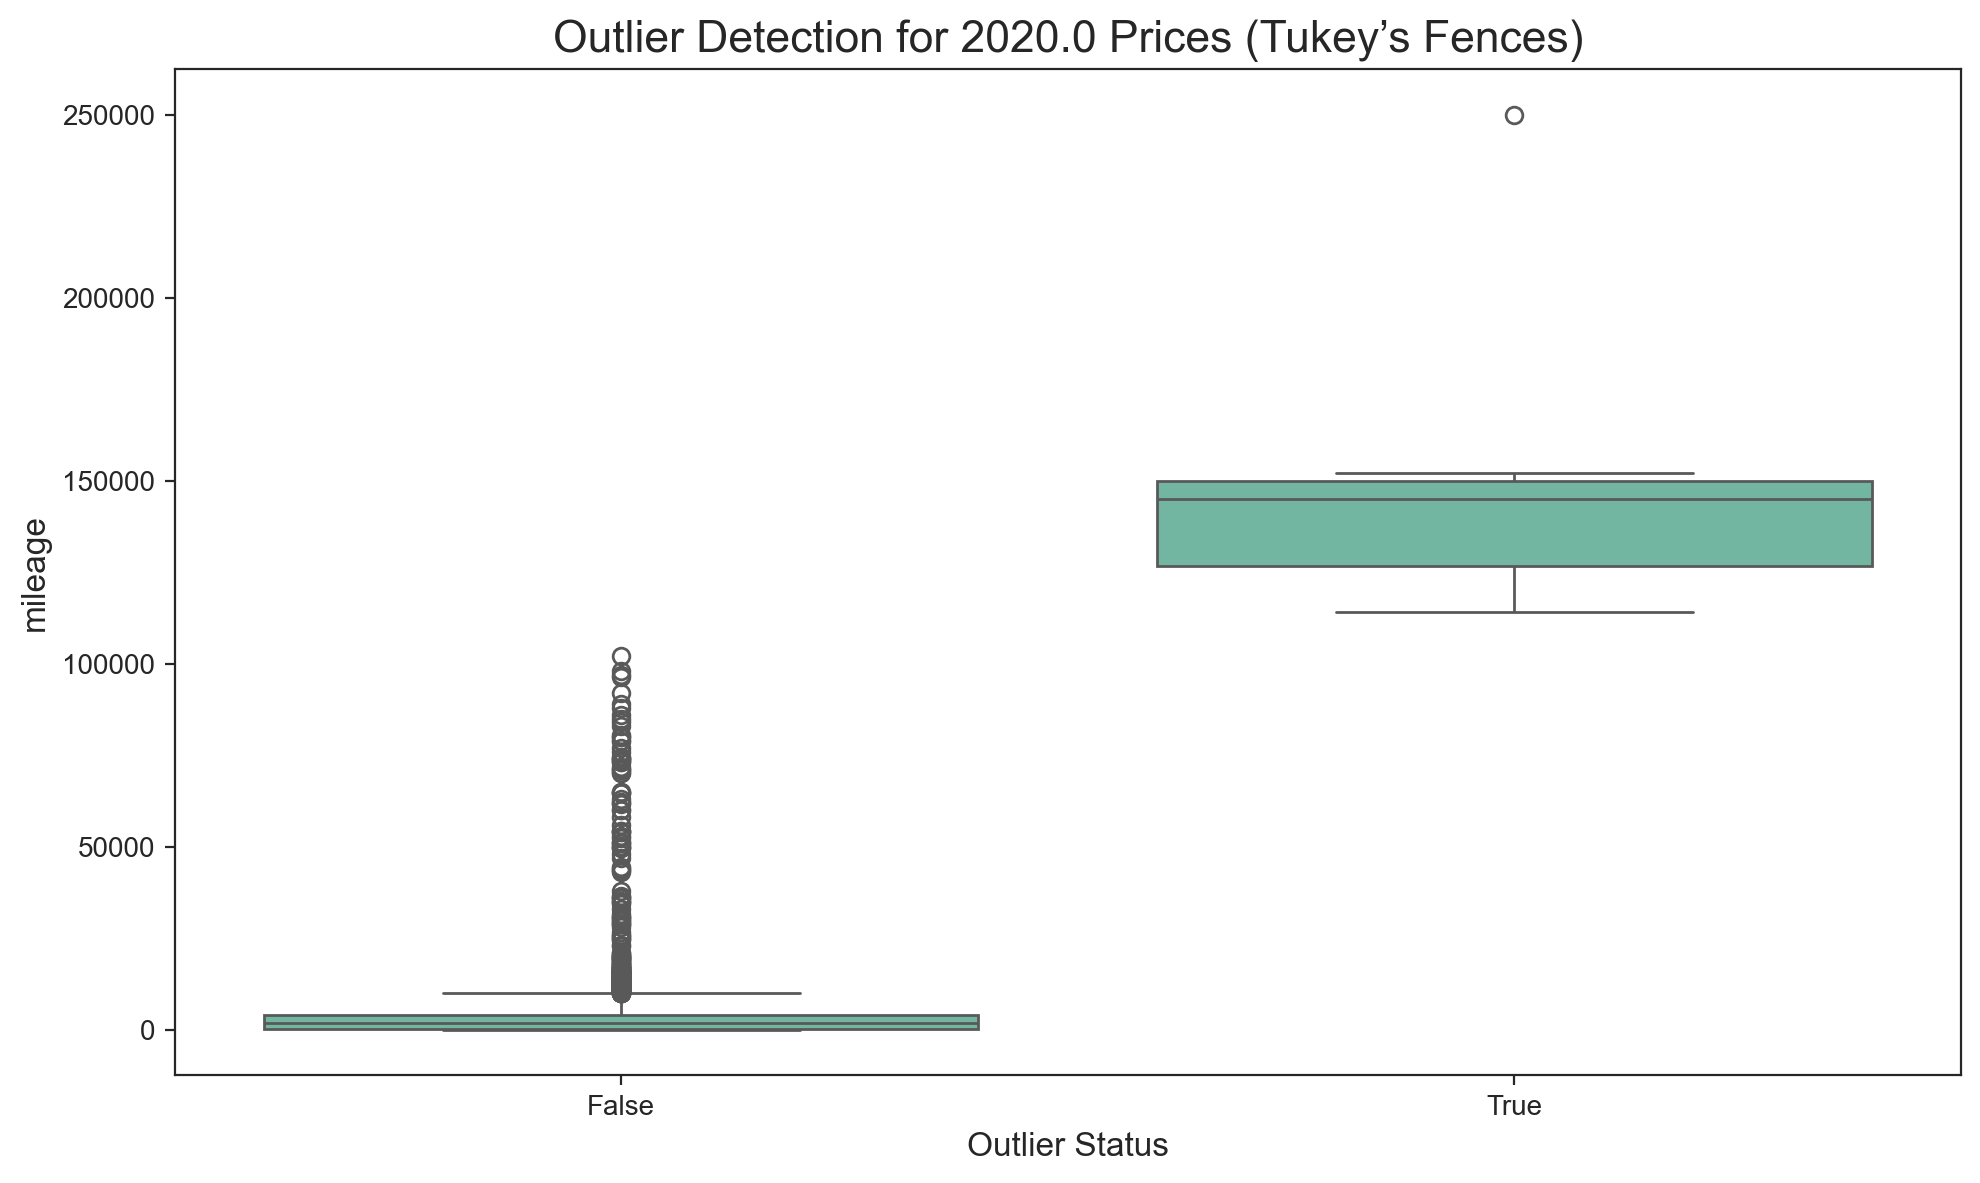

Replaced 12 outliers.


In [9]:
# Very large mileage entries
auto.loc[(auto["mileage"] > 0.3e6)].sort_values(by="mileage", ascending=False)

# Find extreme outliers that are likely erroneous

count = 0
for year in auto["year_of_registration"].unique():
    model_data = auto.loc[auto["year_of_registration"] == year, ["mileage"]]

    data_cropped = model_data.dropna(subset=["mileage"])

    fence_dist = 25
    # Step 2: Calculate IQR and Tukey’s Fences
    Q1 = data_cropped["mileage"].quantile(0.25)
    Q3 = data_cropped["mileage"].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - fence_dist * IQR
    upper_fence = Q3 + fence_dist * IQR
    data_cropped["outlier"] = (data_cropped["mileage"] < lower_fence) | (data_cropped["mileage"] > upper_fence)


    # Print outliers
    outliers = data_cropped.loc[data_cropped["outlier"]]
    

    if len(outliers) > 0:
        count += len(auto.loc[outliers.index, "mileage"])
        # # Replace outlier values
        # auto.loc[outliers.index, "mileage"] = np.nan

        print(f"Outliers for {year}:\n", outliers)

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data_cropped, x="outlier", y="mileage")
        plt.title(f"Outlier Detection for {year} Prices (Tukey’s Fences)", fontsize=16)
        plt.xlabel("Outlier Status", fontsize=12)
        plt.ylabel("mileage", fontsize=12)
        plt.tight_layout()
        plt.show()
print(f"Replaced {count} outliers.")

In [10]:
# Mileage of 0 is likely erroneous for older used cars
mask = (auto["mileage"] < 10) & (auto["vehicle_condition"] == "USED") & (auto["year_of_registration"] < 2018)
auto.loc[mask, "mileage"] = auto.loc[mask, "mileage"].replace(0, np.nan)

# Year of Registration

In [11]:
# Remove very old years for non-old makes
auto.loc[(auto["year_of_registration"] < 1950) & (~auto["standard_make"].isin(["Austin", "Morris"])), "year_of_registration"] = np.nan

In [12]:
# Set year of reg to 2020 for all new cars
auto.loc[(auto["vehicle_condition"] == "NEW"), "year_of_registration"] = 2020

# Registration Code

In [13]:
# Update missing years of reg based on the reg code
def reg_to_year(reg_code):
    try:
        reg_code = int(reg_code)
        if reg_code > 71 or (50 > reg_code > 20): return np.nan
        return 2000 + reg_code%50
    
    except ValueError:
        if not isinstance(reg_code, str): return np.nan
        
        letters = "ABCDEFGHJKLMNPRSTXY"
        if reg_code == "V": return (1979, 1999)
        if reg_code == "W": return (1980, 2000)
        if reg_code not in letters: return np.nan
        return (1983 + letters.find(reg_code), 1963 + letters.find(reg_code))
       

auto["reg_code_year"] = auto["reg_code"].map(reg_to_year)
# auto.loc[auto["year_of_registration"].isna(), "year_of_registration"] = auto.loc[auto["year_of_registration"].isna(), "reg_code"].map("reg_to_year")

In [14]:
def is_alpha(val):
    try: return not val.isnumeric()
    except: return False
    
missing = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())]

# For each ambiguous year select the year closest to the mean for that make.
missing = missing.loc[missing["reg_code_year"].notna()]
full_missing = auto.loc[missing.index]

for i in range(len(full_missing)):
    missing_model = full_missing.iloc[i]["standard_model"]
    missing_make = full_missing.iloc[i]["standard_make"]
    years = full_missing.iloc[i]["reg_code_year"]
    used = auto.loc[(auto["standard_model"] == missing_model) & (auto["year_of_registration"].notna())]

    mean_year = np.array(used["year_of_registration"]).mean()
    closest_year = years[0] if abs(mean_year - years[0]) < abs(mean_year - years[1]) else years[1]

    auto.at[missing.index[i], "reg_code_year"] = closest_year

In [15]:
# Copy the year from the reg code for missing years then drop reg code and reg code year
auto.loc[auto["year_of_registration"].isna(), "year_of_registration"] = auto["reg_code_year"]

auto.drop(columns=["reg_code", "reg_code_year"], inplace=True)

In [18]:
# Check for null values

null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

,column,null_count
1,standard_colour,5369
7,body_type,832
9,fuel_type,597
5,year_of_registration,323
0,mileage,159
2,standard_make,0
3,standard_model,0
4,vehicle_condition,0
6,price,0
8,crossover_car_and_van,0


In [16]:
auto.to_csv("ready_to_impute.csv", index=False)

# fuel_type

In [17]:
imputer = ImportanceImputer()

result = imputer.fit_transform(auto, "fuel_type")

NameError: name 'ImportanceImputer' is not defined

In [560]:
auto.loc[result.index, "fuel_type"] = result["fuel_type"]

In [561]:
null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

,column,null_count
1,standard_colour,5377
7,body_type,836
5,year_of_registration,324
0,mileage,159
2,standard_make,0
3,standard_model,0
4,vehicle_condition,0
6,price,0
8,crossover_car_and_van,0
9,fuel_type,0


# Body Type

In [562]:
imputer = ImportanceImputer()

result = imputer.fit_transform(auto, "body_type")

Imputing 836 entries.


In [563]:
auto.loc[result.index, "body_type"] = result["body_type"]

In [564]:
null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

,column,null_count
1,standard_colour,5377
5,year_of_registration,324
0,mileage,159
2,standard_make,0
3,standard_model,0
4,vehicle_condition,0
6,price,0
7,body_type,0
8,crossover_car_and_van,0
9,fuel_type,0


# Standard Colour

In [565]:
# Combine rare colours into larger groups

auto["standard_colour"].replace({
    "Navy": "Blue", 
    "Magenta": "Purple",
    "Burgundy": "Maroon",
    "Indigo": "Purple"
    }, inplace=True)

In [566]:
imputer = ImportanceImputer()

result = imputer.fit_transform(auto, "standard_colour")

Imputing 5377 entries.


In [567]:
auto.loc[result.index, "standard_colour"] = result["standard_colour"]

In [568]:
auto

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,year_listed,month_listed,day_listed
0,0.0,Grey,Volvo,XC90,NEW,2020.0,73970.0,SUV,False,Petrol Plug-in Hybrid,2020,06,03
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000.0,Saloon,False,Diesel,2020,07,02
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000.0,SUV,False,Petrol,2020,07,02
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995.0,Hatchback,False,Diesel,2020,07,08
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995.0,SUV,False,Diesel,2020,07,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,Grey,Peugeot,208,USED,2019.0,10595.0,Hatchback,False,Petrol,2020,10,31
402001,110000.0,Red,Peugeot,107,USED,2009.0,2000.0,Hatchback,False,Petrol,2020,10,31
402002,52760.0,White,Nissan,Qashqai,USED,2012.0,7250.0,SUV,False,Petrol,2020,10,31
402003,10250.0,Red,Abarth,595,USED,2015.0,11490.0,Hatchback,False,Petrol,2020,11,01


In [569]:
null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

,column,null_count
5,year_of_registration,324
0,mileage,159
1,standard_colour,0
2,standard_make,0
3,standard_model,0
4,vehicle_condition,0
6,price,0
7,body_type,0
8,crossover_car_and_van,0
9,fuel_type,0


# Make and Model

In [570]:
# Combine make and model into one column
auto['make_model'] = auto['standard_make'] + ' ' + auto['standard_model']
auto.drop(columns=["standard_make", "standard_model"], inplace=True)

In [ ]:
# Export the transformed data
auto.to_csv('auto_imputed.csv', index=False)

In [67]:
# Load the dataset
auto = pd.read_csv('auto_imputed.csv')

# Encoding

In [68]:
auto["vehicle_condition"] = auto["vehicle_condition"].map({"NEW": 1, "USED": 0})
auto["crossover_car_and_van"] = auto["crossover_car_and_van"].map({True: 1, False: 0})

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ["make_model"]:
    auto[column] = label_encoder.fit_transform(auto[column])

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [70]:
print("There are", len(auto["body_type"].unique()), "unique body types.")
print("There are", len(auto["standard_colour"].unique()), "unique colours.")
print("There are", len(auto["fuel_type"].unique()), "unique fuel types.")
print("There are", len(auto["make_model"].unique()), "unique make models.")

There are 16 unique body types.
There are 18 unique colours.
There are 9 unique fuel types.
There are 1212 unique make models.


In [71]:
# importing sklearn one hot encoding
from sklearn.preprocessing import OneHotEncoder

# initializing one hot encoding
encoding = OneHotEncoder(handle_unknown="error")

categories_map = {}

one_hot_cols = ["standard_colour", "body_type", "fuel_type"]
for col in one_hot_cols:
    transformed_data = encoding.fit_transform(auto[[col]])
    auto[encoding.categories_[0]] = transformed_data.toarray()
    categories_map[col] = encoding.categories_[0]
    auto.drop(col, axis=1, inplace=True)

# Save the categories_map to a file for reversing later
with open('categories_map.pkl', 'wb') as f:
    pickle.dump(categories_map, f)

# Scaling

<Axes: xlabel='mileage', ylabel='Count'>

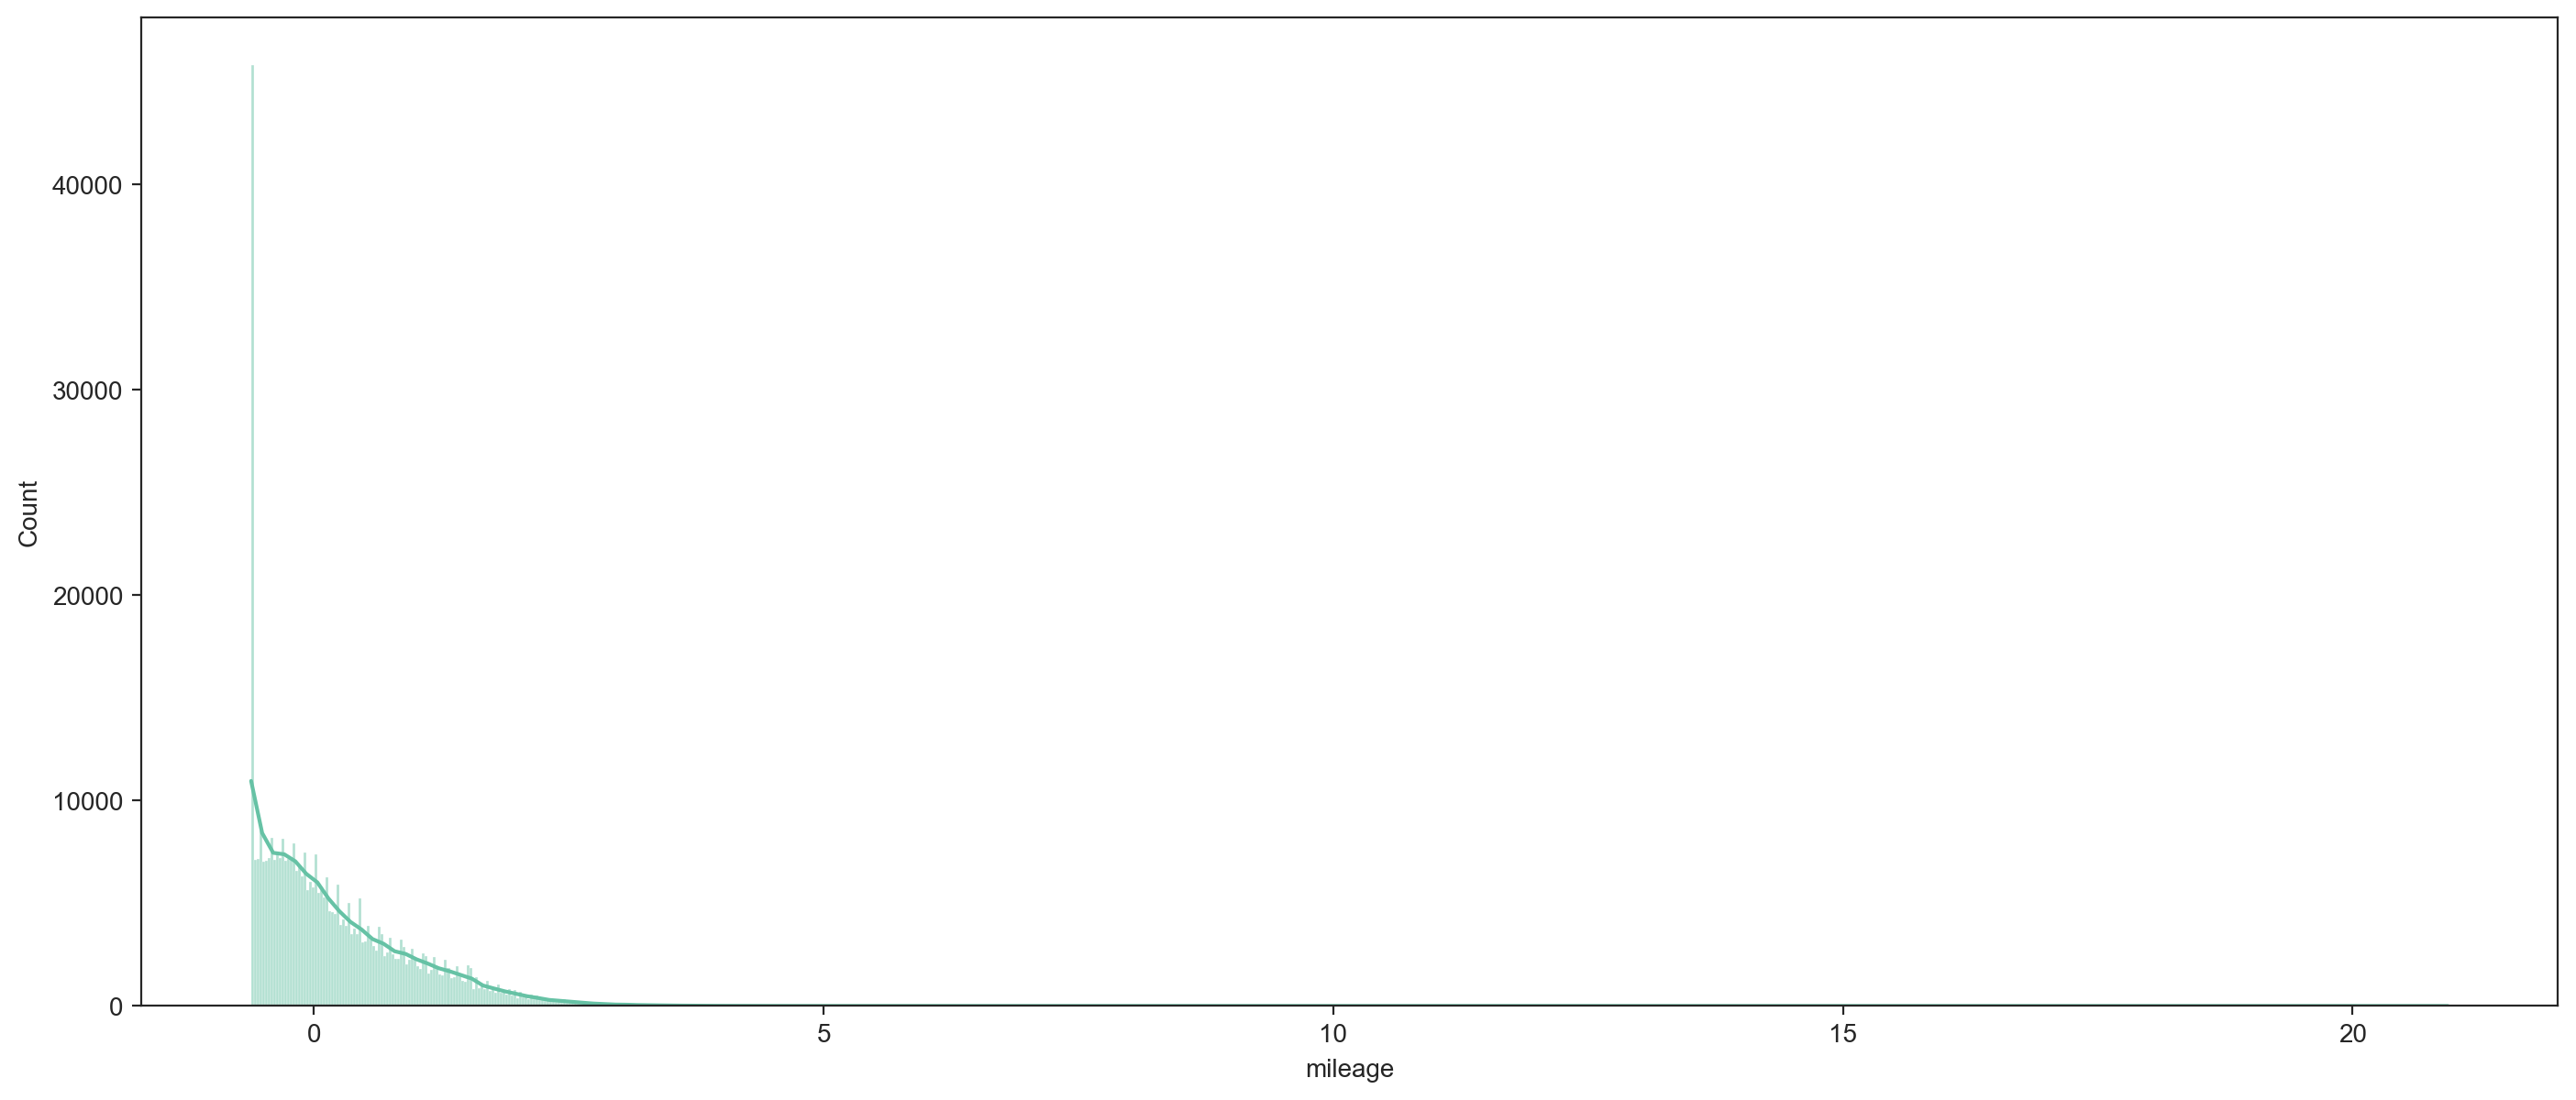

In [19]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

cols_to_scale = ["mileage", "year_of_registration", "price", "year_listed", "month_listed", "day_listed"]

# Scale data for KNN imputing
scaler = RobustScaler()
scaled_data = scaler.fit_transform(auto[cols_to_scale])
auto[cols_to_scale] = pd.DataFrame(scaled_data, columns=cols_to_scale)
sns.histplot(auto["mileage"], kde=True)

<Axes: xlabel='mileage', ylabel='Count'>

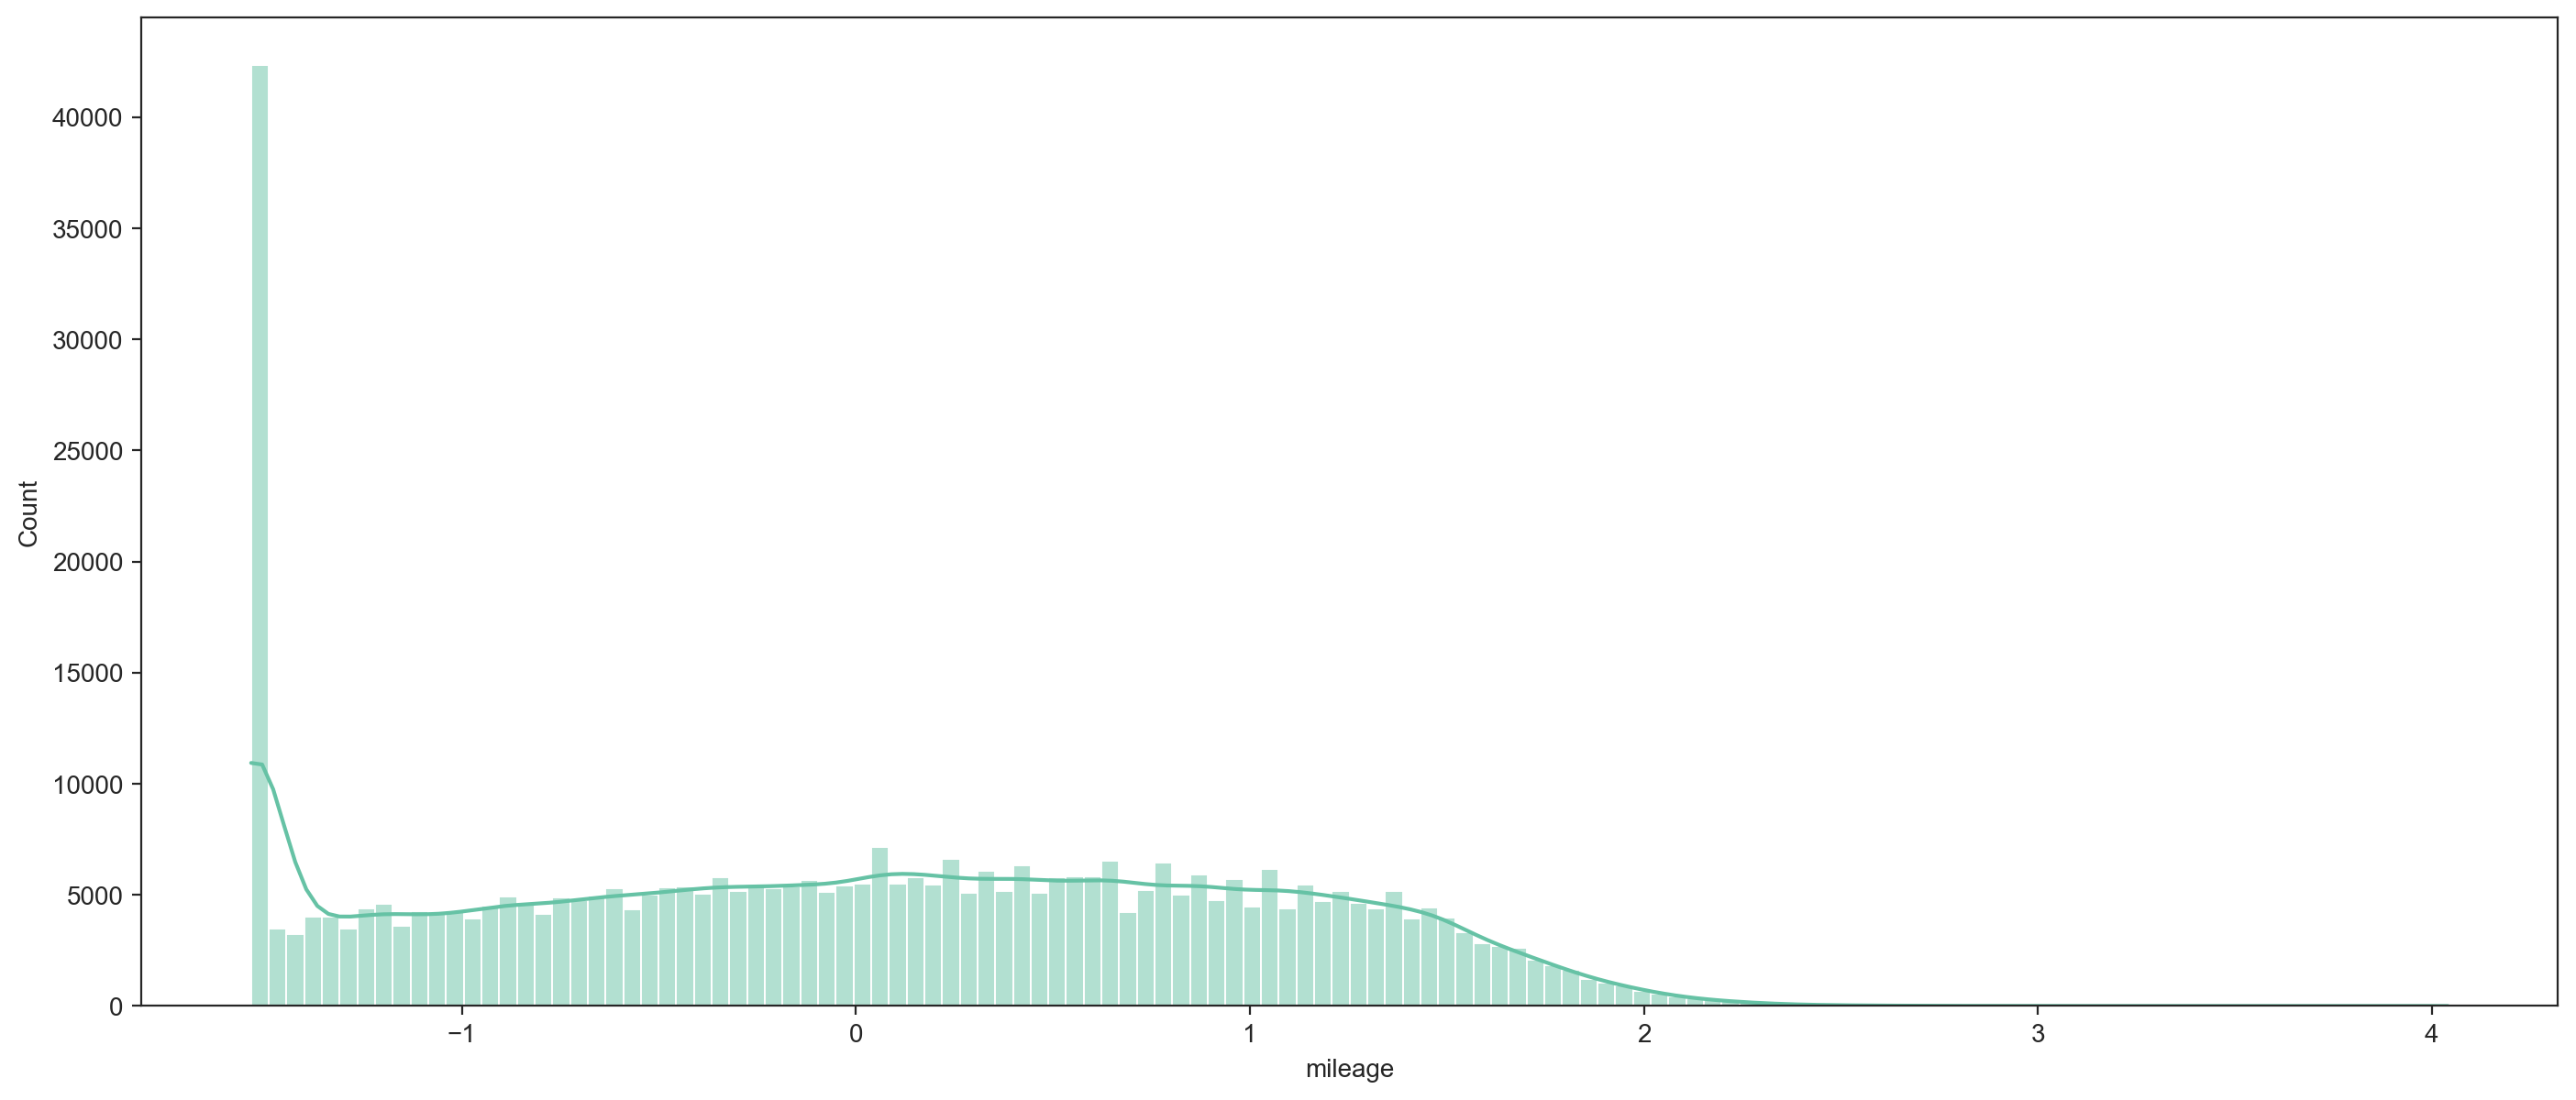

In [21]:
# PowerTransformer for price and mileage
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Step 1: Apply PowerTransformer
auto[['price', 'mileage', "year_of_registration"]] = pt.fit_transform(auto[['price', 'mileage', "year_of_registration"]])

sns.histplot(auto["mileage"], kde=True)

# Imputing

In [ ]:
from sklearn.impute import KNNImputer

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=3)
knn_imputer.fit(auto[train_data])
knn_imputed_data = knn_imputer.transform(auto)
auto = pd.DataFrame(knn_imputed_data, columns=auto.columns)

In [75]:
auto.to_csv("scaled_not_transformed")

# Transform Values

In [76]:
# PowerTransformer for price and mileage
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Step 1: Apply PowerTransformer
auto[['price', 'mileage', "year_of_registration"]] = pt.fit_transform(auto[['price', 'mileage', "year_of_registration"]])

# Export Clean Data

In [77]:
# Save the PowerTransformer and RobustScaler
with open('power_transformer.pkl', 'wb') as f:
    pickle.dump(pt, f)

with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Export the transformed data
auto.to_csv('transformed_auto2.csv', index=False)